# Import libraries

In [411]:
import numpy as np
import pandas as pd
import statistics
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, StratifiedKFold, GroupKFold
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb
import gc
import optuna
pd.set_option('display.max_columns', 1000)

# Read datasets

In [663]:
f = pd.read_table('features.txt', header=None)
subject = pd.read_csv('subject_train.csv', names=['subject'], header=None)
X = pd.read_csv("X_train.csv", names=list(f[0]), header=None)
y_pd = pd.read_csv("y_train.csv", header=None).iloc[:,0]
X_test = pd.read_csv("X_test.csv", names=list(f[0]), header=None)

In [3]:
print(f'X shape: {X.shape}')
print(f'y shape: {y_pd.shape}')
print(f'X_test shape: {X_test.shape}')

X shape: (5080, 561)
y shape: (5080,)
X_test shape: (5219, 561)


In [4]:
X.head()

,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,11 tBodyAcc-max()-Y,12 tBodyAcc-max()-Z,13 tBodyAcc-min()-X,14 tBodyAcc-min()-Y,15 tBodyAcc-min()-Z,16 tBodyAcc-sma(),17 tBodyAcc-energy()-X,18 tBodyAcc-energy()-Y,19 tBodyAcc-energy()-Z,20 tBodyAcc-iqr()-X,21 tBodyAcc-iqr()-Y,22 tBodyAcc-iqr()-Z,23 tBodyAcc-entropy()-X,24 tBodyAcc-entropy()-Y,25 tBodyAcc-entropy()-Z,"26 tBodyAcc-arCoeff()-X,1","27 tBodyAcc-arCoeff()-X,2","28 tBodyAcc-arCoeff()-X,3","29 tBodyAcc-arCoeff()-X,4","30 tBodyAcc-arCoeff()-Y,1","31 tBodyAcc-arCoeff()-Y,2","32 tBodyAcc-arCoeff()-Y,3","33 tBodyAcc-arCoeff()-Y,4","34 tBodyAcc-arCoeff()-Z,1","35 tBodyAcc-arCoeff()-Z,2","36 tBodyAcc-arCoeff()-Z,3","37 tBodyAcc-arCoeff()-Z,4","38 tBodyAcc-correlation()-X,Y","39 tBodyAcc-correlation()-X,Z","40 tBodyAcc-correlation()-Y,Z",41 tGravityAcc-mean()-X,42 tGravityAcc-mean()-Y,43 tGravityAcc-mean()-Z,44 tGravityAcc-std()-X,45 tGravityAcc-std()-Y,46 tGravityAcc-std()-Z,47 tGravityAcc-mad()-X,48 tGravityAcc-mad()-Y,49 tGravityAcc-mad()-Z,50 tGravityAcc-max()-X,51 tGravityAcc-max()-Y,52 tGravityAcc-max()-Z,53 tGravityAcc-min()-X,54 tGravityAcc-min()-Y,55 tGravityAcc-min()-Z,56 tGravityAcc-sma(),57 tGravityAcc-energy()-X,58 tGravityAcc-energy()-Y,59 tGravityAcc-energy()-Z,60 tGravityAcc-iqr()-X,61 tGravityAcc-iqr()-Y,62 tGravityAcc-iqr()-Z,63 tGravityAcc-entropy()-X,64 tGravityAcc-entropy()-Y,65 tGravityAcc-entropy()-Z,"66 tGravityAcc-arCoeff()-X,1","67 tGravityAcc-arCoeff()-X,2","68 tGravityAcc-arCoeff()-X,3","69 tGravityAcc-arCoeff()-X,4","70 tGravityAcc-arCoeff()-Y,1","71 tGravityAcc-arCoeff()-Y,2","72 tGravityAcc-arCoeff()-Y,3","73 tGravityAcc-arCoeff()-Y,4","74 tGravityAcc-arCoeff()-Z,1","75 tGravityAcc-arCoeff()-Z,2","76 tGravityAcc-arCoeff()-Z,3","77 tGravityAcc-arCoeff()-Z,4","78 tGravityAcc-correlation()-X,Y","79 tGravityAcc-correlation()-X,Z","80 tGravityAcc-correlation()-Y,Z",81 tBodyAccJerk-mean()-X,82 tBodyAccJerk-mean()-Y,83 tBodyAccJerk-mean()-Z,84 tBodyAccJerk-std()-X,85 tBodyAccJerk-std()-Y,86 tBodyAccJerk-std()-Z,87 tBodyAccJerk-mad()-X,88 tBodyAccJerk-mad()-Y,89 tBodyAccJerk-mad()-Z,90 tBodyAccJerk-max()-X,91 tBodyAccJerk-max()-Y,92 tBodyAccJerk-max()-Z,93 tBodyAccJerk-min()-X,94 tBodyAccJerk-min()-Y,95 tBodyAccJerk-min()-Z,96 tBodyAccJerk-sma(),97 tBodyAccJerk-energy()-X,98 tBodyAccJerk-energy()-Y,99 tBodyAccJerk-energy()-Z,100 tBodyAccJerk-iqr()-X,101 tBodyAccJerk-iqr()-Y,102 tBodyAccJerk-iqr()-Z,103 tBodyAccJerk-entropy()-X,104 tBodyAccJerk-entropy()-Y,105 tBodyAccJerk-entropy()-Z,"106 tBodyAccJerk-arCoeff()-X,1","107 tBodyAccJerk-arCoeff()-X,2","108 tBodyAccJerk-arCoeff()-X,3","109 tBodyAccJerk-arCoeff()-X,4","110 tBodyAccJerk-arCoeff()-Y,1","111 tBodyAccJerk-arCoeff()-Y,2","112 tBodyAccJerk-arCoeff()-Y,3","113 tBodyAccJerk-arCoeff()-Y,4","114 tBodyAccJerk-arCoeff()-Z,1","115 tBodyAccJerk-arCoeff()-Z,2","116 tBodyAccJerk-arCoeff()-Z,3","117 tBodyAccJerk-arCoeff()-Z,4","118 tBodyAccJerk-correlation()-X,Y","119 tBodyAccJerk-correlation()-X,Z","120 tBodyAccJerk-correlation()-Y,Z",121 tBodyGyro-mean()-X,122 tBodyGyro-mean()-Y,123 tBodyGyro-mean()-Z,124 tBodyGyro-std()-X,125 tBodyGyro-std()-Y,126 tBodyGyro-std()-Z,127 tBodyGyro-mad()-X,128 tBodyGyro-mad()-Y,129 tBodyGyro-mad()-Z,130 tBodyGyro-max()-X,131 tBodyGyro-max()-Y,132 tBodyGyro-max()-Z,133 tBodyGyro-min()-X,134 tBodyGyro-min()-Y,135 tBodyGyro-min()-Z,136 tBodyGyro-sma(),137 tBodyGyro-energy()-X,138 tBodyGyro-energy()-Y,139 tBodyGyro-energy()-Z,140 tBodyGyro-iqr()-X,141 tBodyGyro-iqr()-Y,142 tBodyGyro-iqr()-Z,143 tBodyGyro-entropy()-X,144 tBodyGyro-entropy()-Y,145 tBodyGyro-entropy()-Z,"146 tBodyGyro-arCoeff()-X,1","147 tBodyGyro-arCoeff()-X,2","148 tBodyGyro-arCoeff()-X,3","149 tBodyGyro-arCoeff()-X,4","150 tBodyGyro-arCoeff()-Y,1","151 tBodyGyro-arCoeff()-Y,2","152 tBodyGyro-arCoeff()-Y,3","153 tBodyGyro-arCoeff()-Y,4","154 tBodyGyro-arCoeff()-Z,1","15

In [5]:
X_test.head()

,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,11 tBodyAcc-max()-Y,12 tBodyAcc-max()-Z,13 tBodyAcc-min()-X,14 tBodyAcc-min()-Y,15 tBodyAcc-min()-Z,16 tBodyAcc-sma(),17 tBodyAcc-energy()-X,18 tBodyAcc-energy()-Y,19 tBodyAcc-energy()-Z,20 tBodyAcc-iqr()-X,21 tBodyAcc-iqr()-Y,22 tBodyAcc-iqr()-Z,23 tBodyAcc-entropy()-X,24 tBodyAcc-entropy()-Y,25 tBodyAcc-entropy()-Z,"26 tBodyAcc-arCoeff()-X,1","27 tBodyAcc-arCoeff()-X,2","28 tBodyAcc-arCoeff()-X,3","29 tBodyAcc-arCoeff()-X,4","30 tBodyAcc-arCoeff()-Y,1","31 tBodyAcc-arCoeff()-Y,2","32 tBodyAcc-arCoeff()-Y,3","33 tBodyAcc-arCoeff()-Y,4","34 tBodyAcc-arCoeff()-Z,1","35 tBodyAcc-arCoeff()-Z,2","36 tBodyAcc-arCoeff()-Z,3","37 tBodyAcc-arCoeff()-Z,4","38 tBodyAcc-correlation()-X,Y","39 tBodyAcc-correlation()-X,Z","40 tBodyAcc-correlation()-Y,Z",41 tGravityAcc-mean()-X,42 tGravityAcc-mean()-Y,43 tGravityAcc-mean()-Z,44 tGravityAcc-std()-X,45 tGravityAcc-std()-Y,46 tGravityAcc-std()-Z,47 tGravityAcc-mad()-X,48 tGravityAcc-mad()-Y,49 tGravityAcc-mad()-Z,50 tGravityAcc-max()-X,51 tGravityAcc-max()-Y,52 tGravityAcc-max()-Z,53 tGravityAcc-min()-X,54 tGravityAcc-min()-Y,55 tGravityAcc-min()-Z,56 tGravityAcc-sma(),57 tGravityAcc-energy()-X,58 tGravityAcc-energy()-Y,59 tGravityAcc-energy()-Z,60 tGravityAcc-iqr()-X,61 tGravityAcc-iqr()-Y,62 tGravityAcc-iqr()-Z,63 tGravityAcc-entropy()-X,64 tGravityAcc-entropy()-Y,65 tGravityAcc-entropy()-Z,"66 tGravityAcc-arCoeff()-X,1","67 tGravityAcc-arCoeff()-X,2","68 tGravityAcc-arCoeff()-X,3","69 tGravityAcc-arCoeff()-X,4","70 tGravityAcc-arCoeff()-Y,1","71 tGravityAcc-arCoeff()-Y,2","72 tGravityAcc-arCoeff()-Y,3","73 tGravityAcc-arCoeff()-Y,4","74 tGravityAcc-arCoeff()-Z,1","75 tGravityAcc-arCoeff()-Z,2","76 tGravityAcc-arCoeff()-Z,3","77 tGravityAcc-arCoeff()-Z,4","78 tGravityAcc-correlation()-X,Y","79 tGravityAcc-correlation()-X,Z","80 tGravityAcc-correlation()-Y,Z",81 tBodyAccJerk-mean()-X,82 tBodyAccJerk-mean()-Y,83 tBodyAccJerk-mean()-Z,84 tBodyAccJerk-std()-X,85 tBodyAccJerk-std()-Y,86 tBodyAccJerk-std()-Z,87 tBodyAccJerk-mad()-X,88 tBodyAccJerk-mad()-Y,89 tBodyAccJerk-mad()-Z,90 tBodyAccJerk-max()-X,91 tBodyAccJerk-max()-Y,92 tBodyAccJerk-max()-Z,93 tBodyAccJerk-min()-X,94 tBodyAccJerk-min()-Y,95 tBodyAccJerk-min()-Z,96 tBodyAccJerk-sma(),97 tBodyAccJerk-energy()-X,98 tBodyAccJerk-energy()-Y,99 tBodyAccJerk-energy()-Z,100 tBodyAccJerk-iqr()-X,101 tBodyAccJerk-iqr()-Y,102 tBodyAccJerk-iqr()-Z,103 tBodyAccJerk-entropy()-X,104 tBodyAccJerk-entropy()-Y,105 tBodyAccJerk-entropy()-Z,"106 tBodyAccJerk-arCoeff()-X,1","107 tBodyAccJerk-arCoeff()-X,2","108 tBodyAccJerk-arCoeff()-X,3","109 tBodyAccJerk-arCoeff()-X,4","110 tBodyAccJerk-arCoeff()-Y,1","111 tBodyAccJerk-arCoeff()-Y,2","112 tBodyAccJerk-arCoeff()-Y,3","113 tBodyAccJerk-arCoeff()-Y,4","114 tBodyAccJerk-arCoeff()-Z,1","115 tBodyAccJerk-arCoeff()-Z,2","116 tBodyAccJerk-arCoeff()-Z,3","117 tBodyAccJerk-arCoeff()-Z,4","118 tBodyAccJerk-correlation()-X,Y","119 tBodyAccJerk-correlation()-X,Z","120 tBodyAccJerk-correlation()-Y,Z",121 tBodyGyro-mean()-X,122 tBodyGyro-mean()-Y,123 tBodyGyro-mean()-Z,124 tBodyGyro-std()-X,125 tBodyGyro-std()-Y,126 tBodyGyro-std()-Z,127 tBodyGyro-mad()-X,128 tBodyGyro-mad()-Y,129 tBodyGyro-mad()-Z,130 tBodyGyro-max()-X,131 tBodyGyro-max()-Y,132 tBodyGyro-max()-Z,133 tBodyGyro-min()-X,134 tBodyGyro-min()-Y,135 tBodyGyro-min()-Z,136 tBodyGyro-sma(),137 tBodyGyro-energy()-X,138 tBodyGyro-energy()-Y,139 tBodyGyro-energy()-Z,140 tBodyGyro-iqr()-X,141 tBodyGyro-iqr()-Y,142 tBodyGyro-iqr()-Z,143 tBodyGyro-entropy()-X,144 tBodyGyro-entropy()-Y,145 tBodyGyro-entropy()-Z,"146 tBodyGyro-arCoeff()-X,1","147 tBodyGyro-arCoeff()-X,2","148 tBodyGyro-arCoeff()-X,3","149 tBodyGyro-arCoeff()-X,4","150 tBodyGyro-arCoeff()-Y,1","151 tBodyGyro-arCoeff()-Y,2","152 tBodyGyro-arCoeff()-Y,3","153 tBodyGyro-arCoeff()-Y,4","154 tBodyGyro-arCoeff()-Z,1","15

In [6]:
y_pd.head()

0    5
1    2
2    2
3    6
4    4
Name: 0, dtype: int64

# Change label from 1 ~ 6 to 0 ~ 5
to construct a lgbm model for classification

In [478]:
y = np.array(y_pd) - 1

In [404]:
y

array([4, 1, 1, ..., 4, 5, 0])

# EDA

In [341]:
X.describe()

,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,11 tBodyAcc-max()-Y,12 tBodyAcc-max()-Z,13 tBodyAcc-min()-X,14 tBodyAcc-min()-Y,15 tBodyAcc-min()-Z,16 tBodyAcc-sma(),17 tBodyAcc-energy()-X,18 tBodyAcc-energy()-Y,19 tBodyAcc-energy()-Z,20 tBodyAcc-iqr()-X,21 tBodyAcc-iqr()-Y,22 tBodyAcc-iqr()-Z,23 tBodyAcc-entropy()-X,24 tBodyAcc-entropy()-Y,25 tBodyAcc-entropy()-Z,"26 tBodyAcc-arCoeff()-X,1","27 tBodyAcc-arCoeff()-X,2","28 tBodyAcc-arCoeff()-X,3","29 tBodyAcc-arCoeff()-X,4","30 tBodyAcc-arCoeff()-Y,1","31 tBodyAcc-arCoeff()-Y,2","32 tBodyAcc-arCoeff()-Y,3","33 tBodyAcc-arCoeff()-Y,4","34 tBodyAcc-arCoeff()-Z,1","35 tBodyAcc-arCoeff()-Z,2","36 tBodyAcc-arCoeff()-Z,3","37 tBodyAcc-arCoeff()-Z,4","38 tBodyAcc-correlation()-X,Y","39 tBodyAcc-correlation()-X,Z","40 tBodyAcc-correlation()-Y,Z",41 tGravityAcc-mean()-X,42 tGravityAcc-mean()-Y,43 tGravityAcc-mean()-Z,44 tGravityAcc-std()-X,45 tGravityAcc-std()-Y,46 tGravityAcc-std()-Z,47 tGravityAcc-mad()-X,48 tGravityAcc-mad()-Y,49 tGravityAcc-mad()-Z,50 tGravityAcc-max()-X,51 tGravityAcc-max()-Y,52 tGravityAcc-max()-Z,53 tGravityAcc-min()-X,54 tGravityAcc-min()-Y,55 tGravityAcc-min()-Z,56 tGravityAcc-sma(),57 tGravityAcc-energy()-X,58 tGravityAcc-energy()-Y,59 tGravityAcc-energy()-Z,60 tGravityAcc-iqr()-X,61 tGravityAcc-iqr()-Y,62 tGravityAcc-iqr()-Z,63 tGravityAcc-entropy()-X,64 tGravityAcc-entropy()-Y,65 tGravityAcc-entropy()-Z,"66 tGravityAcc-arCoeff()-X,1","67 tGravityAcc-arCoeff()-X,2","68 tGravityAcc-arCoeff()-X,3","69 tGravityAcc-arCoeff()-X,4","70 tGravityAcc-arCoeff()-Y,1","71 tGravityAcc-arCoeff()-Y,2","72 tGravityAcc-arCoeff()-Y,3","73 tGravityAcc-arCoeff()-Y,4","74 tGravityAcc-arCoeff()-Z,1","75 tGravityAcc-arCoeff()-Z,2","76 tGravityAcc-arCoeff()-Z,3","77 tGravityAcc-arCoeff()-Z,4","78 tGravityAcc-correlation()-X,Y","79 tGravityAcc-correlation()-X,Z","80 tGravityAcc-correlation()-Y,Z",81 tBodyAccJerk-mean()-X,82 tBodyAccJerk-mean()-Y,83 tBodyAccJerk-mean()-Z,84 tBodyAccJerk-std()-X,85 tBodyAccJerk-std()-Y,86 tBodyAccJerk-std()-Z,87 tBodyAccJerk-mad()-X,88 tBodyAccJerk-mad()-Y,89 tBodyAccJerk-mad()-Z,90 tBodyAccJerk-max()-X,91 tBodyAccJerk-max()-Y,92 tBodyAccJerk-max()-Z,93 tBodyAccJerk-min()-X,94 tBodyAccJerk-min()-Y,95 tBodyAccJerk-min()-Z,96 tBodyAccJerk-sma(),97 tBodyAccJerk-energy()-X,98 tBodyAccJerk-energy()-Y,99 tBodyAccJerk-energy()-Z,100 tBodyAccJerk-iqr()-X,101 tBodyAccJerk-iqr()-Y,102 tBodyAccJerk-iqr()-Z,103 tBodyAccJerk-entropy()-X,104 tBodyAccJerk-entropy()-Y,105 tBodyAccJerk-entropy()-Z,"106 tBodyAccJerk-arCoeff()-X,1","107 tBodyAccJerk-arCoeff()-X,2","108 tBodyAccJerk-arCoeff()-X,3","109 tBodyAccJerk-arCoeff()-X,4","110 tBodyAccJerk-arCoeff()-Y,1","111 tBodyAccJerk-arCoeff()-Y,2","112 tBodyAccJerk-arCoeff()-Y,3","113 tBodyAccJerk-arCoeff()-Y,4","114 tBodyAccJerk-arCoeff()-Z,1","115 tBodyAccJerk-arCoeff()-Z,2","116 tBodyAccJerk-arCoeff()-Z,3","117 tBodyAccJerk-arCoeff()-Z,4","118 tBodyAccJerk-correlation()-X,Y","119 tBodyAccJerk-correlation()-X,Z","120 tBodyAccJerk-correlation()-Y,Z",121 tBodyGyro-mean()-X,122 tBodyGyro-mean()-Y,123 tBodyGyro-mean()-Z,124 tBodyGyro-std()-X,125 tBodyGyro-std()-Y,126 tBodyGyro-std()-Z,127 tBodyGyro-mad()-X,128 tBodyGyro-mad()-Y,129 tBodyGyro-mad()-Z,130 tBodyGyro-max()-X,131 tBodyGyro-max()-Y,132 tBodyGyro-max()-Z,133 tBodyGyro-min()-X,134 tBodyGyro-min()-Y,135 tBodyGyro-min()-Z,136 tBodyGyro-sma(),137 tBodyGyro-energy()-X,138 tBodyGyro-energy()-Y,139 tBodyGyro-energy()-Z,140 tBodyGyro-iqr()-X,141 tBodyGyro-iqr()-Y,142 tBodyGyro-iqr()-Z,143 tBodyGyro-entropy()-X,144 tBodyGyro-entropy()-Y,145 tBodyGyro-entropy()-Z,"146 tBodyGyro-arCoeff()-X,1","147 tBodyGyro-arCoeff()-X,2","148 tBodyGyro-arCoeff()-X,3","149 tBodyGyro-arCoeff()-X,4","150 tBodyGyro-arCoeff()-Y,1","151 tBodyGyro-arCoeff()-Y,2","152 tBodyGyro-arCoeff()-Y,3","153 tBodyGyro-arCoeff()-Y,4","154 tBodyGyro-arCoeff()-Z,1","15

In [666]:
y_pd.value_counts()

6    952
5    951
4    871
1    868
2    747
3    691
Name: 0, dtype: int64

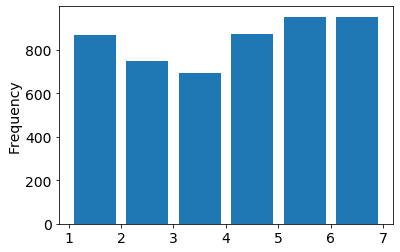

In [668]:
labels = [
    'WALKING', 
    'WALKING_UPSTAIRS',
    'WALKING_DOWNSTAIRS',
    'SITTING',
    'STANDING',
    'LAYING']
y_pd.plot.hist(bins=range(1, 8, 1), rwidth=.8)

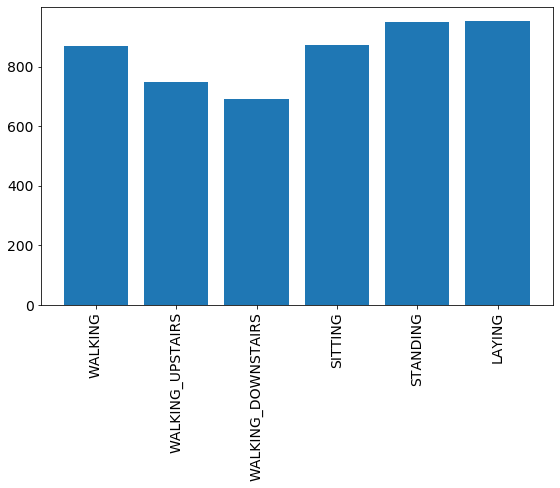

In [677]:
height = np.array([868, 747, 691, 871, 951, 952])
fig = plt.figure(figsize=[8, 7])
ax = fig.add_subplot(1, 1, 1)
ax.set_xticklabels(labels, rotation=90)
ax.bar(labels, height)
plt.tight_layout()
plt.savefig('y_bar')
plt.show()

In [ ]:
fig = plt.figure()
for i in range(X.shape[1]):
    ax = fig.add_subplot(188, 3, i + 1)
    ax

# Make new features

In [233]:
X.columns

Index(['1 tBodyAcc-mean()-X', '2 tBodyAcc-mean()-Y', '3 tBodyAcc-mean()-Z',
       '4 tBodyAcc-std()-X', '5 tBodyAcc-std()-Y', '6 tBodyAcc-std()-Z',
       '7 tBodyAcc-mad()-X', '8 tBodyAcc-mad()-Y', '9 tBodyAcc-mad()-Z',
       '10 tBodyAcc-max()-X',
       ...
       '552 fBodyBodyGyroJerkMag-meanFreq()',
       '553 fBodyBodyGyroJerkMag-skewness()',
       '554 fBodyBodyGyroJerkMag-kurtosis()',
       '555 angle(tBodyAccMean,gravity)',
       '556 angle(tBodyAccJerkMean),gravityMean)',
       '557 angle(tBodyGyroMean,gravityMean)',
       '558 angle(tBodyGyroJerkMean,gravityMean)', '559 angle(X,gravityMean)',
       '560 angle(Y,gravityMean)', '561 angle(Z,gravityMean)'],
      dtype='object', length=561)

In [467]:
def mp(df):
    return df.iloc[0] * df.iloc[1]

In [468]:
ope_list = ['mean', 'std', 'mad', 'max', 'min', 'energy', 'entropy']
for df in [X, X_test]:
    for operation in ope_list:
        for axis in ['X', 'Y', 'Z']:
            
            df_body = df.loc[:, (df.columns.str.contains(f'tBodyAcc-{operation}()') & (df.columns.str.contains(axis)))]
            df_grabity = df.loc[:, (df.columns.str.contains(f'tGravityAcc-{operation}()') & (df.columns.str.contains(axis)))]
            df_mix = pd.concat([df_body, df_grabity], axis=1)
            """
            df[f'tBodyAcc_tGravityAcc_{operation}_{axis}'] = df.sum(axis=1)
            """
            df[f'tBodyAcc_tGravityAcc_{operation}_{axis}'] = np.nan
            df[f'tBodyAcc_tGravityAcc_{operation}_{axis}'] = df_mix.apply(mp, axis=1)

/Users/numatakouhei/opt/anaconda3/envs/py3.7/lib/python3.7/site-packages/pandas/core/strings.py:1843: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.



In [479]:
for df in [X, X_test]:
    for col in df.columns:
        """
        for window in [2, 3]:
            df[f'{col}_window_{window}_mean'] = df[col].rolling(window).mean()
            #df[f'{col}_window_{window}_median'] = df[col].rolling(window).median()
            df[f'{col}_window_{window}_std'] = df[col].rolling(window).std()
            df[f'{col}_window_{window}_min'] = df[col].rolling(window).min()
            df[f'{col}_window_{window}_max'] = df[col].rolling(window).max()
        """
        df[f'{col}_mean_diff'] = df[col] - df[col].mean()
        #df[f'{col}_median_diff'] = df[col] - df[col].median()
        #df[f'{col}_max_diff'] = df[col].max() - df[col]
        #df[f'{col}_min_diff'] = df[col] - df[col].min()
        df[f'{col}_std_normalize'] = df[col] / df[col].std()
        
        """
        for periods in [1]:
            df[f'{col}_diff_{periods}'] = df[col].diff(periods)
            df[f'{col}_change_{periods}'] = df[col].pct_change(periods)
        """

In [106]:
main_features = feature_importance.sort_values(by='average', ascending=False).head(200).index

In [107]:
main_features_20 = main_features[:20]
main_features_50 = main_features[:50]
main_features_100 = main_features[:100]
main_features_20

Int64Index([ 52,  40,  50,  53,  37, 450,  41,  57,  22, 451, 129,  58, 139,
            449, 159,  49, 558, 102, 179, 635],
           dtype='int64')

In [406]:
X.iloc[:, main_features_100]

,53 tGravityAcc-min()-X,41 tGravityAcc-mean()-X,51 tGravityAcc-max()-Y,54 tGravityAcc-min()-Y,"38 tBodyAcc-correlation()-X,Y",451 fBodyGyro-maxInds-Z,42 tGravityAcc-mean()-Y,58 tGravityAcc-energy()-Y,23 tBodyAcc-entropy()-X,452 fBodyGyro-meanFreq()-X,130 tBodyGyro-max()-X,59 tGravityAcc-energy()-Z,140 tBodyGyro-iqr()-X,450 fBodyGyro-maxInds-Y,"160 tBodyGyro-correlation()-Y,Z",50 tGravityAcc-max()-X,"559 angle(X,gravityMean)",103 tBodyAccJerk-entropy()-X,180 tBodyGyroJerk-iqr()-X,"38 tBodyAcc-correlation()-X,Y_mean_diff",459 fBodyGyro-skewness()-Z,506 fBodyAccMag-max(),"560 angle(Y,gravityMean)",56 tGravityAcc-sma(),434 fBodyGyro-max()-Y,457 fBodyGyro-skewness()-Y,458 fBodyGyro-kurtosis()-Y,275 fBodyAcc-max()-X,55 tGravityAcc-min()-Z,"40 tBodyAcc-correlation()-Y,Z",539 fBodyBodyGyroMag-meanFreq(),"66 tGravityAcc-arCoeff()-X,1","158 tBodyGyro-correlation()-X,Y",452 fBodyGyro-meanFreq()-X_mean_diff,449 fBodyGyro-maxInds-X,10 tBodyAcc-max()-X,139 tBodyGyro-energy()-Z,435 fBodyGyro-max()-Z,145 tBodyGyro-entropy()-Z,52 tGravityAcc-max()-Z,"186 tBodyGyroJerk-arCoeff()-X,1",506 fBodyAccMag-max()_mean_diff,58 tGravityAcc-energy()-Y_mean_diff,504 fBodyAccMag-std(),54 tGravityAcc-min()-Y_mean_diff,143 tBodyGyro-entropy()-X,43 tGravityAcc-mean()-Z,"557 angle(tBodyGyroMean,gravityMean)",275 fBodyAcc-max()-X_mean_diff,25 tBodyAcc-entropy()-Z,434 fBodyGyro-max()-Y_mean_diff,370 fBodyAccJerk-maxInds-X,459 fBodyGyro-skewness()-Z_mean_diff,"146 tBodyGyro-arCoeff()-X,1",373 fBodyAccJerk-meanFreq()-X,460 fBodyGyro-kurtosis()-Z,59 tGravityAcc-energy()-Z_mean_diff,"188 tBodyGyroJerk-arCoeff()-X,3","560 angle(Y,gravityMean)_mean_diff","70 tGravityAcc-arCoeff()-Y,1","462 fBodyGyro-bandsEnergy()-9,16",51 tGravityAcc-max()-Y_mean_diff,"119 tBodyAccJerk-correlation()-X,Z","561 angle(Z,gravityMean)",55 tGravityAcc-min()-Z_mean_diff,"198 tBodyGyroJerk-correlation()-X,Y",435 fBodyGyro-max()-Z_mean_diff,"303 fBodyAcc-bandsEnergy()-1,8","558 angle(tBodyGyroJerkMean,gravityMean)",56 tGravityAcc-sma()_mean_diff,185 tBodyGyroJerk-entropy()-Z,292 fBodyAcc-maxInds-Y,"199 tBodyGyroJerk-correlation()-X,Z","40 tBodyAcc-correlation()-Y,Z_mean_diff",42 tGravityAcc-mean()-Y_mean_diff,456 fBodyGyro-kurtosis()-X,"187 tBodyGyroJerk-arCoeff()-X,2","317 fBodyAcc-bandsEnergy()-1,8","200 tBodyGyroJerk-correlation()-Y,Z",140 tBodyGyro-iqr()-X_mean_diff,458 fBodyGyro-kurtosis()-Y_mean_diff,"412 fBodyAccJerk-bandsEnergy()-17,24","159 tBodyGyro-correlation()-X,Z",296 fBodyAcc-meanFreq()-Z,527 fBodyBodyAccJerkMag-skewness(),248 tBodyGyroMag-entropy(),"37 tBodyAcc-arCoeff()-Z,4",455 fBodyGyro-skewness()-X,"80 tGravityAcc-correlation()-Y,Z","197 tBodyGyroJerk-arCoeff()-Z,4","303 fBodyAcc-bandsEnergy()-1,8_mean_diff",57 tGravityAcc-energy()-X,"106 tBodyAccJerk-arCoeff()-X,1","559 angle(X,gravityMean)_mean_diff","116 tBodyAccJerk-arCoeff()-Z,3","29 tBodyAcc-arCoeff()-X,4",104 tBodyAccJerk-entropy()-Y,301 fBodyAcc-skewness()-Z,457 fBodyGyro-skewness()-Y_mean_diff,180 tBodyGyroJerk-iqr()-X_mean_diff
0,0.975679,0.957021,-0.248332,-0.203088,0.136791,-1.000000,-0.229415,-0.913835,-0.697978,-0.214376,-0.834649,-0.997786,-0.949081,-1.000000,-0.704422,0.882619,-0.791842,-0.862673,-0.984248,0.269813,-0.211360,-0.972779,0.240310,-0.352519,-0.976672,0.373159,0.074439,-0.997278,-0.031725,0.427227,-0.141589,-0.644343,-0.509339,-0.137654,-0.933333,-0.940576,-0.999868,-0.992232,-0.276517,-0.027168,0.003381,-0.220401,-0.209718,-0.973408,-0.223261,0.353320,-0.027273,-0.864811,-0.356410,-0.680191,-0.246733,-0.16,0.013459,-0.113537,0.166568,-0.622506,-0.203176,-0.041052,0.180724,-0.838245,-0.999532,-0.239600,0.304145,0.040599,-0.116365,-0.104609,-0.221859,-0.999973,-0.927101,-0.220628,-0.727525,-0.933333,-0.096190,0.300388,-0.236291,-0.147287,-0.426272,-0.999252,-0.145159,-0.213929,0.608827,-0.999745,-0.120019,-0.127478,-0.496351,0.433780,-0.400732,0.204157,0.483997,-0.131128,-0.198508,0.882655,0.179971,-0.284708,0.108214,0.322735,-0.746258,-0.135706,0.553454,-0.250172
1,0.859894,0.847869,-0.366796,-0.3

In [452]:
neigh = NearestNeighbors(300)
neigh.fit(X.iloc[:, main_features_100])
neigh_index = neigh.kneighbors(X.iloc[:, main_features_100], return_distance=False)
neigh_index

array([[   0, 4438, 4179, ..., 3240, 2827,  570],
       [   1,  210,  263, ...,   18, 4396, 3930],
       [   2,   36,  277, ..., 4228, 3774, 2690],
       ...,
       [5077,   13, 3618, ..., 2640, 2061, 4035],
       [5078, 5073, 3529, ..., 4611, 4352, 1785],
       [5079, 5015, 4947, ..., 1988, 3800,   77]])

In [454]:
for row in range(X.shape[0]):
    X.loc[row, 'knn_mean'] = np.mean([y[neigh_index[row][i]] for i in range(1, len(neigh_index[row]))])

In [455]:
test_neigh_index = neigh.kneighbors(X_test.iloc[:, main_features_100], return_distance=False)
test_neigh_index

array([[ 163, 1794,  119, ..., 3693, 3678, 4399],
       [1844, 3731, 2231, ..., 1490,   81, 4386],
       [1108, 1231, 2281, ...,  745, 3447, 4646],
       ...,
       [4407, 4594, 3973, ..., 3022,  472, 1598],
       [4753, 3908,  145, ..., 3331, 3026, 1980],
       [1622, 1543, 1690, ..., 5001, 2306, 1705]])

In [456]:
for row in range(X_test.shape[0]):
    X_test.loc[row, 'knn_mean'] = np.mean([y[test_neigh_index[row][i]] for i in range(len(test_neigh_index[row]))])

In [342]:
df_concat = pd.concat([X, X_test], axis=0)
df_concat

,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,11 tBodyAcc-max()-Y,12 tBodyAcc-max()-Z,13 tBodyAcc-min()-X,14 tBodyAcc-min()-Y,15 tBodyAcc-min()-Z,16 tBodyAcc-sma(),17 tBodyAcc-energy()-X,18 tBodyAcc-energy()-Y,19 tBodyAcc-energy()-Z,20 tBodyAcc-iqr()-X,21 tBodyAcc-iqr()-Y,22 tBodyAcc-iqr()-Z,23 tBodyAcc-entropy()-X,24 tBodyAcc-entropy()-Y,25 tBodyAcc-entropy()-Z,"26 tBodyAcc-arCoeff()-X,1","27 tBodyAcc-arCoeff()-X,2","28 tBodyAcc-arCoeff()-X,3","29 tBodyAcc-arCoeff()-X,4","30 tBodyAcc-arCoeff()-Y,1","31 tBodyAcc-arCoeff()-Y,2","32 tBodyAcc-arCoeff()-Y,3","33 tBodyAcc-arCoeff()-Y,4","34 tBodyAcc-arCoeff()-Z,1","35 tBodyAcc-arCoeff()-Z,2","36 tBodyAcc-arCoeff()-Z,3","37 tBodyAcc-arCoeff()-Z,4","38 tBodyAcc-correlation()-X,Y","39 tBodyAcc-correlation()-X,Z","40 tBodyAcc-correlation()-Y,Z",41 tGravityAcc-mean()-X,42 tGravityAcc-mean()-Y,43 tGravityAcc-mean()-Z,44 tGravityAcc-std()-X,45 tGravityAcc-std()-Y,46 tGravityAcc-std()-Z,47 tGravityAcc-mad()-X,48 tGravityAcc-mad()-Y,49 tGravityAcc-mad()-Z,50 tGravityAcc-max()-X,51 tGravityAcc-max()-Y,52 tGravityAcc-max()-Z,53 tGravityAcc-min()-X,54 tGravityAcc-min()-Y,55 tGravityAcc-min()-Z,56 tGravityAcc-sma(),57 tGravityAcc-energy()-X,58 tGravityAcc-energy()-Y,59 tGravityAcc-energy()-Z,60 tGravityAcc-iqr()-X,61 tGravityAcc-iqr()-Y,62 tGravityAcc-iqr()-Z,63 tGravityAcc-entropy()-X,64 tGravityAcc-entropy()-Y,65 tGravityAcc-entropy()-Z,"66 tGravityAcc-arCoeff()-X,1","67 tGravityAcc-arCoeff()-X,2","68 tGravityAcc-arCoeff()-X,3","69 tGravityAcc-arCoeff()-X,4","70 tGravityAcc-arCoeff()-Y,1","71 tGravityAcc-arCoeff()-Y,2","72 tGravityAcc-arCoeff()-Y,3","73 tGravityAcc-arCoeff()-Y,4","74 tGravityAcc-arCoeff()-Z,1","75 tGravityAcc-arCoeff()-Z,2","76 tGravityAcc-arCoeff()-Z,3","77 tGravityAcc-arCoeff()-Z,4","78 tGravityAcc-correlation()-X,Y","79 tGravityAcc-correlation()-X,Z","80 tGravityAcc-correlation()-Y,Z",81 tBodyAccJerk-mean()-X,82 tBodyAccJerk-mean()-Y,83 tBodyAccJerk-mean()-Z,84 tBodyAccJerk-std()-X,85 tBodyAccJerk-std()-Y,86 tBodyAccJerk-std()-Z,87 tBodyAccJerk-mad()-X,88 tBodyAccJerk-mad()-Y,89 tBodyAccJerk-mad()-Z,90 tBodyAccJerk-max()-X,91 tBodyAccJerk-max()-Y,92 tBodyAccJerk-max()-Z,93 tBodyAccJerk-min()-X,94 tBodyAccJerk-min()-Y,95 tBodyAccJerk-min()-Z,96 tBodyAccJerk-sma(),97 tBodyAccJerk-energy()-X,98 tBodyAccJerk-energy()-Y,99 tBodyAccJerk-energy()-Z,100 tBodyAccJerk-iqr()-X,101 tBodyAccJerk-iqr()-Y,102 tBodyAccJerk-iqr()-Z,103 tBodyAccJerk-entropy()-X,104 tBodyAccJerk-entropy()-Y,105 tBodyAccJerk-entropy()-Z,"106 tBodyAccJerk-arCoeff()-X,1","107 tBodyAccJerk-arCoeff()-X,2","108 tBodyAccJerk-arCoeff()-X,3","109 tBodyAccJerk-arCoeff()-X,4","110 tBodyAccJerk-arCoeff()-Y,1","111 tBodyAccJerk-arCoeff()-Y,2","112 tBodyAccJerk-arCoeff()-Y,3","113 tBodyAccJerk-arCoeff()-Y,4","114 tBodyAccJerk-arCoeff()-Z,1","115 tBodyAccJerk-arCoeff()-Z,2","116 tBodyAccJerk-arCoeff()-Z,3","117 tBodyAccJerk-arCoeff()-Z,4","118 tBodyAccJerk-correlation()-X,Y","119 tBodyAccJerk-correlation()-X,Z","120 tBodyAccJerk-correlation()-Y,Z",121 tBodyGyro-mean()-X,122 tBodyGyro-mean()-Y,123 tBodyGyro-mean()-Z,124 tBodyGyro-std()-X,125 tBodyGyro-std()-Y,126 tBodyGyro-std()-Z,127 tBodyGyro-mad()-X,128 tBodyGyro-mad()-Y,129 tBodyGyro-mad()-Z,130 tBodyGyro-max()-X,131 tBodyGyro-max()-Y,132 tBodyGyro-max()-Z,133 tBodyGyro-min()-X,134 tBodyGyro-min()-Y,135 tBodyGyro-min()-Z,136 tBodyGyro-sma(),137 tBodyGyro-energy()-X,138 tBodyGyro-energy()-Y,139 tBodyGyro-energy()-Z,140 tBodyGyro-iqr()-X,141 tBodyGyro-iqr()-Y,142 tBodyGyro-iqr()-Z,143 tBodyGyro-entropy()-X,144 tBodyGyro-entropy()-Y,145 tBodyGyro-entropy()-Z,"146 tBodyGyro-arCoeff()-X,1","147 tBodyGyro-arCoeff()-X,2","148 tBodyGyro-arCoeff()-X,3","149 tBodyGyro-arCoeff()-X,4","150 tBodyGyro-arCoeff()-Y,1","151 tBodyGyro-arCoeff()-Y,2","152 tBodyGyro-arCoeff()-Y,3","153 tBodyGyro-arCoeff()-Y,4","154 tBodyGyro-arCoeff()-Z,1","15

In [343]:
for col in df_concat.columns:
    df_concat[f'{col}_mean_diff'] = df_concat[col] - df_concat[col].mean()
    #df_concat[f'{col}_median_diff'] = df_concat[col] - df_concat[col].median()
    #df_concat[f'{col}_max_diff'] = df_concat[col].max() - df_concat[col]
    #df_concat[f'{col}_min_diff'] = df_concat[col] - df_concat[col].min()
    df_concat[f'{col}_std_normalize'] = df_concat[col] / df_concat[col].std()

In [344]:
df_concat

1 tBodyAcc-mean()-X  2 tBodyAcc-mean()-Y  3 tBodyAcc-mean()-Z  \
0                0.274159            -0.023516            -0.125734   
1                0.312272            -0.013159            -0.163652   
2                0.349844             0.013543            -0.135082   
3                0.177863            -0.089714            -0.049136   
4                0.281334            -0.018230            -0.129879   
...                   ...                  ...                  ...   
5214             0.278630            -0.015151            -0.105965   
5215             0.274893            -0.023347            -0.112283   
5216             0.108785            -0.028065            -0.170698   
5217             0.308964            -0.011140            -0.158638   
5218             0.242544            -0.019377            -0.077072   

      4 tBodyAcc-std()-X  5 tBodyAcc-std()-Y  6 tBodyAcc-std()-Z  \
0              -0.996295           -0.975114           -0.969480   
1               0.091366            0.378466           -0.107096   
2               0.027569            0.284708           -0.062336   
3              -0.877520           -0.638354           -0.868156   
4              -0.979811           -0.937562           -0.870520   
...                  ...                 ...                 ...   
5214           -0.988512           -0.883547           -0.936080   
5215           -0.997806           -0.980717           -0.980161   
5216           -0.135815           -0.144176           -0.224339   
5217           -0.942441           -0.807326           -0.906032   
5218           -0.302479           -0.122940           -0.138162   

      7 tBodyAcc-mad()-X  8 tBodyAcc-mad()-Y  9 tBodyAcc-mad()-Z  \
0              -0.996483           -0.978290           -0.967744   
1               0.088104            0.395949           -0.126879   
2               0.005557            0.281300           -0.085082   
3              -0.903017           -0.641876           -0.870473   
4              -0.985423           -0.942466           -0.863601   
...                  ...                 ...                 ...   
5214           -0.989945           -0.885186           -0.929411   
5215           -0.998243           -0.980349           -0.976160   
5216           -0.217185           -0.231471           -0.167579   
5217           -0.958067           -0.839508           -0.902198   
5218           -0.394200           -0.152088           -0.143473   

      10 tBodyAcc-max()-X  11 tBodyAcc-max()-Y  12 tBodyAcc-max()-Z  \
0               -0.940576            -0.564363            -0.814307   
1                0.089570             0.201106            -0.128118   
2                0.105317             0.081426            -0.028802   
3               -0.806036            -0.479090            -0.682097   
4               -0.888548            -0.535351            -0.768858   
...                   ...                  ...                  ...   
5214            -0.933214            -0.538181            -0.789386   
5215            -0.943916            -0.566224            -0.823331   
5216             0.238562            -0.211274            -0.468335   
5217            -0.887848            -0.360443            -0.781404   
5218             0.133080            -0.074525            -0.089816   

      13 tBodyAcc-min()-X  14 tBodyAcc-min()-Y  15 tBodyAcc-min()-Z  \
0                0.848522             0.676482             0.819038   
1               -0.025754            -0.071387             0.293977   
2                0.072254             0.009759             0.378347   
3                0.659273             0.438929             0.793040   
4                0.818893             0.652719             0.759170   
...                   ...                  ...                  ...   
5214             0.837330             0.641055             0.819624   
5215             0.846698             0.683200             0.838938   
5216             0.279918  

In [346]:
X = df_concat.iloc[:5080, :]
X_test = df_concat.iloc[5080:, :]

In [503]:
X.head()

,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,11 tBodyAcc-max()-Y,12 tBodyAcc-max()-Z,13 tBodyAcc-min()-X,14 tBodyAcc-min()-Y,15 tBodyAcc-min()-Z,16 tBodyAcc-sma(),17 tBodyAcc-energy()-X,18 tBodyAcc-energy()-Y,19 tBodyAcc-energy()-Z,20 tBodyAcc-iqr()-X,21 tBodyAcc-iqr()-Y,22 tBodyAcc-iqr()-Z,23 tBodyAcc-entropy()-X,24 tBodyAcc-entropy()-Y,25 tBodyAcc-entropy()-Z,"26 tBodyAcc-arCoeff()-X,1","27 tBodyAcc-arCoeff()-X,2","28 tBodyAcc-arCoeff()-X,3","29 tBodyAcc-arCoeff()-X,4","30 tBodyAcc-arCoeff()-Y,1","31 tBodyAcc-arCoeff()-Y,2","32 tBodyAcc-arCoeff()-Y,3","33 tBodyAcc-arCoeff()-Y,4","34 tBodyAcc-arCoeff()-Z,1","35 tBodyAcc-arCoeff()-Z,2","36 tBodyAcc-arCoeff()-Z,3","37 tBodyAcc-arCoeff()-Z,4","38 tBodyAcc-correlation()-X,Y","39 tBodyAcc-correlation()-X,Z","40 tBodyAcc-correlation()-Y,Z",41 tGravityAcc-mean()-X,42 tGravityAcc-mean()-Y,43 tGravityAcc-mean()-Z,44 tGravityAcc-std()-X,45 tGravityAcc-std()-Y,46 tGravityAcc-std()-Z,47 tGravityAcc-mad()-X,48 tGravityAcc-mad()-Y,49 tGravityAcc-mad()-Z,50 tGravityAcc-max()-X,51 tGravityAcc-max()-Y,52 tGravityAcc-max()-Z,53 tGravityAcc-min()-X,54 tGravityAcc-min()-Y,55 tGravityAcc-min()-Z,56 tGravityAcc-sma(),57 tGravityAcc-energy()-X,58 tGravityAcc-energy()-Y,59 tGravityAcc-energy()-Z,60 tGravityAcc-iqr()-X,61 tGravityAcc-iqr()-Y,62 tGravityAcc-iqr()-Z,63 tGravityAcc-entropy()-X,64 tGravityAcc-entropy()-Y,65 tGravityAcc-entropy()-Z,"66 tGravityAcc-arCoeff()-X,1","67 tGravityAcc-arCoeff()-X,2","68 tGravityAcc-arCoeff()-X,3","69 tGravityAcc-arCoeff()-X,4","70 tGravityAcc-arCoeff()-Y,1","71 tGravityAcc-arCoeff()-Y,2","72 tGravityAcc-arCoeff()-Y,3","73 tGravityAcc-arCoeff()-Y,4","74 tGravityAcc-arCoeff()-Z,1","75 tGravityAcc-arCoeff()-Z,2","76 tGravityAcc-arCoeff()-Z,3","77 tGravityAcc-arCoeff()-Z,4","78 tGravityAcc-correlation()-X,Y","79 tGravityAcc-correlation()-X,Z","80 tGravityAcc-correlation()-Y,Z",81 tBodyAccJerk-mean()-X,82 tBodyAccJerk-mean()-Y,83 tBodyAccJerk-mean()-Z,84 tBodyAccJerk-std()-X,85 tBodyAccJerk-std()-Y,86 tBodyAccJerk-std()-Z,87 tBodyAccJerk-mad()-X,88 tBodyAccJerk-mad()-Y,89 tBodyAccJerk-mad()-Z,90 tBodyAccJerk-max()-X,91 tBodyAccJerk-max()-Y,92 tBodyAccJerk-max()-Z,93 tBodyAccJerk-min()-X,94 tBodyAccJerk-min()-Y,95 tBodyAccJerk-min()-Z,96 tBodyAccJerk-sma(),97 tBodyAccJerk-energy()-X,98 tBodyAccJerk-energy()-Y,99 tBodyAccJerk-energy()-Z,100 tBodyAccJerk-iqr()-X,101 tBodyAccJerk-iqr()-Y,102 tBodyAccJerk-iqr()-Z,103 tBodyAccJerk-entropy()-X,104 tBodyAccJerk-entropy()-Y,105 tBodyAccJerk-entropy()-Z,"106 tBodyAccJerk-arCoeff()-X,1","107 tBodyAccJerk-arCoeff()-X,2","108 tBodyAccJerk-arCoeff()-X,3","109 tBodyAccJerk-arCoeff()-X,4","110 tBodyAccJerk-arCoeff()-Y,1","111 tBodyAccJerk-arCoeff()-Y,2","112 tBodyAccJerk-arCoeff()-Y,3","113 tBodyAccJerk-arCoeff()-Y,4","114 tBodyAccJerk-arCoeff()-Z,1","115 tBodyAccJerk-arCoeff()-Z,2","116 tBodyAccJerk-arCoeff()-Z,3","117 tBodyAccJerk-arCoeff()-Z,4","118 tBodyAccJerk-correlation()-X,Y","119 tBodyAccJerk-correlation()-X,Z","120 tBodyAccJerk-correlation()-Y,Z",121 tBodyGyro-mean()-X,122 tBodyGyro-mean()-Y,123 tBodyGyro-mean()-Z,124 tBodyGyro-std()-X,125 tBodyGyro-std()-Y,126 tBodyGyro-std()-Z,127 tBodyGyro-mad()-X,128 tBodyGyro-mad()-Y,129 tBodyGyro-mad()-Z,130 tBodyGyro-max()-X,131 tBodyGyro-max()-Y,132 tBodyGyro-max()-Z,133 tBodyGyro-min()-X,134 tBodyGyro-min()-Y,135 tBodyGyro-min()-Z,136 tBodyGyro-sma(),137 tBodyGyro-energy()-X,138 tBodyGyro-energy()-Y,139 tBodyGyro-energy()-Z,140 tBodyGyro-iqr()-X,141 tBodyGyro-iqr()-Y,142 tBodyGyro-iqr()-Z,143 tBodyGyro-entropy()-X,144 tBodyGyro-entropy()-Y,145 tBodyGyro-entropy()-Z,"146 tBodyGyro-arCoeff()-X,1","147 tBodyGyro-arCoeff()-X,2","148 tBodyGyro-arCoeff()-X,3","149 tBodyGyro-arCoeff()-X,4","150 tBodyGyro-arCoeff()-Y,1","151 tBodyGyro-arCoeff()-Y,2","152 tBodyGyro-arCoeff()-Y,3","153 tBodyGyro-arCoeff()-Y,4","154 tBodyGyro-arCoeff()-Z,1","15

In [28]:
from tqdm import tqdm
from scipy.stats import ks_2samp
list_p_value = []

for i in tqdm(X.columns):
    list_p_value.append(ks_2samp(X_test[i], X[i])[1])
    
Se = pd.Series(list_p_value, index=X.columns).sort_values()
list_discarded = list(Se[Se < .1].index)

print(len(list_discarded))

# features_discard = []

features_columns = [col for col in list(X) if col not in list_discarded]

100%|██████████| 2805/2805 [02:50<00:00, 16.42it/s]


0


(array([   0.,    0.,    0.,    0.,    0., 2805.,    0.,    0.,    0.,
           0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <a list of 10 Patch objects>)

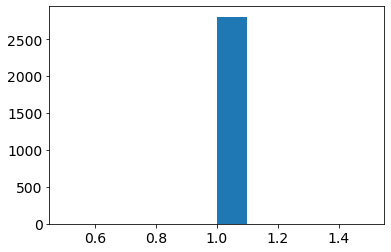

In [29]:
plt.hist(list_p_value)

# Construct model LGBM

In [9]:
# group (subject)
groups = np.array(subject)
groups

array([[22],
       [22],
       [22],
       ...,
       [20],
       [20],
       [20]])

In [10]:
# Index where a subject start
[list(groups).index(x) for x in np.unique(groups)]

[3647,
 3345,
 2703,
 2401,
 3020,
 1407,
 2073,
 1041,
 3994,
 4362,
 4726,
 0,
 1701,
 665,
 321]

In [504]:
n_fold = 5
seed = 46
#kf = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=seed)
kf = GroupKFold(n_splits=n_fold)
n_train = X.shape[0]
n_test = X_test.shape[0]
n_features = X.shape[1]
feature_importance = pd.DataFrame()
feature_importance['feature'] = X.columns

## Hyper parameters tuning

In [12]:
def objective(trial):
    x_score = []
    final_cv_train = np.zeros(X.shape[0])
    cv_train = np.zeros(X.shape[0])
    
    params = {
        'objective': 'multiclass',
        'metric': 'multi_error',
        'num_class': 6,
        'verbosity': -1,
        'boosting_type': 'gbdt',
        #'learning_rate': 0.1,
        'random_state': seed,
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
    }
    
    fold_scores = []
    
    for i, (train_index, valid_index) in enumerate(kf.split(X, y, groups)):
        print(f'Fold {i}...')
        X_train = X.iloc[train_index]
        y_train = y[train_index]
        X_valid = X.iloc[valid_index]
        y_valid = y[valid_index]
    
        train_data = lgb.Dataset(X_train, label=y_train)
        valid_data = lgb.Dataset(X_valid, label=y_valid, reference=train_data)
        clf = lgb.train(params, train_data, 1000, valid_sets=valid_data, verbose_eval=100, early_stopping_rounds=20)
        preds_p = clf.predict(X_valid, num_iteration=clf.best_iteration)
        cv_train[valid_index] += np.argmax(preds_p, axis=1)

        score = accuracy_score(y_valid, cv_train[valid_index])
        fold_scores.append(score)
        
    final_cv_train += cv_train
    print(f'cv score: {np.mean(fold_scores)}')
    
    x_score.append(accuracy_score(y, cv_train))
    return 1.0 - x_score[0]

"""
def objective(trial):
    X_train, y_train = X[:3020], y[:3020]
    X_valid, y_valid = X[3020:], y[3020:]
    params = {
        'objective': 'multiclass',
        'metric': 'multi_error',
        'num_class': 6,
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'random_state': seed,
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
    }
    
    train_data = lgb.Dataset(X_train, label=y_train)
    valid_data = lgb.Dataset(X_valid, label=y_valid, reference=train_data)
    clf = lgb.train(params, train_data, 1000, valid_sets=valid_data, verbose_eval=100, early_stopping_rounds=10)
    preds_p = clf.predict(X_valid, num_iteration=clf.best_iteration)
    preds = np.argmax(preds_p, axis=1)
    
    #lgb = lgb.train(params, X_train, y_train)
    #preds = lgb.predict(X_valid)
    acc = accuracy_score(y_valid, preds)
    return 1.0 - acc
"""

"\ndef objective(trial):\n    X_train, y_train = X[:3020], y[:3020]\n    X_valid, y_valid = X[3020:], y[3020:]\n    params = {\n        'objective': 'multiclass',\n        'metric': 'multi_error',\n        'num_class': 6,\n        'verbosity': -1,\n        'boosting_type': 'gbdt',\n        'random_state': seed,\n        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),\n        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),\n        'num_leaves': trial.suggest_int('num_leaves', 2, 256),\n        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),\n        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),\n        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),\n        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),\n    }\n    \n    train_data = lgb.Dataset(X_train, label=y_train)\n    valid_data = lgb.Dataset(X_valid, label=y_valid, reference=train_data)\n    clf = lgb.train(param

In [13]:
study = optuna.create_study()
study.optimize(objective, n_trials=100)
print(f'Number of finished trials: {len(study.trials)}')
print('Best trials: ')
trial = study.best_trial
print(f'Value: {trial.value}')
print('Params: ')

Fold 0...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0776031
Early stopping, best iteration is:
[102]	valid_0's multi_error: 0.0766208
Fold 1...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[36]	valid_0's multi_error: 0.0421156
Fold 2...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[23]	valid_0's multi_error: 0.0621302
Fold 3...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[77]	valid_0's multi_error: 0.0729064
Fold 4...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[27]	valid_0's multi_error: 0.144269
cv score: 0.9203916491451473


[I 2020-02-03 22:38:19,531] Finished trial#0 resulted in value: 0.0795275590551181. Current best value is 0.0795275590551181 with parameters: {'lambda_l1': 0.0014785942478169934, 'lambda_l2': 0.9786753284296814, 'num_leaves': 174, 'feature_fraction': 0.7016773089848116, 'bagging_fraction': 0.4415473401699578, 'bagging_freq': 5, 'min_child_samples': 12}.


Fold 0...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[46]	valid_0's multi_error: 0.0756385
Fold 1...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[67]	valid_0's multi_error: 0.029383
Fold 2...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0433925
Early stopping, best iteration is:
[89]	valid_0's multi_error: 0.0404339
Fold 3...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0807882
Early stopping, best iteration is:
[89]	valid_0's multi_error: 0.0778325
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.118577
Early stopping, best iteration is:
[156]	valid_0's multi_error: 0.105731
cv score: 0.9341961745156644


[I 2020-02-03 22:39:00,978] Finished trial#1 resulted in value: 0.06574803149606301. Current best value is 0.06574803149606301 with parameters: {'lambda_l1': 3.6809684338093295e-08, 'lambda_l2': 0.07039706394910043, 'num_leaves': 192, 'feature_fraction': 0.4996400812672352, 'bagging_fraction': 0.7172614621758404, 'bagging_freq': 3, 'min_child_samples': 52}.


Fold 0...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[67]	valid_0's multi_error: 0.0736739
Fold 1...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0264447
Early stopping, best iteration is:
[113]	valid_0's multi_error: 0.0254652
Fold 2...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[61]	valid_0's multi_error: 0.0512821
Fold 3...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[63]	valid_0's multi_error: 0.0778325
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.125494
Early stopping, best iteration is:
[119]	valid_0's multi_error: 0.12253
cv score: 0.9298433383266824


[I 2020-02-03 22:39:31,961] Finished trial#2 resulted in value: 0.07007874015748028. Current best value is 0.06574803149606301 with parameters: {'lambda_l1': 3.6809684338093295e-08, 'lambda_l2': 0.07039706394910043, 'num_leaves': 192, 'feature_fraction': 0.4996400812672352, 'bagging_fraction': 0.7172614621758404, 'bagging_freq': 3, 'min_child_samples': 52}.


Fold 0...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0756385
Early stopping, best iteration is:
[86]	valid_0's multi_error: 0.0717092
Fold 1...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[76]	valid_0's multi_error: 0.0323213
Fold 2...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's multi_error: 0.0848126
Fold 3...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0788177
Early stopping, best iteration is:
[90]	valid_0's multi_error: 0.0778325
Fold 4...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[51]	valid_0's multi_error: 0.136364
cv score: 0.9193921481164624


[I 2020-02-03 22:39:58,531] Finished trial#3 resulted in value: 0.08051181102362204. Current best value is 0.06574803149606301 with parameters: {'lambda_l1': 3.6809684338093295e-08, 'lambda_l2': 0.07039706394910043, 'num_leaves': 192, 'feature_fraction': 0.4996400812672352, 'bagging_fraction': 0.7172614621758404, 'bagging_freq': 3, 'min_child_samples': 52}.


Fold 0...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[10]	valid_0's multi_error: 0.0952849
Fold 1...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[19]	valid_0's multi_error: 0.0391773
Fold 2...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[15]	valid_0's multi_error: 0.0650888
Fold 3...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0817734
Early stopping, best iteration is:
[85]	valid_0's multi_error: 0.0817734
Fold 4...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[53]	valid_0's multi_error: 0.129447
cv score: 0.917845810758941


[I 2020-02-03 22:40:36,738] Finished trial#4 resulted in value: 0.08208661417322838. Current best value is 0.06574803149606301 with parameters: {'lambda_l1': 3.6809684338093295e-08, 'lambda_l2': 0.07039706394910043, 'num_leaves': 192, 'feature_fraction': 0.4996400812672352, 'bagging_fraction': 0.7172614621758404, 'bagging_freq': 3, 'min_child_samples': 52}.


Fold 0...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[51]	valid_0's multi_error: 0.0854617
Fold 1...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[23]	valid_0's multi_error: 0.0352595
Fold 2...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[44]	valid_0's multi_error: 0.0641026
Fold 3...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0857143
Early stopping, best iteration is:
[88]	valid_0's multi_error: 0.0857143
Fold 4...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[64]	valid_0's multi_error: 0.134387
cv score: 0.9190149118711511


[I 2020-02-03 22:41:13,553] Finished trial#5 resulted in value: 0.08090551181102357. Current best value is 0.06574803149606301 with parameters: {'lambda_l1': 3.6809684338093295e-08, 'lambda_l2': 0.07039706394910043, 'num_leaves': 192, 'feature_fraction': 0.4996400812672352, 'bagging_fraction': 0.7172614621758404, 'bagging_freq': 3, 'min_child_samples': 52}.


Fold 0...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[54]	valid_0's multi_error: 0.0717092
Fold 1...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[75]	valid_0's multi_error: 0.0254652
Fold 2...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.056213
Early stopping, best iteration is:
[80]	valid_0's multi_error: 0.0542406
Fold 3...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[60]	valid_0's multi_error: 0.0807882
Fold 4...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[47]	valid_0's multi_error: 0.137352
cv score: 0.9260889897764024


[I 2020-02-03 22:41:34,469] Finished trial#6 resulted in value: 0.07381889763779526. Current best value is 0.06574803149606301 with parameters: {'lambda_l1': 3.6809684338093295e-08, 'lambda_l2': 0.07039706394910043, 'num_leaves': 192, 'feature_fraction': 0.4996400812672352, 'bagging_fraction': 0.7172614621758404, 'bagging_freq': 3, 'min_child_samples': 52}.


Fold 0...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[52]	valid_0's multi_error: 0.0795678
Fold 1...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[14]	valid_0's multi_error: 0.0568071
Fold 2...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[26]	valid_0's multi_error: 0.0552268
Fold 3...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0945813
Early stopping, best iteration is:
[82]	valid_0's multi_error: 0.0945813
Fold 4...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[64]	valid_0's multi_error: 0.118577
cv score: 0.919047997556963


[I 2020-02-03 22:43:30,690] Finished trial#7 resulted in value: 0.08090551181102357. Current best value is 0.06574803149606301 with parameters: {'lambda_l1': 3.6809684338093295e-08, 'lambda_l2': 0.07039706394910043, 'num_leaves': 192, 'feature_fraction': 0.4996400812672352, 'bagging_fraction': 0.7172614621758404, 'bagging_freq': 3, 'min_child_samples': 52}.


Fold 0...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	valid_0's multi_error: 0.0854617
Fold 1...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[28]	valid_0's multi_error: 0.0411361
Fold 2...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[36]	valid_0's multi_error: 0.0552268
Fold 3...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0935961
Early stopping, best iteration is:
[115]	valid_0's multi_error: 0.0916256
Fold 4...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[33]	valid_0's multi_error: 0.132411
cv score: 0.9188277323919118


[I 2020-02-03 22:44:20,482] Finished trial#8 resulted in value: 0.08110236220472444. Current best value is 0.06574803149606301 with parameters: {'lambda_l1': 3.6809684338093295e-08, 'lambda_l2': 0.07039706394910043, 'num_leaves': 192, 'feature_fraction': 0.4996400812672352, 'bagging_fraction': 0.7172614621758404, 'bagging_freq': 3, 'min_child_samples': 52}.


Fold 0...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[54]	valid_0's multi_error: 0.064833
Fold 1...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0215475
Early stopping, best iteration is:
[106]	valid_0's multi_error: 0.0186092
Fold 2...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[69]	valid_0's multi_error: 0.0453649
Fold 3...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[61]	valid_0's multi_error: 0.070936
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.123518
Early stopping, best iteration is:
[140]	valid_0's multi_error: 0.112648
cv score: 0.9375217427984417


[I 2020-02-03 22:45:01,923] Finished trial#9 resulted in value: 0.06240157480314956. Current best value is 0.06240157480314956 with parameters: {'lambda_l1': 0.0037684324365678482, 'lambda_l2': 1.0242617860271896, 'num_leaves': 107, 'feature_fraction': 0.8887345980808714, 'bagging_fraction': 0.5046798842695785, 'bagging_freq': 7, 'min_child_samples': 79}.


Fold 0...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.064833
Early stopping, best iteration is:
[111]	valid_0's multi_error: 0.0569745
Fold 1...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[79]	valid_0's multi_error: 0.0333007
Fold 2...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[47]	valid_0's multi_error: 0.0581854
Fold 3...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.079803
Early stopping, best iteration is:
[100]	valid_0's multi_error: 0.079803
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.12253
Early stopping, best iteration is:
[174]	valid_0's multi_error: 0.0928854
cv score: 0.9357702238348704


[I 2020-02-03 22:45:23,574] Finished trial#10 resulted in value: 0.06417322834645667. Current best value is 0.06240157480314956 with parameters: {'lambda_l1': 0.0037684324365678482, 'lambda_l2': 1.0242617860271896, 'num_leaves': 107, 'feature_fraction': 0.8887345980808714, 'bagging_fraction': 0.5046798842695785, 'bagging_freq': 7, 'min_child_samples': 79}.


Fold 0...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0520629
Early stopping, best iteration is:
[100]	valid_0's multi_error: 0.0520629
Fold 1...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0342801
Early stopping, best iteration is:
[149]	valid_0's multi_error: 0.0186092
Fold 2...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0512821
Early stopping, best iteration is:
[133]	valid_0's multi_error: 0.0463511
Fold 3...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[69]	valid_0's multi_error: 0.0788177
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.101779
Early stopping, best iteration is:
[140]	valid_0's multi_error: 0.0918972
cv score: 0.942452374593232


[I 2020-02-03 22:45:52,429] Finished trial#11 resulted in value: 0.057480314960629886. Current best value is 0.057480314960629886 with parameters: {'lambda_l1': 0.005980305625505754, 'lambda_l2': 0.0031101092495985938, 'num_leaves': 4, 'feature_fraction': 0.7661587987585607, 'bagging_fraction': 0.41102530147254424, 'bagging_freq': 7, 'min_child_samples': 98}.


Fold 0...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[26]	valid_0's multi_error: 0.0776031
Fold 1...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[78]	valid_0's multi_error: 0.0264447
Fold 2...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[10]	valid_0's multi_error: 0.0729783
Fold 3...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[59]	valid_0's multi_error: 0.0827586
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.109684
Early stopping, best iteration is:
[162]	valid_0's multi_error: 0.0988142
cv score: 0.9282802081598692


[I 2020-02-03 22:46:23,570] Finished trial#12 resulted in value: 0.07165354330708662. Current best value is 0.057480314960629886 with parameters: {'lambda_l1': 0.005980305625505754, 'lambda_l2': 0.0031101092495985938, 'num_leaves': 4, 'feature_fraction': 0.7661587987585607, 'bagging_fraction': 0.41102530147254424, 'bagging_freq': 7, 'min_child_samples': 98}.


Fold 0...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0667976
Early stopping, best iteration is:
[153]	valid_0's multi_error: 0.0589391
Fold 1...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0342801
Early stopping, best iteration is:
[86]	valid_0's multi_error: 0.0284035
Fold 2...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[71]	valid_0's multi_error: 0.0424063
Fold 3...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[67]	valid_0's multi_error: 0.0768473
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.121542
Early stopping, best iteration is:
[160]	valid_0's multi_error: 0.0988142
cv score: 0.9389179092502754


[I 2020-02-03 22:47:45,363] Finished trial#13 resulted in value: 0.0610236220472441. Current best value is 0.057480314960629886 with parameters: {'lambda_l1': 0.005980305625505754, 'lambda_l2': 0.0031101092495985938, 'num_leaves': 4, 'feature_fraction': 0.7661587987585607, 'bagging_fraction': 0.41102530147254424, 'bagging_freq': 7, 'min_child_samples': 98}.


Fold 0...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[42]	valid_0's multi_error: 0.0726916
Fold 1...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[67]	valid_0's multi_error: 0.0333007
Fold 2...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[78]	valid_0's multi_error: 0.0394477
Fold 3...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0827586
Early stopping, best iteration is:
[127]	valid_0's multi_error: 0.0689655
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.109684
Early stopping, best iteration is:
[109]	valid_0's multi_error: 0.103755
cv score: 0.936367914525303


[I 2020-02-03 22:48:55,335] Finished trial#14 resulted in value: 0.06358267716535437. Current best value is 0.057480314960629886 with parameters: {'lambda_l1': 0.005980305625505754, 'lambda_l2': 0.0031101092495985938, 'num_leaves': 4, 'feature_fraction': 0.7661587987585607, 'bagging_fraction': 0.41102530147254424, 'bagging_freq': 7, 'min_child_samples': 98}.


Fold 0...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0697446
Early stopping, best iteration is:
[105]	valid_0's multi_error: 0.06778
Fold 1...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0303624
Early stopping, best iteration is:
[91]	valid_0's multi_error: 0.029383
Fold 2...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0473373
Early stopping, best iteration is:
[155]	valid_0's multi_error: 0.0394477
Fold 3...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0729064
Early stopping, best iteration is:
[121]	valid_0's multi_error: 0.0679803
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.114625
Early stopping, best iteration is:
[158]	valid_0's multi_error: 0.102767
cv score: 0.9385284511334809


[I 2020-02-03 22:50:17,788] Finished trial#15 resulted in value: 0.06141732283464563. Current best value is 0.057480314960629886 with parameters: {'lambda_l1': 0.005980305625505754, 'lambda_l2': 0.0031101092495985938, 'num_leaves': 4, 'feature_fraction': 0.7661587987585607, 'bagging_fraction': 0.41102530147254424, 'bagging_freq': 7, 'min_child_samples': 98}.


Fold 0...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0726916
Early stopping, best iteration is:
[89]	valid_0's multi_error: 0.0717092
Fold 1...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[26]	valid_0's multi_error: 0.0568071
Fold 2...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[59]	valid_0's multi_error: 0.0542406
Fold 3...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[79]	valid_0's multi_error: 0.0935961
Fold 4...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[47]	valid_0's multi_error: 0.133399
cv score: 0.918049562907037


[I 2020-02-03 22:51:07,991] Finished trial#16 resulted in value: 0.08188976377952761. Current best value is 0.057480314960629886 with parameters: {'lambda_l1': 0.005980305625505754, 'lambda_l2': 0.0031101092495985938, 'num_leaves': 4, 'feature_fraction': 0.7661587987585607, 'bagging_fraction': 0.41102530147254424, 'bagging_freq': 7, 'min_child_samples': 98}.


Fold 0...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[61]	valid_0's multi_error: 0.0687623
Fold 1...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0264447
Early stopping, best iteration is:
[101]	valid_0's multi_error: 0.0244858
Fold 2...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0473373
Early stopping, best iteration is:
[95]	valid_0's multi_error: 0.0463511
Fold 3...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[59]	valid_0's multi_error: 0.0768473
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.113636
Early stopping, best iteration is:
[159]	valid_0's multi_error: 0.0998024
cv score: 0.9367502351580137


[I 2020-02-03 22:52:03,751] Finished trial#17 resulted in value: 0.06318897637795273. Current best value is 0.057480314960629886 with parameters: {'lambda_l1': 0.005980305625505754, 'lambda_l2': 0.0031101092495985938, 'num_leaves': 4, 'feature_fraction': 0.7661587987585607, 'bagging_fraction': 0.41102530147254424, 'bagging_freq': 7, 'min_child_samples': 98}.


Fold 0...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[37]	valid_0's multi_error: 0.0785855
Fold 1...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[76]	valid_0's multi_error: 0.0342801
Fold 2...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[78]	valid_0's multi_error: 0.0394477
Fold 3...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0778325
Early stopping, best iteration is:
[96]	valid_0's multi_error: 0.0768473
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.109684
Early stopping, best iteration is:
[104]	valid_0's multi_error: 0.105731
cv score: 0.9330216346172641


[I 2020-02-03 22:52:46,153] Finished trial#18 resulted in value: 0.06692913385826771. Current best value is 0.057480314960629886 with parameters: {'lambda_l1': 0.005980305625505754, 'lambda_l2': 0.0031101092495985938, 'num_leaves': 4, 'feature_fraction': 0.7661587987585607, 'bagging_fraction': 0.41102530147254424, 'bagging_freq': 7, 'min_child_samples': 98}.


Fold 0...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0667976
Early stopping, best iteration is:
[129]	valid_0's multi_error: 0.0550098
Fold 1...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0274241
Early stopping, best iteration is:
[100]	valid_0's multi_error: 0.0274241
Fold 2...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[78]	valid_0's multi_error: 0.0424063
Fold 3...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0827586
Early stopping, best iteration is:
[81]	valid_0's multi_error: 0.079803
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.124506
Early stopping, best iteration is:
[90]	valid_0's multi_error: 0.119565
cv score: 0.9351583196196828


[I 2020-02-03 22:53:56,476] Finished trial#19 resulted in value: 0.06476377952755907. Current best value is 0.057480314960629886 with parameters: {'lambda_l1': 0.005980305625505754, 'lambda_l2': 0.0031101092495985938, 'num_leaves': 4, 'feature_fraction': 0.7661587987585607, 'bagging_fraction': 0.41102530147254424, 'bagging_freq': 7, 'min_child_samples': 98}.


Fold 0...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[43]	valid_0's multi_error: 0.0736739
Fold 1...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[28]	valid_0's multi_error: 0.0450539
Fold 2...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[28]	valid_0's multi_error: 0.0591716
Fold 3...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0857143
Early stopping, best iteration is:
[108]	valid_0's multi_error: 0.0837438
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.120553
Early stopping, best iteration is:
[129]	valid_0's multi_error: 0.109684
cv score: 0.9257346052891637


[I 2020-02-03 22:54:53,022] Finished trial#20 resulted in value: 0.0742125984251969. Current best value is 0.057480314960629886 with parameters: {'lambda_l1': 0.005980305625505754, 'lambda_l2': 0.0031101092495985938, 'num_leaves': 4, 'feature_fraction': 0.7661587987585607, 'bagging_fraction': 0.41102530147254424, 'bagging_freq': 7, 'min_child_samples': 98}.


Fold 0...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[56]	valid_0's multi_error: 0.0756385
Fold 1...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[62]	valid_0's multi_error: 0.0323213
Fold 2...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[61]	valid_0's multi_error: 0.0522682
Fold 3...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[60]	valid_0's multi_error: 0.079803
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.116601
Early stopping, best iteration is:
[165]	valid_0's multi_error: 0.103755
cv score: 0.9312428196996958


[I 2020-02-03 22:55:47,560] Finished trial#21 resulted in value: 0.06870078740157481. Current best value is 0.057480314960629886 with parameters: {'lambda_l1': 0.005980305625505754, 'lambda_l2': 0.0031101092495985938, 'num_leaves': 4, 'feature_fraction': 0.7661587987585607, 'bagging_fraction': 0.41102530147254424, 'bagging_freq': 7, 'min_child_samples': 98}.


Fold 0...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[34]	valid_0's multi_error: 0.0785855
Fold 1...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0323213
Early stopping, best iteration is:
[104]	valid_0's multi_error: 0.0303624
Fold 2...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0453649
Early stopping, best iteration is:
[105]	valid_0's multi_error: 0.0433925
Fold 3...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0768473
Early stopping, best iteration is:
[85]	valid_0's multi_error: 0.0758621
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.121542
[200]	valid_0's multi_error: 0.103755
Early stopping, best iteration is:
[219]	valid_0's multi_error: 0.0988142
cv score: 0.9345966690702017


[I 2020-02-03 22:56:36,870] Finished trial#22 resulted in value: 0.06535433070866137. Current best value is 0.057480314960629886 with parameters: {'lambda_l1': 0.005980305625505754, 'lambda_l2': 0.0031101092495985938, 'num_leaves': 4, 'feature_fraction': 0.7661587987585607, 'bagging_fraction': 0.41102530147254424, 'bagging_freq': 7, 'min_child_samples': 98}.


Fold 0...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[35]	valid_0's multi_error: 0.0795678
Fold 1...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0333007
Early stopping, best iteration is:
[88]	valid_0's multi_error: 0.0303624
Fold 2...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[77]	valid_0's multi_error: 0.0424063
Fold 3...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0768473
Early stopping, best iteration is:
[82]	valid_0's multi_error: 0.0738916
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.109684
Early stopping, best iteration is:
[119]	valid_0's multi_error: 0.102767
cv score: 0.9342010189107135


[I 2020-02-03 22:57:46,216] Finished trial#23 resulted in value: 0.06574803149606301. Current best value is 0.057480314960629886 with parameters: {'lambda_l1': 0.005980305625505754, 'lambda_l2': 0.0031101092495985938, 'num_leaves': 4, 'feature_fraction': 0.7661587987585607, 'bagging_fraction': 0.41102530147254424, 'bagging_freq': 7, 'min_child_samples': 98}.


Fold 0...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0658153
Early stopping, best iteration is:
[83]	valid_0's multi_error: 0.064833
Fold 1...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[76]	valid_0's multi_error: 0.029383
Fold 2...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0433925
Early stopping, best iteration is:
[89]	valid_0's multi_error: 0.0414201
Fold 3...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[69]	valid_0's multi_error: 0.079803
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.123518
Early stopping, best iteration is:
[83]	valid_0's multi_error: 0.119565
cv score: 0.9329991489644278


[I 2020-02-03 22:58:25,508] Finished trial#24 resulted in value: 0.06692913385826771. Current best value is 0.057480314960629886 with parameters: {'lambda_l1': 0.005980305625505754, 'lambda_l2': 0.0031101092495985938, 'num_leaves': 4, 'feature_fraction': 0.7661587987585607, 'bagging_fraction': 0.41102530147254424, 'bagging_freq': 7, 'min_child_samples': 98}.


Fold 0...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[43]	valid_0's multi_error: 0.0815324
Fold 1...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[57]	valid_0's multi_error: 0.0391773
Fold 2...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[64]	valid_0's multi_error: 0.0552268
Fold 3...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0768473
Early stopping, best iteration is:
[98]	valid_0's multi_error: 0.0768473
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.108696
Early stopping, best iteration is:
[156]	valid_0's multi_error: 0.102767
cv score: 0.9288898785601714


[I 2020-02-03 22:59:26,834] Finished trial#25 resulted in value: 0.07106299212598421. Current best value is 0.057480314960629886 with parameters: {'lambda_l1': 0.005980305625505754, 'lambda_l2': 0.0031101092495985938, 'num_leaves': 4, 'feature_fraction': 0.7661587987585607, 'bagging_fraction': 0.41102530147254424, 'bagging_freq': 7, 'min_child_samples': 98}.


Fold 0...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[33]	valid_0's multi_error: 0.0825147
Fold 1...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[49]	valid_0's multi_error: 0.0440744
Fold 2...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's multi_error: 0.0700197
Fold 3...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0847291
Early stopping, best iteration is:
[93]	valid_0's multi_error: 0.0827586
Fold 4...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's multi_error: 0.142292
cv score: 0.9156679987450366


[I 2020-02-03 22:59:56,451] Finished trial#26 resulted in value: 0.08425196850393701. Current best value is 0.057480314960629886 with parameters: {'lambda_l1': 0.005980305625505754, 'lambda_l2': 0.0031101092495985938, 'num_leaves': 4, 'feature_fraction': 0.7661587987585607, 'bagging_fraction': 0.41102530147254424, 'bagging_freq': 7, 'min_child_samples': 98}.


Fold 0...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[54]	valid_0's multi_error: 0.0638507
Fold 1...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0323213
Early stopping, best iteration is:
[80]	valid_0's multi_error: 0.0313418
Fold 2...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[55]	valid_0's multi_error: 0.0443787
Fold 3...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[79]	valid_0's multi_error: 0.0729064
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.112648
Early stopping, best iteration is:
[106]	valid_0's multi_error: 0.109684
cv score: 0.9355677188003358


[I 2020-02-03 23:00:34,055] Finished trial#27 resulted in value: 0.06437007874015743. Current best value is 0.057480314960629886 with parameters: {'lambda_l1': 0.005980305625505754, 'lambda_l2': 0.0031101092495985938, 'num_leaves': 4, 'feature_fraction': 0.7661587987585607, 'bagging_fraction': 0.41102530147254424, 'bagging_freq': 7, 'min_child_samples': 98}.


Fold 0...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0599214
Early stopping, best iteration is:
[99]	valid_0's multi_error: 0.0589391
Fold 1...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[70]	valid_0's multi_error: 0.0264447
Fold 2...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0443787
Early stopping, best iteration is:
[123]	valid_0's multi_error: 0.0424063
Fold 3...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[51]	valid_0's multi_error: 0.079803
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.103755
Early stopping, best iteration is:
[106]	valid_0's multi_error: 0.102767
cv score: 0.9379280351831495


[I 2020-02-03 23:01:45,945] Finished trial#28 resulted in value: 0.06200787401574803. Current best value is 0.057480314960629886 with parameters: {'lambda_l1': 0.005980305625505754, 'lambda_l2': 0.0031101092495985938, 'num_leaves': 4, 'feature_fraction': 0.7661587987585607, 'bagging_fraction': 0.41102530147254424, 'bagging_freq': 7, 'min_child_samples': 98}.


Fold 0...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0667976
Early stopping, best iteration is:
[93]	valid_0's multi_error: 0.064833
Fold 1...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0391773
Early stopping, best iteration is:
[129]	valid_0's multi_error: 0.029383
Fold 2...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0433925
Early stopping, best iteration is:
[93]	valid_0's multi_error: 0.0433925
Fold 3...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[41]	valid_0's multi_error: 0.0847291
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.116601
Early stopping, best iteration is:
[175]	valid_0's multi_error: 0.101779
cv score: 0.9351767622249613


[I 2020-02-03 23:03:05,208] Finished trial#29 resulted in value: 0.06476377952755907. Current best value is 0.057480314960629886 with parameters: {'lambda_l1': 0.005980305625505754, 'lambda_l2': 0.0031101092495985938, 'num_leaves': 4, 'feature_fraction': 0.7661587987585607, 'bagging_fraction': 0.41102530147254424, 'bagging_freq': 7, 'min_child_samples': 98}.


Fold 0...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[68]	valid_0's multi_error: 0.0805501
Fold 1...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[13]	valid_0's multi_error: 0.0509305
Fold 2...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[28]	valid_0's multi_error: 0.0591716
Fold 3...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[65]	valid_0's multi_error: 0.0896552
Fold 4...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[35]	valid_0's multi_error: 0.134387
cv score: 0.9170610639219161


[I 2020-02-03 23:03:47,822] Finished trial#30 resulted in value: 0.08287401574803155. Current best value is 0.057480314960629886 with parameters: {'lambda_l1': 0.005980305625505754, 'lambda_l2': 0.0031101092495985938, 'num_leaves': 4, 'feature_fraction': 0.7661587987585607, 'bagging_fraction': 0.41102530147254424, 'bagging_freq': 7, 'min_child_samples': 98}.


Fold 0...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[39]	valid_0's multi_error: 0.0717092
Fold 1...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[47]	valid_0's multi_error: 0.0284035
Fold 2...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0384615
Early stopping, best iteration is:
[87]	valid_0's multi_error: 0.0364892
Fold 3...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0748768
Early stopping, best iteration is:
[91]	valid_0's multi_error: 0.0748768
Fold 4...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[45]	valid_0's multi_error: 0.12747
cv score: 0.9322101770715344


[I 2020-02-03 23:04:44,965] Finished trial#31 resulted in value: 0.06771653543307088. Current best value is 0.057480314960629886 with parameters: {'lambda_l1': 0.005980305625505754, 'lambda_l2': 0.0031101092495985938, 'num_leaves': 4, 'feature_fraction': 0.7661587987585607, 'bagging_fraction': 0.41102530147254424, 'bagging_freq': 7, 'min_child_samples': 98}.


Fold 0...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[55]	valid_0's multi_error: 0.0667976
Fold 1...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0313418
Early stopping, best iteration is:
[81]	valid_0's multi_error: 0.0284035
Fold 2...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[37]	valid_0's multi_error: 0.0631164
Fold 3...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0640394
Early stopping, best iteration is:
[90]	valid_0's multi_error: 0.0600985
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.115613
[200]	valid_0's multi_error: 0.0968379
Early stopping, best iteration is:
[235]	valid_0's multi_error: 0.0899209
cv score: 0.9383325980032275


[I 2020-02-03 23:06:32,016] Finished trial#32 resulted in value: 0.0616141732283465. Current best value is 0.057480314960629886 with parameters: {'lambda_l1': 0.005980305625505754, 'lambda_l2': 0.0031101092495985938, 'num_leaves': 4, 'feature_fraction': 0.7661587987585607, 'bagging_fraction': 0.41102530147254424, 'bagging_freq': 7, 'min_child_samples': 98}.


Fold 0...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[46]	valid_0's multi_error: 0.06778
Fold 1...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.029383
Early stopping, best iteration is:
[107]	valid_0's multi_error: 0.0244858
Fold 2...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's multi_error: 0.0749507
Fold 3...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[63]	valid_0's multi_error: 0.0738916
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.109684
Early stopping, best iteration is:
[104]	valid_0's multi_error: 0.104743
cv score: 0.9308297684201374


[I 2020-02-03 23:07:51,536] Finished trial#33 resulted in value: 0.06909448818897634. Current best value is 0.057480314960629886 with parameters: {'lambda_l1': 0.005980305625505754, 'lambda_l2': 0.0031101092495985938, 'num_leaves': 4, 'feature_fraction': 0.7661587987585607, 'bagging_fraction': 0.41102530147254424, 'bagging_freq': 7, 'min_child_samples': 98}.


Fold 0...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[57]	valid_0's multi_error: 0.0667976
Fold 1...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[76]	valid_0's multi_error: 0.0166503
Fold 2...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0335306
Early stopping, best iteration is:
[100]	valid_0's multi_error: 0.0335306
Fold 3...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[76]	valid_0's multi_error: 0.070936
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.119565
Early stopping, best iteration is:
[135]	valid_0's multi_error: 0.106719
cv score: 0.9410732229180999


[I 2020-02-03 23:09:02,660] Finished trial#34 resulted in value: 0.05885826771653546. Current best value is 0.057480314960629886 with parameters: {'lambda_l1': 0.005980305625505754, 'lambda_l2': 0.0031101092495985938, 'num_leaves': 4, 'feature_fraction': 0.7661587987585607, 'bagging_fraction': 0.41102530147254424, 'bagging_freq': 7, 'min_child_samples': 98}.


Fold 0...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[36]	valid_0's multi_error: 0.0717092
Fold 1...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0186092
Early stopping, best iteration is:
[95]	valid_0's multi_error: 0.0156709
Fold 2...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0335306
Early stopping, best iteration is:
[107]	valid_0's multi_error: 0.0325444
Fold 3...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[53]	valid_0's multi_error: 0.0758621
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.116601
Early stopping, best iteration is:
[84]	valid_0's multi_error: 0.114625
cv score: 0.9379177803487921


[I 2020-02-03 23:10:10,368] Finished trial#35 resulted in value: 0.06200787401574803. Current best value is 0.057480314960629886 with parameters: {'lambda_l1': 0.005980305625505754, 'lambda_l2': 0.0031101092495985938, 'num_leaves': 4, 'feature_fraction': 0.7661587987585607, 'bagging_fraction': 0.41102530147254424, 'bagging_freq': 7, 'min_child_samples': 98}.


Fold 0...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[28]	valid_0's multi_error: 0.0785855
Fold 1...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[69]	valid_0's multi_error: 0.0225269
Fold 2...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0414201
Early stopping, best iteration is:
[94]	valid_0's multi_error: 0.0414201
Fold 3...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[66]	valid_0's multi_error: 0.0738916
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.123518
Early stopping, best iteration is:
[117]	valid_0's multi_error: 0.119565
cv score: 0.9328021285164176


[I 2020-02-03 23:10:49,800] Finished trial#36 resulted in value: 0.06712598425196847. Current best value is 0.057480314960629886 with parameters: {'lambda_l1': 0.005980305625505754, 'lambda_l2': 0.0031101092495985938, 'num_leaves': 4, 'feature_fraction': 0.7661587987585607, 'bagging_fraction': 0.41102530147254424, 'bagging_freq': 7, 'min_child_samples': 98}.


Fold 0...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0667976
Early stopping, best iteration is:
[108]	valid_0's multi_error: 0.0638507
Fold 1...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[32]	valid_0's multi_error: 0.0440744
Fold 2...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[75]	valid_0's multi_error: 0.0414201
Fold 3...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0748768
Early stopping, best iteration is:
[93]	valid_0's multi_error: 0.0738916
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.118577
Early stopping, best iteration is:
[134]	valid_0's multi_error: 0.110672
cv score: 0.9332182389665435


[I 2020-02-03 23:11:35,760] Finished trial#37 resulted in value: 0.06673228346456694. Current best value is 0.057480314960629886 with parameters: {'lambda_l1': 0.005980305625505754, 'lambda_l2': 0.0031101092495985938, 'num_leaves': 4, 'feature_fraction': 0.7661587987585607, 'bagging_fraction': 0.41102530147254424, 'bagging_freq': 7, 'min_child_samples': 98}.


Fold 0...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[79]	valid_0's multi_error: 0.0726916
Fold 1...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[28]	valid_0's multi_error: 0.0607248
Fold 2...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[42]	valid_0's multi_error: 0.0601578
Fold 3...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[64]	valid_0's multi_error: 0.104433
Fold 4...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[47]	valid_0's multi_error: 0.129447
cv score: 0.9145091479058284


[I 2020-02-03 23:12:58,145] Finished trial#38 resulted in value: 0.08543307086614171. Current best value is 0.057480314960629886 with parameters: {'lambda_l1': 0.005980305625505754, 'lambda_l2': 0.0031101092495985938, 'num_leaves': 4, 'feature_fraction': 0.7661587987585607, 'bagging_fraction': 0.41102530147254424, 'bagging_freq': 7, 'min_child_samples': 98}.


Fold 0...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[50]	valid_0's multi_error: 0.0697446
Fold 1...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[69]	valid_0's multi_error: 0.0225269
Fold 2...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0345168
Early stopping, best iteration is:
[94]	valid_0's multi_error: 0.0325444
Fold 3...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.070936
Early stopping, best iteration is:
[94]	valid_0's multi_error: 0.0689655
Fold 4...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[34]	valid_0's multi_error: 0.137352
cv score: 0.9337733587553398


[I 2020-02-03 23:13:50,016] Finished trial#39 resulted in value: 0.06614173228346454. Current best value is 0.057480314960629886 with parameters: {'lambda_l1': 0.005980305625505754, 'lambda_l2': 0.0031101092495985938, 'num_leaves': 4, 'feature_fraction': 0.7661587987585607, 'bagging_fraction': 0.41102530147254424, 'bagging_freq': 7, 'min_child_samples': 98}.


Fold 0...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[76]	valid_0's multi_error: 0.0609037
Fold 1...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0205681
Early stopping, best iteration is:
[96]	valid_0's multi_error: 0.0205681
Fold 2...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[43]	valid_0's multi_error: 0.0502959
Fold 3...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0778325
Early stopping, best iteration is:
[128]	valid_0's multi_error: 0.070936
Fold 4...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	valid_0's multi_error: 0.15415
cv score: 0.9286292360927426


[I 2020-02-03 23:14:35,064] Finished trial#40 resulted in value: 0.07125984251968509. Current best value is 0.057480314960629886 with parameters: {'lambda_l1': 0.005980305625505754, 'lambda_l2': 0.0031101092495985938, 'num_leaves': 4, 'feature_fraction': 0.7661587987585607, 'bagging_fraction': 0.41102530147254424, 'bagging_freq': 7, 'min_child_samples': 98}.


Fold 0...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[35]	valid_0's multi_error: 0.0785855
Fold 1...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[72]	valid_0's multi_error: 0.0352595
Fold 2...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[13]	valid_0's multi_error: 0.0769231
Fold 3...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[70]	valid_0's multi_error: 0.0660099
Fold 4...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[72]	valid_0's multi_error: 0.115613
cv score: 0.9255218822975861


[I 2020-02-03 23:15:34,073] Finished trial#41 resulted in value: 0.07440944881889766. Current best value is 0.057480314960629886 with parameters: {'lambda_l1': 0.005980305625505754, 'lambda_l2': 0.0031101092495985938, 'num_leaves': 4, 'feature_fraction': 0.7661587987585607, 'bagging_fraction': 0.41102530147254424, 'bagging_freq': 7, 'min_child_samples': 98}.


Fold 0...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[58]	valid_0's multi_error: 0.06778
Fold 1...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0235064
Early stopping, best iteration is:
[100]	valid_0's multi_error: 0.0235064
Fold 2...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's multi_error: 0.0769231
Fold 3...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[58]	valid_0's multi_error: 0.0699507
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.121542
[200]	valid_0's multi_error: 0.109684
Early stopping, best iteration is:
[232]	valid_0's multi_error: 0.0958498
cv score: 0.933198010954863


[I 2020-02-03 23:17:04,976] Finished trial#42 resulted in value: 0.06673228346456694. Current best value is 0.057480314960629886 with parameters: {'lambda_l1': 0.005980305625505754, 'lambda_l2': 0.0031101092495985938, 'num_leaves': 4, 'feature_fraction': 0.7661587987585607, 'bagging_fraction': 0.41102530147254424, 'bagging_freq': 7, 'min_child_samples': 98}.


Fold 0...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[52]	valid_0's multi_error: 0.06778
Fold 1...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0186092
Early stopping, best iteration is:
[101]	valid_0's multi_error: 0.0176298
Fold 2...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0394477
Early stopping, best iteration is:
[143]	valid_0's multi_error: 0.0345168
Fold 3...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0738916
Early stopping, best iteration is:
[82]	valid_0's multi_error: 0.070936
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.121542
[200]	valid_0's multi_error: 0.100791
Early stopping, best iteration is:
[232]	valid_0's multi_error: 0.0938735
cv score: 0.9430528041796767


[I 2020-02-03 23:18:45,584] Finished trial#43 resulted in value: 0.05688976377952759. Current best value is 0.05688976377952759 with parameters: {'lambda_l1': 4.276052177063047e-08, 'lambda_l2': 1.2944953480019525e-08, 'num_leaves': 236, 'feature_fraction': 0.6669146219926598, 'bagging_fraction': 0.4270531377427174, 'bagging_freq': 4, 'min_child_samples': 50}.


Fold 0...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[52]	valid_0's multi_error: 0.0726916
Fold 1...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0372184
Early stopping, best iteration is:
[91]	valid_0's multi_error: 0.0333007
Fold 2...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0404339
Early stopping, best iteration is:
[105]	valid_0's multi_error: 0.0384615
Fold 3...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[52]	valid_0's multi_error: 0.0817734
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.116601
Early stopping, best iteration is:
[101]	valid_0's multi_error: 0.113636
cv score: 0.9320272922444202


[I 2020-02-03 23:20:01,254] Finished trial#44 resulted in value: 0.06791338582677164. Current best value is 0.05688976377952759 with parameters: {'lambda_l1': 4.276052177063047e-08, 'lambda_l2': 1.2944953480019525e-08, 'num_leaves': 236, 'feature_fraction': 0.6669146219926598, 'bagging_fraction': 0.4270531377427174, 'bagging_freq': 4, 'min_child_samples': 50}.


Fold 0...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[17]	valid_0's multi_error: 0.0687623
Fold 1...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0215475
Early stopping, best iteration is:
[86]	valid_0's multi_error: 0.0215475
Fold 2...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0424063
Early stopping, best iteration is:
[139]	valid_0's multi_error: 0.0345168
Fold 3...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[51]	valid_0's multi_error: 0.0699507
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.107708
Early stopping, best iteration is:
[115]	valid_0's multi_error: 0.0988142
cv score: 0.9412816970243535


[I 2020-02-03 23:20:48,593] Finished trial#45 resulted in value: 0.0586614173228347. Current best value is 0.05688976377952759 with parameters: {'lambda_l1': 4.276052177063047e-08, 'lambda_l2': 1.2944953480019525e-08, 'num_leaves': 236, 'feature_fraction': 0.6669146219926598, 'bagging_fraction': 0.4270531377427174, 'bagging_freq': 4, 'min_child_samples': 50}.


Fold 0...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[26]	valid_0's multi_error: 0.0736739
Fold 1...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0186092
Early stopping, best iteration is:
[92]	valid_0's multi_error: 0.013712
Fold 2...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0414201
Early stopping, best iteration is:
[120]	valid_0's multi_error: 0.035503
Fold 3...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[51]	valid_0's multi_error: 0.0758621
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.117589
Early stopping, best iteration is:
[104]	valid_0's multi_error: 0.109684
cv score: 0.9383130521282954


[I 2020-02-03 23:21:27,033] Finished trial#46 resulted in value: 0.0616141732283465. Current best value is 0.05688976377952759 with parameters: {'lambda_l1': 4.276052177063047e-08, 'lambda_l2': 1.2944953480019525e-08, 'num_leaves': 236, 'feature_fraction': 0.6669146219926598, 'bagging_fraction': 0.4270531377427174, 'bagging_freq': 4, 'min_child_samples': 50}.


Fold 0...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[39]	valid_0's multi_error: 0.0726916
Fold 1...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0274241
Early stopping, best iteration is:
[99]	valid_0's multi_error: 0.0254652
Fold 2...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0414201
Early stopping, best iteration is:
[147]	valid_0's multi_error: 0.0374753
Fold 3...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[76]	valid_0's multi_error: 0.0827586
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.117589
Early stopping, best iteration is:
[102]	valid_0's multi_error: 0.114625
cv score: 0.9333969491968933


[I 2020-02-03 23:22:19,784] Finished trial#47 resulted in value: 0.06653543307086618. Current best value is 0.05688976377952759 with parameters: {'lambda_l1': 4.276052177063047e-08, 'lambda_l2': 1.2944953480019525e-08, 'num_leaves': 236, 'feature_fraction': 0.6669146219926598, 'bagging_fraction': 0.4270531377427174, 'bagging_freq': 4, 'min_child_samples': 50}.


Fold 0...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[42]	valid_0's multi_error: 0.0687623
Fold 1...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0186092
Early stopping, best iteration is:
[102]	valid_0's multi_error: 0.0166503
Fold 2...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0364892
Early stopping, best iteration is:
[100]	valid_0's multi_error: 0.0364892
Fold 3...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[53]	valid_0's multi_error: 0.0807882
Fold 4...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[30]	valid_0's multi_error: 0.128458
cv score: 0.9337703101966103


[I 2020-02-03 23:22:48,598] Finished trial#48 resulted in value: 0.06614173228346454. Current best value is 0.05688976377952759 with parameters: {'lambda_l1': 4.276052177063047e-08, 'lambda_l2': 1.2944953480019525e-08, 'num_leaves': 236, 'feature_fraction': 0.6669146219926598, 'bagging_fraction': 0.4270531377427174, 'bagging_freq': 4, 'min_child_samples': 50}.


Fold 0...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[36]	valid_0's multi_error: 0.0746562
Fold 1...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0205681
Early stopping, best iteration is:
[87]	valid_0's multi_error: 0.0195886
Fold 2...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0502959
Early stopping, best iteration is:
[94]	valid_0's multi_error: 0.0502959
Fold 3...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[62]	valid_0's multi_error: 0.0778325
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.124506
Early stopping, best iteration is:
[104]	valid_0's multi_error: 0.120553
cv score: 0.9314146885636084


[I 2020-02-03 23:23:20,733] Finished trial#49 resulted in value: 0.06850393700787405. Current best value is 0.05688976377952759 with parameters: {'lambda_l1': 4.276052177063047e-08, 'lambda_l2': 1.2944953480019525e-08, 'num_leaves': 236, 'feature_fraction': 0.6669146219926598, 'bagging_fraction': 0.4270531377427174, 'bagging_freq': 4, 'min_child_samples': 50}.


Fold 0...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[40]	valid_0's multi_error: 0.0707269
Fold 1...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[72]	valid_0's multi_error: 0.0195886
Fold 2...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.035503
Early stopping, best iteration is:
[101]	valid_0's multi_error: 0.0345168
Fold 3...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[53]	valid_0's multi_error: 0.0758621
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.121542
Early stopping, best iteration is:
[152]	valid_0's multi_error: 0.109684
cv score: 0.9379243634343674


[I 2020-02-03 23:24:00,854] Finished trial#50 resulted in value: 0.06200787401574803. Current best value is 0.05688976377952759 with parameters: {'lambda_l1': 4.276052177063047e-08, 'lambda_l2': 1.2944953480019525e-08, 'num_leaves': 236, 'feature_fraction': 0.6669146219926598, 'bagging_fraction': 0.4270531377427174, 'bagging_freq': 4, 'min_child_samples': 50}.


Fold 0...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.06778
Early stopping, best iteration is:
[97]	valid_0's multi_error: 0.0667976
Fold 1...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[65]	valid_0's multi_error: 0.036239
Fold 2...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[31]	valid_0's multi_error: 0.0552268
Fold 3...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0778325
Early stopping, best iteration is:
[107]	valid_0's multi_error: 0.0748768
Fold 4...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's multi_error: 0.146245
cv score: 0.9241229290272571


[I 2020-02-03 23:25:02,221] Finished trial#51 resulted in value: 0.07578740157480313. Current best value is 0.05688976377952759 with parameters: {'lambda_l1': 4.276052177063047e-08, 'lambda_l2': 1.2944953480019525e-08, 'num_leaves': 236, 'feature_fraction': 0.6669146219926598, 'bagging_fraction': 0.4270531377427174, 'bagging_freq': 4, 'min_child_samples': 50}.


Fold 0...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[53]	valid_0's multi_error: 0.0618861
Fold 1...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[63]	valid_0's multi_error: 0.0254652
Fold 2...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0374753
Early stopping, best iteration is:
[90]	valid_0's multi_error: 0.0335306
Fold 3...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.070936
Early stopping, best iteration is:
[83]	valid_0's multi_error: 0.0679803
Fold 4...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[38]	valid_0's multi_error: 0.136364
cv score: 0.9349548429661395


[I 2020-02-03 23:25:41,600] Finished trial#52 resulted in value: 0.06496062992125984. Current best value is 0.05688976377952759 with parameters: {'lambda_l1': 4.276052177063047e-08, 'lambda_l2': 1.2944953480019525e-08, 'num_leaves': 236, 'feature_fraction': 0.6669146219926598, 'bagging_fraction': 0.4270531377427174, 'bagging_freq': 4, 'min_child_samples': 50}.


Fold 0...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[58]	valid_0's multi_error: 0.0697446
Fold 1...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[49]	valid_0's multi_error: 0.036239
Fold 2...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0453649
Early stopping, best iteration is:
[167]	valid_0's multi_error: 0.0364892
Fold 3...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0719212
Early stopping, best iteration is:
[101]	valid_0's multi_error: 0.070936
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.117589
Early stopping, best iteration is:
[119]	valid_0's multi_error: 0.112648
cv score: 0.9347886175101848


[I 2020-02-03 23:26:51,386] Finished trial#53 resulted in value: 0.0651574803149606. Current best value is 0.05688976377952759 with parameters: {'lambda_l1': 4.276052177063047e-08, 'lambda_l2': 1.2944953480019525e-08, 'num_leaves': 236, 'feature_fraction': 0.6669146219926598, 'bagging_fraction': 0.4270531377427174, 'bagging_freq': 4, 'min_child_samples': 50}.


Fold 0...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0628684
Early stopping, best iteration is:
[124]	valid_0's multi_error: 0.0579568
Fold 1...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[33]	valid_0's multi_error: 0.0401567
Fold 2...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[12]	valid_0's multi_error: 0.0631164
Fold 3...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0729064
Early stopping, best iteration is:
[82]	valid_0's multi_error: 0.0679803
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.109684
Early stopping, best iteration is:
[95]	valid_0's multi_error: 0.108696
cv score: 0.9324188388692237


[I 2020-02-03 23:27:30,637] Finished trial#54 resulted in value: 0.06751968503937011. Current best value is 0.05688976377952759 with parameters: {'lambda_l1': 4.276052177063047e-08, 'lambda_l2': 1.2944953480019525e-08, 'num_leaves': 236, 'feature_fraction': 0.6669146219926598, 'bagging_fraction': 0.4270531377427174, 'bagging_freq': 4, 'min_child_samples': 50}.


Fold 0...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0697446
Early stopping, best iteration is:
[80]	valid_0's multi_error: 0.064833
Fold 1...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[62]	valid_0's multi_error: 0.0401567
Fold 2...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[36]	valid_0's multi_error: 0.0542406
Fold 3...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0758621
Early stopping, best iteration is:
[109]	valid_0's multi_error: 0.0729064
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.114625
Early stopping, best iteration is:
[98]	valid_0's multi_error: 0.110672
cv score: 0.931438262626777


[I 2020-02-03 23:28:25,222] Finished trial#55 resulted in value: 0.06850393700787405. Current best value is 0.05688976377952759 with parameters: {'lambda_l1': 4.276052177063047e-08, 'lambda_l2': 1.2944953480019525e-08, 'num_leaves': 236, 'feature_fraction': 0.6669146219926598, 'bagging_fraction': 0.4270531377427174, 'bagging_freq': 4, 'min_child_samples': 50}.


Fold 0...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[55]	valid_0's multi_error: 0.0707269
Fold 1...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[67]	valid_0's multi_error: 0.0225269
Fold 2...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0394477
Early stopping, best iteration is:
[99]	valid_0's multi_error: 0.0384615
Fold 3...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0669951
Early stopping, best iteration is:
[129]	valid_0's multi_error: 0.0630542
Fold 4...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[46]	valid_0's multi_error: 0.12747
cv score: 0.9355520137432857


[I 2020-02-03 23:29:07,771] Finished trial#56 resulted in value: 0.06437007874015743. Current best value is 0.05688976377952759 with parameters: {'lambda_l1': 4.276052177063047e-08, 'lambda_l2': 1.2944953480019525e-08, 'num_leaves': 236, 'feature_fraction': 0.6669146219926598, 'bagging_fraction': 0.4270531377427174, 'bagging_freq': 4, 'min_child_samples': 50}.


Fold 0...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[48]	valid_0's multi_error: 0.0638507
Fold 1...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[69]	valid_0's multi_error: 0.0225269
Fold 2...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0453649
Early stopping, best iteration is:
[89]	valid_0's multi_error: 0.0404339
Fold 3...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0778325
Early stopping, best iteration is:
[85]	valid_0's multi_error: 0.0748768
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.112648
[200]	valid_0's multi_error: 0.0918972
Early stopping, best iteration is:
[199]	valid_0's multi_error: 0.0899209
cv score: 0.9416781314085197


[I 2020-02-03 23:30:05,048] Finished trial#57 resulted in value: 0.058267716535433056. Current best value is 0.05688976377952759 with parameters: {'lambda_l1': 4.276052177063047e-08, 'lambda_l2': 1.2944953480019525e-08, 'num_leaves': 236, 'feature_fraction': 0.6669146219926598, 'bagging_fraction': 0.4270531377427174, 'bagging_freq': 4, 'min_child_samples': 50}.


Fold 0...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[50]	valid_0's multi_error: 0.064833
Fold 1...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0215475
Early stopping, best iteration is:
[123]	valid_0's multi_error: 0.0166503
Fold 2...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0394477
Early stopping, best iteration is:
[106]	valid_0's multi_error: 0.0364892
Fold 3...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[60]	valid_0's multi_error: 0.0758621
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.117589
Early stopping, best iteration is:
[160]	valid_0's multi_error: 0.102767
cv score: 0.9406797264093317


[I 2020-02-03 23:31:02,515] Finished trial#58 resulted in value: 0.05925196850393699. Current best value is 0.05688976377952759 with parameters: {'lambda_l1': 4.276052177063047e-08, 'lambda_l2': 1.2944953480019525e-08, 'num_leaves': 236, 'feature_fraction': 0.6669146219926598, 'bagging_fraction': 0.4270531377427174, 'bagging_freq': 4, 'min_child_samples': 50}.


Fold 0...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[56]	valid_0's multi_error: 0.0658153
Fold 1...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[72]	valid_0's multi_error: 0.0264447
Fold 2...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0414201
Early stopping, best iteration is:
[94]	valid_0's multi_error: 0.0384615
Fold 3...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[57]	valid_0's multi_error: 0.0748768
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.117589
Early stopping, best iteration is:
[144]	valid_0's multi_error: 0.0998024
cv score: 0.9389198512890612


[I 2020-02-03 23:31:56,970] Finished trial#59 resulted in value: 0.0610236220472441. Current best value is 0.05688976377952759 with parameters: {'lambda_l1': 4.276052177063047e-08, 'lambda_l2': 1.2944953480019525e-08, 'num_leaves': 236, 'feature_fraction': 0.6669146219926598, 'bagging_fraction': 0.4270531377427174, 'bagging_freq': 4, 'min_child_samples': 50}.


Fold 0...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[59]	valid_0's multi_error: 0.0628684
Fold 1...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's multi_error: 0.0587659
Fold 2...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[55]	valid_0's multi_error: 0.0542406
Fold 3...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0768473
Early stopping, best iteration is:
[154]	valid_0's multi_error: 0.0660099
Fold 4...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[10]	valid_0's multi_error: 0.149209
cv score: 0.9217811490666022


[I 2020-02-03 23:32:18,519] Finished trial#60 resulted in value: 0.07814960629921264. Current best value is 0.05688976377952759 with parameters: {'lambda_l1': 4.276052177063047e-08, 'lambda_l2': 1.2944953480019525e-08, 'num_leaves': 236, 'feature_fraction': 0.6669146219926598, 'bagging_fraction': 0.4270531377427174, 'bagging_freq': 4, 'min_child_samples': 50}.


Fold 0...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0628684
Early stopping, best iteration is:
[89]	valid_0's multi_error: 0.0579568
Fold 1...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[79]	valid_0's multi_error: 0.0195886
Fold 2...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0473373
Early stopping, best iteration is:
[95]	valid_0's multi_error: 0.0414201
Fold 3...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[68]	valid_0's multi_error: 0.0748768
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.119565
Early stopping, best iteration is:
[137]	valid_0's multi_error: 0.103755
cv score: 0.9404805354138027


[I 2020-02-03 23:33:20,828] Finished trial#61 resulted in value: 0.059448818897637756. Current best value is 0.05688976377952759 with parameters: {'lambda_l1': 4.276052177063047e-08, 'lambda_l2': 1.2944953480019525e-08, 'num_leaves': 236, 'feature_fraction': 0.6669146219926598, 'bagging_fraction': 0.4270531377427174, 'bagging_freq': 4, 'min_child_samples': 50}.


Fold 0...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[61]	valid_0's multi_error: 0.0687623
Fold 1...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[51]	valid_0's multi_error: 0.013712
Fold 2...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0433925
Early stopping, best iteration is:
[100]	valid_0's multi_error: 0.0433925
Fold 3...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0719212
Early stopping, best iteration is:
[99]	valid_0's multi_error: 0.0689655
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.114625
Early stopping, best iteration is:
[121]	valid_0's multi_error: 0.106719
cv score: 0.9396896568495199


[I 2020-02-03 23:34:12,548] Finished trial#62 resulted in value: 0.06023622047244093. Current best value is 0.05688976377952759 with parameters: {'lambda_l1': 4.276052177063047e-08, 'lambda_l2': 1.2944953480019525e-08, 'num_leaves': 236, 'feature_fraction': 0.6669146219926598, 'bagging_fraction': 0.4270531377427174, 'bagging_freq': 4, 'min_child_samples': 50}.


Fold 0...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[55]	valid_0's multi_error: 0.0638507
Fold 1...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[69]	valid_0's multi_error: 0.0284035
Fold 2...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[75]	valid_0's multi_error: 0.0414201
Fold 3...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0758621
Early stopping, best iteration is:
[86]	valid_0's multi_error: 0.0738916
Fold 4...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[54]	valid_0's multi_error: 0.120553
cv score: 0.9343761365559022


[I 2020-02-03 23:35:03,023] Finished trial#63 resulted in value: 0.06555118110236224. Current best value is 0.05688976377952759 with parameters: {'lambda_l1': 4.276052177063047e-08, 'lambda_l2': 1.2944953480019525e-08, 'num_leaves': 236, 'feature_fraction': 0.6669146219926598, 'bagging_fraction': 0.4270531377427174, 'bagging_freq': 4, 'min_child_samples': 50}.


Fold 0...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[53]	valid_0's multi_error: 0.0667976
Fold 1...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[78]	valid_0's multi_error: 0.0235064
Fold 2...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0433925
Early stopping, best iteration is:
[90]	valid_0's multi_error: 0.0424063
Fold 3...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0729064
Early stopping, best iteration is:
[131]	valid_0's multi_error: 0.0669951
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.119565
Early stopping, best iteration is:
[170]	valid_0's multi_error: 0.0958498
cv score: 0.9408889606712123


[I 2020-02-03 23:36:02,964] Finished trial#64 resulted in value: 0.05905511811023623. Current best value is 0.05688976377952759 with parameters: {'lambda_l1': 4.276052177063047e-08, 'lambda_l2': 1.2944953480019525e-08, 'num_leaves': 236, 'feature_fraction': 0.6669146219926598, 'bagging_fraction': 0.4270531377427174, 'bagging_freq': 4, 'min_child_samples': 50}.


Fold 0...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0638507
Early stopping, best iteration is:
[116]	valid_0's multi_error: 0.0589391
Fold 1...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[62]	valid_0's multi_error: 0.0254652
Fold 2...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0394477
Early stopping, best iteration is:
[85]	valid_0's multi_error: 0.0374753
Fold 3...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[76]	valid_0's multi_error: 0.0768473
Fold 4...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[30]	valid_0's multi_error: 0.13834
cv score: 0.9325866233619285


[I 2020-02-03 23:37:01,382] Finished trial#65 resulted in value: 0.06732283464566924. Current best value is 0.05688976377952759 with parameters: {'lambda_l1': 4.276052177063047e-08, 'lambda_l2': 1.2944953480019525e-08, 'num_leaves': 236, 'feature_fraction': 0.6669146219926598, 'bagging_fraction': 0.4270531377427174, 'bagging_freq': 4, 'min_child_samples': 50}.


Fold 0...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[47]	valid_0's multi_error: 0.0687623
Fold 1...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[73]	valid_0's multi_error: 0.0186092
Fold 2...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0414201
Early stopping, best iteration is:
[98]	valid_0's multi_error: 0.0404339
Fold 3...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0748768
Early stopping, best iteration is:
[117]	valid_0's multi_error: 0.0699507
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.109684
Early stopping, best iteration is:
[136]	valid_0's multi_error: 0.0988142
cv score: 0.9406859242293792


[I 2020-02-03 23:37:49,741] Finished trial#66 resulted in value: 0.05925196850393699. Current best value is 0.05688976377952759 with parameters: {'lambda_l1': 4.276052177063047e-08, 'lambda_l2': 1.2944953480019525e-08, 'num_leaves': 236, 'feature_fraction': 0.6669146219926598, 'bagging_fraction': 0.4270531377427174, 'bagging_freq': 4, 'min_child_samples': 50}.


Fold 0...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[56]	valid_0's multi_error: 0.0667976
Fold 1...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0225269
Early stopping, best iteration is:
[81]	valid_0's multi_error: 0.0205681
Fold 2...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0424063
Early stopping, best iteration is:
[84]	valid_0's multi_error: 0.0374753
Fold 3...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0738916
Early stopping, best iteration is:
[92]	valid_0's multi_error: 0.0738916
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.109684
Early stopping, best iteration is:
[101]	valid_0's multi_error: 0.107708
cv score: 0.9387119612759826


[I 2020-02-03 23:38:33,101] Finished trial#67 resulted in value: 0.06122047244094486. Current best value is 0.05688976377952759 with parameters: {'lambda_l1': 4.276052177063047e-08, 'lambda_l2': 1.2944953480019525e-08, 'num_leaves': 236, 'feature_fraction': 0.6669146219926598, 'bagging_fraction': 0.4270531377427174, 'bagging_freq': 4, 'min_child_samples': 50}.


Fold 0...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0569745
Early stopping, best iteration is:
[140]	valid_0's multi_error: 0.0500982
Fold 1...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0235064
Early stopping, best iteration is:
[138]	valid_0's multi_error: 0.0166503
Fold 2...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0424063
Early stopping, best iteration is:
[95]	valid_0's multi_error: 0.0404339
Fold 3...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0778325
Early stopping, best iteration is:
[80]	valid_0's multi_error: 0.0768473
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.115613
Early stopping, best iteration is:
[172]	valid_0's multi_error: 0.0948617
cv score: 0.9442217099205914


[I 2020-02-03 23:39:30,944] Finished trial#68 resulted in value: 0.05570866141732278. Current best value is 0.05570866141732278 with parameters: {'lambda_l1': 0.0007911576546344573, 'lambda_l2': 6.627856599476988e-05, 'num_leaves': 41, 'feature_fraction': 0.8500174389361453, 'bagging_fraction': 0.49700106940602373, 'bagging_freq': 1, 'min_child_samples': 86}.


Fold 0...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[52]	valid_0's multi_error: 0.0638507
Fold 1...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[68]	valid_0's multi_error: 0.0205681
Fold 2...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[57]	valid_0's multi_error: 0.0493097
Fold 3...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0748768
Early stopping, best iteration is:
[149]	valid_0's multi_error: 0.0679803
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.105731
Early stopping, best iteration is:
[124]	valid_0's multi_error: 0.0998024
cv score: 0.9396977820111655


[I 2020-02-03 23:40:12,199] Finished trial#69 resulted in value: 0.06023622047244093. Current best value is 0.05570866141732278 with parameters: {'lambda_l1': 0.0007911576546344573, 'lambda_l2': 6.627856599476988e-05, 'num_leaves': 41, 'feature_fraction': 0.8500174389361453, 'bagging_fraction': 0.49700106940602373, 'bagging_freq': 1, 'min_child_samples': 86}.


Fold 0...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[58]	valid_0's multi_error: 0.0628684
Fold 1...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0166503
Early stopping, best iteration is:
[110]	valid_0's multi_error: 0.0127326
Fold 2...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0394477
Early stopping, best iteration is:
[93]	valid_0's multi_error: 0.0394477
Fold 3...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0768473
Early stopping, best iteration is:
[94]	valid_0's multi_error: 0.0748768
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.114625
Early stopping, best iteration is:
[160]	valid_0's multi_error: 0.0978261
cv score: 0.9424496699124983


[I 2020-02-03 23:40:51,128] Finished trial#70 resulted in value: 0.057480314960629886. Current best value is 0.05570866141732278 with parameters: {'lambda_l1': 0.0007911576546344573, 'lambda_l2': 6.627856599476988e-05, 'num_leaves': 41, 'feature_fraction': 0.8500174389361453, 'bagging_fraction': 0.49700106940602373, 'bagging_freq': 1, 'min_child_samples': 86}.


Fold 0...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[53]	valid_0's multi_error: 0.0628684
Fold 1...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0205681
Early stopping, best iteration is:
[96]	valid_0's multi_error: 0.0186092
Fold 2...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[72]	valid_0's multi_error: 0.0493097
Fold 3...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[54]	valid_0's multi_error: 0.0778325
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.105731
Early stopping, best iteration is:
[99]	valid_0's multi_error: 0.105731
cv score: 0.9371298043364398


[I 2020-02-03 23:41:23,750] Finished trial#71 resulted in value: 0.0627952755905512. Current best value is 0.05570866141732278 with parameters: {'lambda_l1': 0.0007911576546344573, 'lambda_l2': 6.627856599476988e-05, 'num_leaves': 41, 'feature_fraction': 0.8500174389361453, 'bagging_fraction': 0.49700106940602373, 'bagging_freq': 1, 'min_child_samples': 86}.


Fold 0...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[53]	valid_0's multi_error: 0.0628684
Fold 1...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[70]	valid_0's multi_error: 0.0166503
Fold 2...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's multi_error: 0.0641026
Fold 3...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.070936
Early stopping, best iteration is:
[153]	valid_0's multi_error: 0.0610837
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.121542
[200]	valid_0's multi_error: 0.0988142
Early stopping, best iteration is:
[224]	valid_0's multi_error: 0.0909091
cv score: 0.9408771777986271


[I 2020-02-03 23:42:02,812] Finished trial#72 resulted in value: 0.05905511811023623. Current best value is 0.05570866141732278 with parameters: {'lambda_l1': 0.0007911576546344573, 'lambda_l2': 6.627856599476988e-05, 'num_leaves': 41, 'feature_fraction': 0.8500174389361453, 'bagging_fraction': 0.49700106940602373, 'bagging_freq': 1, 'min_child_samples': 86}.


Fold 0...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[51]	valid_0's multi_error: 0.0599214
Fold 1...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[68]	valid_0's multi_error: 0.0186092
Fold 2...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0453649
Early stopping, best iteration is:
[96]	valid_0's multi_error: 0.0443787
Fold 3...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0738916
Early stopping, best iteration is:
[96]	valid_0's multi_error: 0.0699507
Fold 4...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[40]	valid_0's multi_error: 0.135375
cv score: 0.9343528895178596


[I 2020-02-03 23:42:30,913] Finished trial#73 resulted in value: 0.06555118110236224. Current best value is 0.05570866141732278 with parameters: {'lambda_l1': 0.0007911576546344573, 'lambda_l2': 6.627856599476988e-05, 'num_leaves': 41, 'feature_fraction': 0.8500174389361453, 'bagging_fraction': 0.49700106940602373, 'bagging_freq': 1, 'min_child_samples': 86}.


Fold 0...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[79]	valid_0's multi_error: 0.0609037
Fold 1...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0225269
Early stopping, best iteration is:
[111]	valid_0's multi_error: 0.0186092
Fold 2...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0414201
Early stopping, best iteration is:
[94]	valid_0's multi_error: 0.0404339
Fold 3...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[58]	valid_0's multi_error: 0.0748768
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.112648
Early stopping, best iteration is:
[155]	valid_0's multi_error: 0.0928854
cv score: 0.9424581825392823


[I 2020-02-03 23:43:16,051] Finished trial#74 resulted in value: 0.057480314960629886. Current best value is 0.05570866141732278 with parameters: {'lambda_l1': 0.0007911576546344573, 'lambda_l2': 6.627856599476988e-05, 'num_leaves': 41, 'feature_fraction': 0.8500174389361453, 'bagging_fraction': 0.49700106940602373, 'bagging_freq': 1, 'min_child_samples': 86}.


Fold 0...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0628684
Early stopping, best iteration is:
[128]	valid_0's multi_error: 0.0559921
Fold 1...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0205681
Early stopping, best iteration is:
[94]	valid_0's multi_error: 0.0186092
Fold 2...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.035503
Early stopping, best iteration is:
[99]	valid_0's multi_error: 0.035503
Fold 3...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[76]	valid_0's multi_error: 0.0738916
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.112648
Early stopping, best iteration is:
[135]	valid_0's multi_error: 0.0968379
cv score: 0.9438332246052712


[I 2020-02-03 23:44:04,358] Finished trial#75 resulted in value: 0.05610236220472442. Current best value is 0.05570866141732278 with parameters: {'lambda_l1': 0.0007911576546344573, 'lambda_l2': 6.627856599476988e-05, 'num_leaves': 41, 'feature_fraction': 0.8500174389361453, 'bagging_fraction': 0.49700106940602373, 'bagging_freq': 1, 'min_child_samples': 86}.


Fold 0...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[51]	valid_0's multi_error: 0.0638507
Fold 1...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0215475
Early stopping, best iteration is:
[113]	valid_0's multi_error: 0.0166503
Fold 2...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0404339
Early stopping, best iteration is:
[103]	valid_0's multi_error: 0.0384615
Fold 3...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0778325
Early stopping, best iteration is:
[84]	valid_0's multi_error: 0.0768473
Fold 4...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[5]	valid_0's multi_error: 0.156126
cv score: 0.9296127316521329


[I 2020-02-03 23:44:42,482] Finished trial#76 resulted in value: 0.07027559055118116. Current best value is 0.05570866141732278 with parameters: {'lambda_l1': 0.0007911576546344573, 'lambda_l2': 6.627856599476988e-05, 'num_leaves': 41, 'feature_fraction': 0.8500174389361453, 'bagging_fraction': 0.49700106940602373, 'bagging_freq': 1, 'min_child_samples': 86}.


Fold 0...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[44]	valid_0's multi_error: 0.06778
Fold 1...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0205681
Early stopping, best iteration is:
[149]	valid_0's multi_error: 0.0146915
Fold 2...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0394477
Early stopping, best iteration is:
[95]	valid_0's multi_error: 0.0374753
Fold 3...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0738916
Early stopping, best iteration is:
[88]	valid_0's multi_error: 0.0719212
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.114625
Early stopping, best iteration is:
[155]	valid_0's multi_error: 0.0928854
cv score: 0.9430493314845567


[I 2020-02-03 23:45:35,482] Finished trial#77 resulted in value: 0.05688976377952759. Current best value is 0.05570866141732278 with parameters: {'lambda_l1': 0.0007911576546344573, 'lambda_l2': 6.627856599476988e-05, 'num_leaves': 41, 'feature_fraction': 0.8500174389361453, 'bagging_fraction': 0.49700106940602373, 'bagging_freq': 1, 'min_child_samples': 86}.


Fold 0...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[50]	valid_0's multi_error: 0.064833
Fold 1...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0235064
Early stopping, best iteration is:
[121]	valid_0's multi_error: 0.0176298
Fold 2...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0374753
Early stopping, best iteration is:
[99]	valid_0's multi_error: 0.0374753
Fold 3...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0719212
Early stopping, best iteration is:
[119]	valid_0's multi_error: 0.0679803
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.115613
Early stopping, best iteration is:
[155]	valid_0's multi_error: 0.0968379
cv score: 0.9430487267954495


[I 2020-02-03 23:46:28,818] Finished trial#78 resulted in value: 0.05688976377952759. Current best value is 0.05570866141732278 with parameters: {'lambda_l1': 0.0007911576546344573, 'lambda_l2': 6.627856599476988e-05, 'num_leaves': 41, 'feature_fraction': 0.8500174389361453, 'bagging_fraction': 0.49700106940602373, 'bagging_freq': 1, 'min_child_samples': 86}.


Fold 0...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0628684
Early stopping, best iteration is:
[89]	valid_0's multi_error: 0.0599214
Fold 1...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0254652
Early stopping, best iteration is:
[96]	valid_0's multi_error: 0.0254652
Fold 2...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0414201
Early stopping, best iteration is:
[125]	valid_0's multi_error: 0.0364892
Fold 3...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0699507
Early stopping, best iteration is:
[104]	valid_0's multi_error: 0.0679803
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.110672
[200]	valid_0's multi_error: 0.0948617
Early stopping, best iteration is:
[182]	valid_0's multi_error: 0.0918972
cv score: 0.9436493349306672


[I 2020-02-03 23:47:25,560] Finished trial#79 resulted in value: 0.056299212598425186. Current best value is 0.05570866141732278 with parameters: {'lambda_l1': 0.0007911576546344573, 'lambda_l2': 6.627856599476988e-05, 'num_leaves': 41, 'feature_fraction': 0.8500174389361453, 'bagging_fraction': 0.49700106940602373, 'bagging_freq': 1, 'min_child_samples': 86}.


Fold 0...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0609037
Early stopping, best iteration is:
[92]	valid_0's multi_error: 0.0559921
Fold 1...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0284035
Early stopping, best iteration is:
[107]	valid_0's multi_error: 0.0235064
Fold 2...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0414201
Early stopping, best iteration is:
[103]	valid_0's multi_error: 0.0374753
Fold 3...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0748768
Early stopping, best iteration is:
[96]	valid_0's multi_error: 0.0748768
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.121542
[200]	valid_0's multi_error: 0.0968379
Early stopping, best iteration is:
[194]	valid_0's multi_error: 0.0958498
cv score: 0.9424598994817586


[I 2020-02-03 23:48:13,545] Finished trial#80 resulted in value: 0.057480314960629886. Current best value is 0.05570866141732278 with parameters: {'lambda_l1': 0.0007911576546344573, 'lambda_l2': 6.627856599476988e-05, 'num_leaves': 41, 'feature_fraction': 0.8500174389361453, 'bagging_fraction': 0.49700106940602373, 'bagging_freq': 1, 'min_child_samples': 86}.


Fold 0...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[48]	valid_0's multi_error: 0.0667976
Fold 1...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0254652
Early stopping, best iteration is:
[106]	valid_0's multi_error: 0.0244858
Fold 2...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0424063
Early stopping, best iteration is:
[94]	valid_0's multi_error: 0.0404339
Fold 3...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0768473
Early stopping, best iteration is:
[138]	valid_0's multi_error: 0.0719212
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.112648
Early stopping, best iteration is:
[178]	valid_0's multi_error: 0.0978261
cv score: 0.9397070730109973


[I 2020-02-03 23:49:03,016] Finished trial#81 resulted in value: 0.06023622047244093. Current best value is 0.05570866141732278 with parameters: {'lambda_l1': 0.0007911576546344573, 'lambda_l2': 6.627856599476988e-05, 'num_leaves': 41, 'feature_fraction': 0.8500174389361453, 'bagging_fraction': 0.49700106940602373, 'bagging_freq': 1, 'min_child_samples': 86}.


Fold 0...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0579568
Early stopping, best iteration is:
[113]	valid_0's multi_error: 0.0540275
Fold 1...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[67]	valid_0's multi_error: 0.029383
Fold 2...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[73]	valid_0's multi_error: 0.0443787
Fold 3...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[74]	valid_0's multi_error: 0.0748768
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.109684
Early stopping, best iteration is:
[158]	valid_0's multi_error: 0.0988142
cv score: 0.9397039524878954


[I 2020-02-03 23:49:40,997] Finished trial#82 resulted in value: 0.06023622047244093. Current best value is 0.05570866141732278 with parameters: {'lambda_l1': 0.0007911576546344573, 'lambda_l2': 6.627856599476988e-05, 'num_leaves': 41, 'feature_fraction': 0.8500174389361453, 'bagging_fraction': 0.49700106940602373, 'bagging_freq': 1, 'min_child_samples': 86}.


Fold 0...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[29]	valid_0's multi_error: 0.0687623
Fold 1...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0205681
Early stopping, best iteration is:
[144]	valid_0's multi_error: 0.013712
Fold 2...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[59]	valid_0's multi_error: 0.0493097
Fold 3...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0729064
Early stopping, best iteration is:
[88]	valid_0's multi_error: 0.070936
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.105731
Early stopping, best iteration is:
[148]	valid_0's multi_error: 0.0928854
cv score: 0.9408789346458788


[I 2020-02-03 23:50:25,609] Finished trial#83 resulted in value: 0.05905511811023623. Current best value is 0.05570866141732278 with parameters: {'lambda_l1': 0.0007911576546344573, 'lambda_l2': 6.627856599476988e-05, 'num_leaves': 41, 'feature_fraction': 0.8500174389361453, 'bagging_fraction': 0.49700106940602373, 'bagging_freq': 1, 'min_child_samples': 86}.


Fold 0...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[59]	valid_0's multi_error: 0.0628684
Fold 1...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0264447
Early stopping, best iteration is:
[109]	valid_0's multi_error: 0.0215475
Fold 2...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0404339
Early stopping, best iteration is:
[99]	valid_0's multi_error: 0.0384615
Fold 3...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[63]	valid_0's multi_error: 0.0788177
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.116601
Early stopping, best iteration is:
[155]	valid_0's multi_error: 0.0998024
cv score: 0.9397004968413125


[I 2020-02-03 23:51:10,636] Finished trial#84 resulted in value: 0.06023622047244093. Current best value is 0.05570866141732278 with parameters: {'lambda_l1': 0.0007911576546344573, 'lambda_l2': 6.627856599476988e-05, 'num_leaves': 41, 'feature_fraction': 0.8500174389361453, 'bagging_fraction': 0.49700106940602373, 'bagging_freq': 1, 'min_child_samples': 86}.


Fold 0...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0579568
Early stopping, best iteration is:
[122]	valid_0's multi_error: 0.0491159
Fold 1...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0146915
Early stopping, best iteration is:
[103]	valid_0's multi_error: 0.013712
Fold 2...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0453649
Early stopping, best iteration is:
[96]	valid_0's multi_error: 0.0404339
Fold 3...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0758621
Early stopping, best iteration is:
[80]	valid_0's multi_error: 0.0748768
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.113636
Early stopping, best iteration is:
[160]	valid_0's multi_error: 0.0978261
cv score: 0.9448070360269607


[I 2020-02-03 23:52:02,921] Finished trial#85 resulted in value: 0.055118110236220486. Current best value is 0.055118110236220486 with parameters: {'lambda_l1': 0.011808410266196508, 'lambda_l2': 0.05150215091466527, 'num_leaves': 216, 'feature_fraction': 0.9664279559245327, 'bagging_fraction': 0.5431025391735168, 'bagging_freq': 1, 'min_child_samples': 96}.


Fold 0...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[34]	valid_0's multi_error: 0.06778
Fold 1...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[72]	valid_0's multi_error: 0.0254652
Fold 2...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0414201
Early stopping, best iteration is:
[105]	valid_0's multi_error: 0.0394477
Fold 3...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.079803
Early stopping, best iteration is:
[85]	valid_0's multi_error: 0.0758621
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.116601
[200]	valid_0's multi_error: 0.100791
Early stopping, best iteration is:
[226]	valid_0's multi_error: 0.0968379
cv score: 0.9389214127482509


[I 2020-02-03 23:52:45,533] Finished trial#86 resulted in value: 0.0610236220472441. Current best value is 0.055118110236220486 with parameters: {'lambda_l1': 0.011808410266196508, 'lambda_l2': 0.05150215091466527, 'num_leaves': 216, 'feature_fraction': 0.9664279559245327, 'bagging_fraction': 0.5431025391735168, 'bagging_freq': 1, 'min_child_samples': 96}.


Fold 0...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[47]	valid_0's multi_error: 0.0618861
Fold 1...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[77]	valid_0's multi_error: 0.0225269
Fold 2...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0502959
Early stopping, best iteration is:
[113]	valid_0's multi_error: 0.0483235
Fold 3...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0748768
Early stopping, best iteration is:
[116]	valid_0's multi_error: 0.0729064
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.117589
Early stopping, best iteration is:
[105]	valid_0's multi_error: 0.116601
cv score: 0.9355512697372548


[I 2020-02-03 23:53:18,998] Finished trial#87 resulted in value: 0.06437007874015743. Current best value is 0.055118110236220486 with parameters: {'lambda_l1': 0.011808410266196508, 'lambda_l2': 0.05150215091466527, 'num_leaves': 216, 'feature_fraction': 0.9664279559245327, 'bagging_fraction': 0.5431025391735168, 'bagging_freq': 1, 'min_child_samples': 96}.


Fold 0...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0609037
Early stopping, best iteration is:
[137]	valid_0's multi_error: 0.0540275
Fold 1...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0215475
Early stopping, best iteration is:
[117]	valid_0's multi_error: 0.0166503
Fold 2...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0394477
Early stopping, best iteration is:
[98]	valid_0's multi_error: 0.0374753
Fold 3...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0758621
Early stopping, best iteration is:
[80]	valid_0's multi_error: 0.0748768
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.112648
Early stopping, best iteration is:
[94]	valid_0's multi_error: 0.108696
cv score: 0.9416548615310054


[I 2020-02-03 23:54:11,216] Finished trial#88 resulted in value: 0.058267716535433056. Current best value is 0.055118110236220486 with parameters: {'lambda_l1': 0.011808410266196508, 'lambda_l2': 0.05150215091466527, 'num_leaves': 216, 'feature_fraction': 0.9664279559245327, 'bagging_fraction': 0.5431025391735168, 'bagging_freq': 1, 'min_child_samples': 96}.


Fold 0...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[47]	valid_0's multi_error: 0.0628684
Fold 1...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[77]	valid_0's multi_error: 0.0235064
Fold 2...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0443787
Early stopping, best iteration is:
[106]	valid_0's multi_error: 0.0433925
Fold 3...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[75]	valid_0's multi_error: 0.0748768
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.116601
Early stopping, best iteration is:
[153]	valid_0's multi_error: 0.0948617
cv score: 0.940098850408026


[I 2020-02-03 23:54:54,526] Finished trial#89 resulted in value: 0.0598425196850394. Current best value is 0.055118110236220486 with parameters: {'lambda_l1': 0.011808410266196508, 'lambda_l2': 0.05150215091466527, 'num_leaves': 216, 'feature_fraction': 0.9664279559245327, 'bagging_fraction': 0.5431025391735168, 'bagging_freq': 1, 'min_child_samples': 96}.


Fold 0...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0550098
Early stopping, best iteration is:
[90]	valid_0's multi_error: 0.0520629
Fold 1...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[78]	valid_0's multi_error: 0.0244858
Fold 2...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0404339
Early stopping, best iteration is:
[95]	valid_0's multi_error: 0.0394477
Fold 3...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0748768
Early stopping, best iteration is:
[107]	valid_0's multi_error: 0.0699507
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.11166
Early stopping, best iteration is:
[150]	valid_0's multi_error: 0.101779
cv score: 0.9424548413190926


[I 2020-02-03 23:55:44,481] Finished trial#90 resulted in value: 0.057480314960629886. Current best value is 0.055118110236220486 with parameters: {'lambda_l1': 0.011808410266196508, 'lambda_l2': 0.05150215091466527, 'num_leaves': 216, 'feature_fraction': 0.9664279559245327, 'bagging_fraction': 0.5431025391735168, 'bagging_freq': 1, 'min_child_samples': 96}.


Fold 0...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[41]	valid_0's multi_error: 0.0707269
Fold 1...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0244858
Early stopping, best iteration is:
[90]	valid_0's multi_error: 0.0235064
Fold 2...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0384615
Early stopping, best iteration is:
[96]	valid_0's multi_error: 0.0374753
Fold 3...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0738916
Early stopping, best iteration is:
[126]	valid_0's multi_error: 0.0699507
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.109684
Early stopping, best iteration is:
[146]	valid_0's multi_error: 0.0968379
cv score: 0.9403005378847779


[I 2020-02-03 23:56:30,194] Finished trial#91 resulted in value: 0.05964566929133863. Current best value is 0.055118110236220486 with parameters: {'lambda_l1': 0.011808410266196508, 'lambda_l2': 0.05150215091466527, 'num_leaves': 216, 'feature_fraction': 0.9664279559245327, 'bagging_fraction': 0.5431025391735168, 'bagging_freq': 1, 'min_child_samples': 96}.


Fold 0...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0599214
Early stopping, best iteration is:
[87]	valid_0's multi_error: 0.0579568
Fold 1...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0166503
Early stopping, best iteration is:
[102]	valid_0's multi_error: 0.0146915
Fold 2...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0374753
Early stopping, best iteration is:
[96]	valid_0's multi_error: 0.0364892
Fold 3...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0699507
Early stopping, best iteration is:
[114]	valid_0's multi_error: 0.0689655
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.105731
Early stopping, best iteration is:
[162]	valid_0's multi_error: 0.0899209
cv score: 0.9463952250659936


[I 2020-02-03 23:57:21,246] Finished trial#92 resulted in value: 0.053543307086614145. Current best value is 0.053543307086614145 with parameters: {'lambda_l1': 0.011411153303554869, 'lambda_l2': 0.04495231248989663, 'num_leaves': 228, 'feature_fraction': 0.902094528450772, 'bagging_fraction': 0.5384717214773871, 'bagging_freq': 1, 'min_child_samples': 90}.


Fold 0...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0589391
Early stopping, best iteration is:
[117]	valid_0's multi_error: 0.0540275
Fold 1...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[72]	valid_0's multi_error: 0.0186092
Fold 2...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0364892
Early stopping, best iteration is:
[100]	valid_0's multi_error: 0.0364892
Fold 3...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[51]	valid_0's multi_error: 0.0758621
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.115613
Early stopping, best iteration is:
[171]	valid_0's multi_error: 0.0978261
cv score: 0.9434371961264931


[I 2020-02-03 23:58:12,279] Finished trial#93 resulted in value: 0.05649606299212595. Current best value is 0.053543307086614145 with parameters: {'lambda_l1': 0.011411153303554869, 'lambda_l2': 0.04495231248989663, 'num_leaves': 228, 'feature_fraction': 0.902094528450772, 'bagging_fraction': 0.5384717214773871, 'bagging_freq': 1, 'min_child_samples': 90}.


Fold 0...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0579568
Early stopping, best iteration is:
[138]	valid_0's multi_error: 0.0520629
Fold 1...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0186092
Early stopping, best iteration is:
[171]	valid_0's multi_error: 0.0117532
Fold 2...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0404339
Early stopping, best iteration is:
[98]	valid_0's multi_error: 0.0394477
Fold 3...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0738916
Early stopping, best iteration is:
[96]	valid_0's multi_error: 0.0738916
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.107708
Early stopping, best iteration is:
[146]	valid_0's multi_error: 0.0948617
cv score: 0.9455965862053276


[I 2020-02-03 23:59:06,330] Finished trial#94 resulted in value: 0.054330708661417315. Current best value is 0.053543307086614145 with parameters: {'lambda_l1': 0.011411153303554869, 'lambda_l2': 0.04495231248989663, 'num_leaves': 228, 'feature_fraction': 0.902094528450772, 'bagging_fraction': 0.5384717214773871, 'bagging_freq': 1, 'min_child_samples': 90}.


Fold 0...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[69]	valid_0's multi_error: 0.06778
Fold 1...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[61]	valid_0's multi_error: 0.0186092
Fold 2...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0424063
Early stopping, best iteration is:
[93]	valid_0's multi_error: 0.0404339
Fold 3...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.070936
Early stopping, best iteration is:
[120]	valid_0's multi_error: 0.0679803
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.11166
Early stopping, best iteration is:
[145]	valid_0's multi_error: 0.0988142
cv score: 0.941276476553554


[I 2020-02-04 00:00:00,078] Finished trial#95 resulted in value: 0.0586614173228347. Current best value is 0.053543307086614145 with parameters: {'lambda_l1': 0.011411153303554869, 'lambda_l2': 0.04495231248989663, 'num_leaves': 228, 'feature_fraction': 0.902094528450772, 'bagging_fraction': 0.5384717214773871, 'bagging_freq': 1, 'min_child_samples': 90}.


Fold 0...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[38]	valid_0's multi_error: 0.064833
Fold 1...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0205681
Early stopping, best iteration is:
[81]	valid_0's multi_error: 0.0176298
Fold 2...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0414201
Early stopping, best iteration is:
[89]	valid_0's multi_error: 0.0384615
Fold 3...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[56]	valid_0's multi_error: 0.079803
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.113636
Early stopping, best iteration is:
[164]	valid_0's multi_error: 0.0968379
cv score: 0.940486956116968


[I 2020-02-04 00:00:43,306] Finished trial#96 resulted in value: 0.059448818897637756. Current best value is 0.053543307086614145 with parameters: {'lambda_l1': 0.011411153303554869, 'lambda_l2': 0.04495231248989663, 'num_leaves': 228, 'feature_fraction': 0.902094528450772, 'bagging_fraction': 0.5384717214773871, 'bagging_freq': 1, 'min_child_samples': 90}.


Fold 0...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[39]	valid_0's multi_error: 0.0726916
Fold 1...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[69]	valid_0's multi_error: 0.029383
Fold 2...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0433925
Early stopping, best iteration is:
[92]	valid_0's multi_error: 0.0414201
Fold 3...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0758621
Early stopping, best iteration is:
[81]	valid_0's multi_error: 0.0748768
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.110672
Early stopping, best iteration is:
[147]	valid_0's multi_error: 0.0988142
cv score: 0.9365628590339714


[I 2020-02-04 00:01:27,694] Finished trial#97 resulted in value: 0.0633858267716535. Current best value is 0.053543307086614145 with parameters: {'lambda_l1': 0.011411153303554869, 'lambda_l2': 0.04495231248989663, 'num_leaves': 228, 'feature_fraction': 0.902094528450772, 'bagging_fraction': 0.5384717214773871, 'bagging_freq': 1, 'min_child_samples': 90}.


Fold 0...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[76]	valid_0's multi_error: 0.0638507
Fold 1...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0176298
Early stopping, best iteration is:
[122]	valid_0's multi_error: 0.0146915
Fold 2...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0424063
Early stopping, best iteration is:
[100]	valid_0's multi_error: 0.0424063
Fold 3...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0748768
Early stopping, best iteration is:
[126]	valid_0's multi_error: 0.0679803
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.113636
Early stopping, best iteration is:
[144]	valid_0's multi_error: 0.0968379
cv score: 0.9428466563134764


[I 2020-02-04 00:02:20,372] Finished trial#98 resulted in value: 0.057086614173228356. Current best value is 0.053543307086614145 with parameters: {'lambda_l1': 0.011411153303554869, 'lambda_l2': 0.04495231248989663, 'num_leaves': 228, 'feature_fraction': 0.902094528450772, 'bagging_fraction': 0.5384717214773871, 'bagging_freq': 1, 'min_child_samples': 90}.


Fold 0...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[38]	valid_0's multi_error: 0.0707269
Fold 1...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.0205681
Early stopping, best iteration is:
[101]	valid_0's multi_error: 0.0186092
Fold 2...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[5]	valid_0's multi_error: 0.0670611
Fold 3...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[56]	valid_0's multi_error: 0.0729064
Fold 4...
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_error: 0.107708
Early stopping, best iteration is:
[164]	valid_0's multi_error: 0.0918972
cv score: 0.935759819338509


[I 2020-02-04 00:03:02,932] Finished trial#99 resulted in value: 0.06417322834645667. Current best value is 0.053543307086614145 with parameters: {'lambda_l1': 0.011411153303554869, 'lambda_l2': 0.04495231248989663, 'num_leaves': 228, 'feature_fraction': 0.902094528450772, 'bagging_fraction': 0.5384717214773871, 'bagging_freq': 1, 'min_child_samples': 90}.


Number of finished trials: 100
Best trials: 
Value: 0.053543307086614145
Params: 


In [14]:
trial.params

{'lambda_l1': 0.011411153303554869,
 'lambda_l2': 0.04495231248989663,
 'num_leaves': 228,
 'feature_fraction': 0.902094528450772,
 'bagging_fraction': 0.5384717214773871,
 'bagging_freq': 1,
 'min_child_samples': 90}

In [24]:
best_params = params
best_params

{'objective': 'multiclass',
 'metric': 'multi_error',
 'num_class': 6,
 'verbosity': -1,
 'boosting_type': 'gbdt',
 'learning_rate': 0.1,
 'random_state': 46,
 'lambda_l1': 0.011411153303554869,
 'lambda_l2': 0.04495231248989663,
 'num_leaves': 228,
 'feature_fraction': 0.902094528450772,
 'bagging_fraction': 0.5384717214773871,
 'bagging_freq': 1,
 'min_child_samples': 90}

In [334]:
params = {
    'objective': 'multiclass',
    'metric': 'multi_error',
    'num_class': 6,
    'verbosity': -1,
    'boosting_type': 'gbdt',
    'learning_rate': 0.1,
    'random_state': 106
}
params.update(trial.params)
params

{'objective': 'multiclass',
 'metric': 'multi_error',
 'num_class': 6,
 'verbosity': -1,
 'boosting_type': 'gbdt',
 'learning_rate': 0.1,
 'random_state': 106,
 'lambda_l1': 0.011411153303554869,
 'lambda_l2': 0.04495231248989663,
 'num_leaves': 228,
 'feature_fraction': 0.902094528450772,
 'bagging_fraction': 0.5384717214773871,
 'bagging_freq': 1,
 'min_child_samples': 90}

In [660]:
params = {'objective': 'multiclass',
 'metric': 'multi_error',
 'num_class': 6,
 'verbosity': -1,
 'boosting_type': 'gbdt',
 'learning_rate': 0.1,
 'random_state': 46,
 'lambda_l1': 0.011411153303554869,
 'lambda_l2': 0.04495231248989663,
 'num_leaves': 228,
 'feature_fraction': 0.902094528450772,
 'bagging_fraction': 0.5384717214773871,
 'bagging_freq': 1,
 'min_child_samples': 90}

In [299]:
all_params = params

## Construct

In [661]:
%%time
oof_train = np.zeros(n_train)
oof_test = np.zeros(n_test)
oof_test_i = np.zeros((n_test, n_fold))

score = 0

for i, (train_index, valid_index) in enumerate(kf.split(X, y, groups)):
#for i, (train_index, valid_index) in enumerate(kf.split(X, y)):
    print(f'Training on fold {i + 1}')
    
    X_train = X.iloc[train_index]
    y_train = y[train_index]
    X_valid = X.iloc[valid_index]
    y_valid = y[valid_index]
    
    train_data = lgb.Dataset(X_train, label=y_train)
    valid_data = lgb.Dataset(X_valid, label=y_valid, reference=train_data)
    clf = lgb.train(params, train_data, 1000, valid_sets=valid_data, verbose_eval=100, early_stopping_rounds=100)
    y_pred_p = clf.predict(X_valid, num_iteration=clf.best_iteration)
    y_pred = np.argmax(y_pred_p, axis=1)
    
    oof_train[valid_index] = y_pred
    oof_test_i[:, i] = np.argmax(clf.predict(X_test, num_iteration=clf.best_iteration), axis=1)
    
    feature_importance[f'fold_{i + 1}'] = clf.feature_importance()
    
    print(f'FOLD_{i + 1}: ACCURACY {accuracy_score(y_valid, y_pred)}')
    score += accuracy_score(y_valid, y_pred) / n_fold
    
    del X_train, X_valid, y_train, y_valid
    gc.collect()
    
print(f'MEAN ACCURACY = {score}')
print(f'OOF ACCURACY = {accuracy_score(y, oof_train)}')

oof_test = oof_test_i.mean(axis=1)
oof_train = pd.DataFrame(oof_train)
oof_test = pd.DataFrame(oof_test)

oof_train.to_csv(f'./oof/oof_train_{score:.5f}.csv')
oof_test.to_csv(f'./oof/oof_test_{score:.5f}.csv')

Training on fold 1
Training until validation scores don't improve for 100 rounds
[100]	valid_0's multi_error: 0.0667976
[200]	valid_0's multi_error: 0.0500982
[300]	valid_0's multi_error: 0.0481336
Early stopping, best iteration is:
[237]	valid_0's multi_error: 0.0481336
FOLD_1: ACCURACY 0.9518664047151277
Training on fold 2
Training until validation scores don't improve for 100 rounds
[100]	valid_0's multi_error: 0.0235064
[200]	valid_0's multi_error: 0.0195886
Early stopping, best iteration is:
[133]	valid_0's multi_error: 0.0195886
FOLD_2: ACCURACY 0.980411361410382
Training on fold 3
Training until validation scores don't improve for 100 rounds
[100]	valid_0's multi_error: 0.0394477
[200]	valid_0's multi_error: 0.0404339
Early stopping, best iteration is:
[160]	valid_0's multi_error: 0.0364892
FOLD_3: ACCURACY 0.9635108481262328
Training on fold 4
Training until validation scores don't improve for 100 rounds
[100]	valid_0's multi_error: 0.0738916
[200]	valid_0's multi_error: 0.0709

# Feature Importance

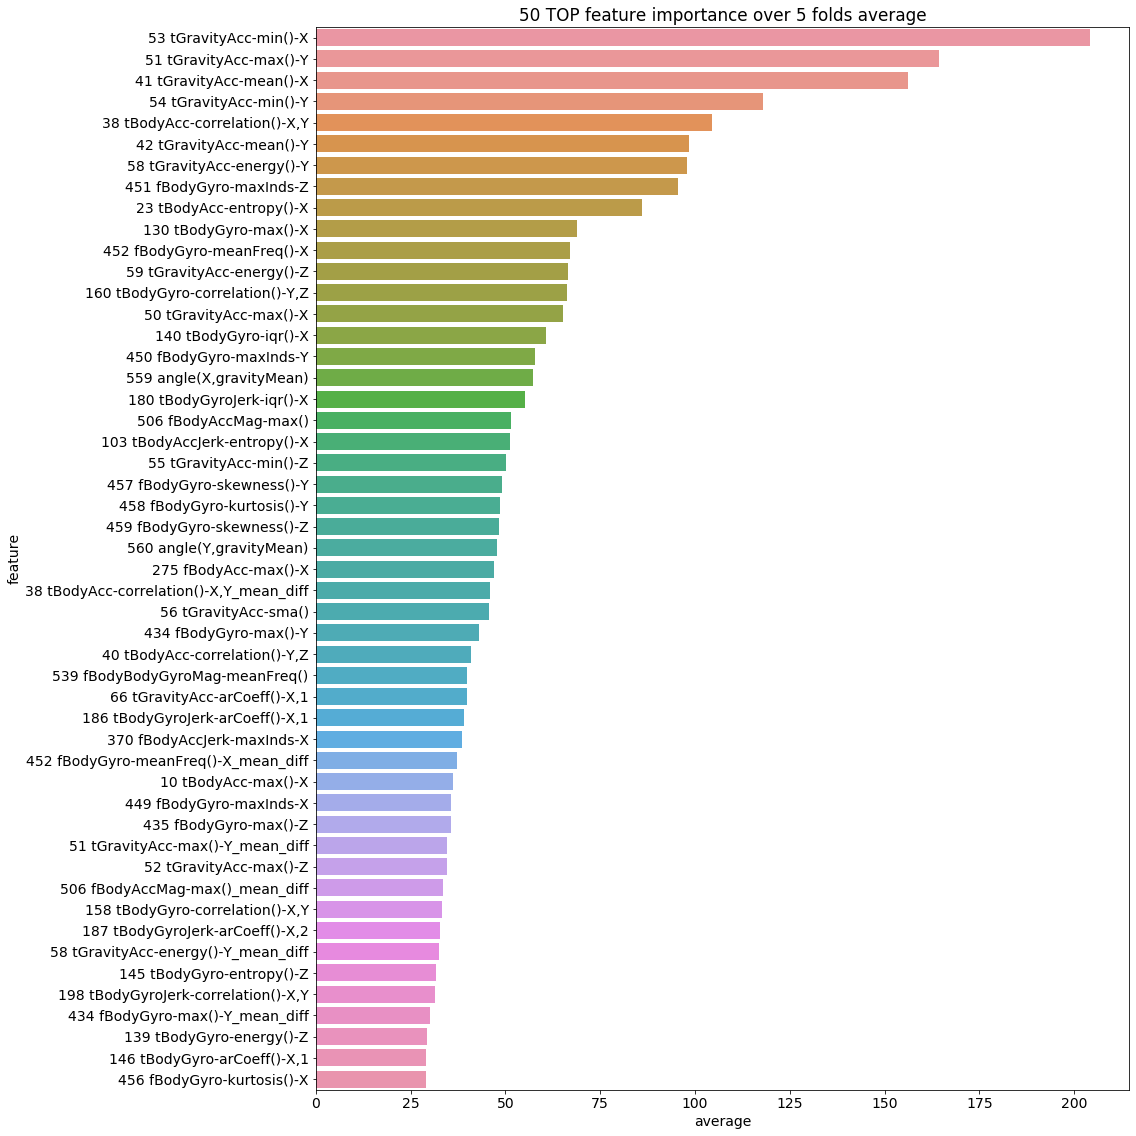

In [662]:
plt.rcParams['font.size'] = 14
feature_importance['average'] = feature_importance[[f'fold_{i + 1}' for i in range(kf.n_splits)]].mean(axis=1)
plt.figure(figsize=(16, 16))
sns.barplot(data=feature_importance.sort_values(by='average', ascending=False).head(50), x='average', y='feature')
plt.title(f'50 TOP feature importance over {kf.n_splits} folds average')
plt.tight_layout()
plt.savefig(f'FI_{score:.4f}.png', dpi=150)

# Construct model using all training data

In [650]:
clf.best_iteration

1689

In [651]:
clf_all = lgb.LGBMClassifier(**params, num_boost_round=int(np.floor(clf.best_iteration * 1.25)))
clf_all.fit(X, y)

/Users/numatakouhei/opt/anaconda3/envs/py3.7/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning:

Found `num_boost_round` in params. Will use it instead of argument



LGBMClassifier(bagging_fraction=0.838, bagging_freq=1, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0,
               feature_fraction=0.402094528450772, importance_type='split',
               lambda_l1=0.1, lambda_l2=0.3, learning_rate=0.01, max_depth=-1,
               metric='multi_logloss', min_child_samples=40,
               min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
               n_jobs=-1, num_boost_round=2111, num_class=6, num_leaves=228,
               objective='multiclass', random_state=86, reg_alpha=0.0,
               reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0, verbosity=-1)

In [652]:
y_pred_all = np.argmax(clf_all.predict_proba(X_test), axis=1) + 1
np.savetxt(f'./pred/LGBM_{score:.5f}.txt', y_pred_all)

In [653]:
y_pred_all

array([1, 4, 5, ..., 3, 4, 2])

# XGB

## Hyper parameters tuning

In [208]:
def objective_xgb(trial):
    x_score = []
    final_cv_train = np.zeros(X.shape[0])
    cv_train = np.zeros(X.shape[0])
    
    params = {
        'objective': 'multi:softmax',
        'eval_metric': 'merror',
        'num_class': 6,
        'booster': 'gbtree',
        'random_state': seed,
        'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.2),
        'gamma': trial.suggest_uniform('gamma', 0.0, 10),
        'max_depth': trial.suggest_int('max_depth', 5, 10),
        'subsample': trial.suggest_uniform('subsample', 0.4, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.4, 1.0),
        'min_child_weight': trial.suggest_uniform('min_child_weight', 1, 10),
        'alpha': trial.suggest_uniform('alpha', 0.0, 1.0),
    }
    
    fold_scores = []
    
    for i, (train_index, valid_index) in enumerate(kf.split(X, y, groups)):
        print(f'Fold {i}...')
        X_train = X.iloc[train_index]
        y_train = y[train_index]
        X_valid = X.iloc[valid_index]
        y_valid = y[valid_index]
    
        train_data = xgb.DMatrix(X_train, label=y_train)
        valid_data = xgb.DMatrix(X_valid, label=y_valid)
        clf = xgb.train(params, train_data, 1000, evals=[(train_data, 'train'), (valid_data, 'valid')], verbose_eval=100, early_stopping_rounds=20)
        preds_p = clf.predict(valid_data, ntree_limit=clf.best_ntree_limit)
        cv_train[valid_index] += preds_p

        score = accuracy_score(y_valid, cv_train[valid_index])
        fold_scores.append(score)
        
    final_cv_train += cv_train
    print(f'cv score: {np.mean(fold_scores)}')
    
    x_score.append(accuracy_score(y, cv_train))
    return 1.0 - x_score[0]

In [209]:
study_xgb = optuna.create_study()
study_xgb.optimize(objective_xgb, n_trials=100)
print(f'Number of finished trials: {len(study_xgb.trials)}')
print('Best trials: ')
trial_xgb = study_xgb.best_trial
print(f'Value: {trial_xgb.value}')
print('Params: ')

Fold 0...
[0]	train-merror:0.034712	valid-merror:0.140472
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[22]	train-merror:0.005416	valid-merror:0.088409

Fold 1...
[0]	train-merror:0.046317	valid-merror:0.143976
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[25]	train-merror:0.005666	valid-merror:0.062684

Fold 2...
[0]	train-merror:0.045253	valid-merror:0.142012
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[30]	train-merror:0.004673	valid-merror:0.059172

Fold 3...
[0]	train-merror:0.045756	valid-merror:0.182266
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will

[I 2020-02-04 23:02:40,822] Finished trial#0 resulted in value: 0.09251968503937003. Current best value is 0.09251968503937003 with parameters: {'learning_rate': 0.18304339712176182, 'gamma': 6.009178844979941, 'max_depth': 8, 'subsample': 0.602506009941652, 'colsample_bytree': 0.9992665384262946, 'min_child_weight': 2.0958868794815815, 'alpha': 0.011012847841324391}.


Fold 0...
[0]	train-merror:0.031019	valid-merror:0.187623
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[36]	train-merror:0.004677	valid-merror:0.091356

Fold 1...
[0]	train-merror:0.034491	valid-merror:0.132223
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[47]	train-merror:0.004681	valid-merror:0.046033

Fold 2...
[0]	train-merror:0.030743	valid-merror:0.154832
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[43]	train-merror:0.005411	valid-merror:0.068047

Fold 3...
[0]	train-merror:0.026568	valid-merror:0.199015
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will

[I 2020-02-04 23:06:36,410] Finished trial#1 resulted in value: 0.09429133858267713. Current best value is 0.09251968503937003 with parameters: {'learning_rate': 0.18304339712176182, 'gamma': 6.009178844979941, 'max_depth': 8, 'subsample': 0.602506009941652, 'colsample_bytree': 0.9992665384262946, 'min_child_weight': 2.0958868794815815, 'alpha': 0.011012847841324391}.


Fold 0...
[0]	train-merror:0.027819	valid-merror:0.154224
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[32]	train-merror:0.005908	valid-merror:0.100196

Fold 1...
[0]	train-merror:0.033506	valid-merror:0.116552
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[48]	train-merror:0.00271	valid-merror:0.047013

Fold 2...
[0]	train-merror:0.038613	valid-merror:0.163708
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[47]	train-merror:0.003689	valid-merror:0.07002

Fold 3...
[0]	train-merror:0.031242	valid-merror:0.173399
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will t

[I 2020-02-04 23:11:45,372] Finished trial#2 resulted in value: 0.08956692913385822. Current best value is 0.08956692913385822 with parameters: {'learning_rate': 0.036203240999373484, 'gamma': 0.8146599941189381, 'max_depth': 7, 'subsample': 0.8225079072115506, 'colsample_bytree': 0.6920615627037057, 'min_child_weight': 6.518647387065486, 'alpha': 0.3318625991015709}.


Fold 0...
[0]	train-merror:0.04776	valid-merror:0.162083
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
[100]	train-merror:0.002462	valid-merror:0.081532
Stopping. Best iteration:
[86]	train-merror:0.002462	valid-merror:0.078585

Fold 1...
[0]	train-merror:0.058881	valid-merror:0.125367
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
[100]	train-merror:0.003695	valid-merror:0.031342
Stopping. Best iteration:
[91]	train-merror:0.003942	valid-merror:0.029383

Fold 2...
[0]	train-merror:0.053615	valid-merror:0.134122
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
[100]	train-merror:0.003935	valid-merror:0.067061
Stopping. Best iteration:
[81]	train-merror:0.003935	valid-merror:0.065089

Fo

[I 2020-02-04 23:15:46,163] Finished trial#3 resulted in value: 0.08051181102362204. Current best value is 0.08051181102362204 with parameters: {'learning_rate': 0.0641812250063888, 'gamma': 3.9530074714657095, 'max_depth': 7, 'subsample': 0.5517035013647082, 'colsample_bytree': 0.508726075452743, 'min_child_weight': 6.1962661401232335, 'alpha': 0.4390160409087652}.


Fold 0...
[0]	train-merror:0.038651	valid-merror:0.141454
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
[100]	train-merror:0.004677	valid-merror:0.079568
Stopping. Best iteration:
[89]	train-merror:0.004924	valid-merror:0.077603

Fold 1...
[0]	train-merror:0.05494	valid-merror:0.116552
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[30]	train-merror:0.009608	valid-merror:0.048972

Fold 2...
[0]	train-merror:0.049926	valid-merror:0.163708
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[63]	train-merror:0.008116	valid-merror:0.076923

Fold 3...
[0]	train-merror:0.04182	valid-merror:0.170443
Multiple eval metrics have been passed: 'vali

[I 2020-02-04 23:20:33,495] Finished trial#4 resulted in value: 0.09114173228346456. Current best value is 0.08051181102362204 with parameters: {'learning_rate': 0.0641812250063888, 'gamma': 3.9530074714657095, 'max_depth': 7, 'subsample': 0.5517035013647082, 'colsample_bytree': 0.508726075452743, 'min_child_weight': 6.1962661401232335, 'alpha': 0.4390160409087652}.


Fold 0...
[0]	train-merror:0.023141	valid-merror:0.152259
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[27]	train-merror:0.000739	valid-merror:0.082515

Fold 1...
[0]	train-merror:0.034245	valid-merror:0.107738
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[33]	train-merror:0.000493	valid-merror:0.043095

Fold 2...
[0]	train-merror:0.033448	valid-merror:0.167653
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[58]	train-merror:0	valid-merror:0.068047

Fold 3...
[0]	train-merror:0.035916	valid-merror:0.188177
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train 

[I 2020-02-04 23:23:04,142] Finished trial#5 resulted in value: 0.08759842519685035. Current best value is 0.08051181102362204 with parameters: {'learning_rate': 0.0641812250063888, 'gamma': 3.9530074714657095, 'max_depth': 7, 'subsample': 0.5517035013647082, 'colsample_bytree': 0.508726075452743, 'min_child_weight': 6.1962661401232335, 'alpha': 0.4390160409087652}.


Fold 0...
[0]	train-merror:0.039389	valid-merror:0.166012
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[47]	train-merror:0.008124	valid-merror:0.082515

Fold 1...
[0]	train-merror:0.054693	valid-merror:0.136141
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[48]	train-merror:0.010101	valid-merror:0.055828

Fold 2...
[0]	train-merror:0.048697	valid-merror:0.163708
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[45]	train-merror:0.008362	valid-merror:0.07002

Fold 3...
[0]	train-merror:0.053383	valid-merror:0.176355
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will 

[I 2020-02-04 23:25:41,157] Finished trial#6 resulted in value: 0.09468503937007877. Current best value is 0.08051181102362204 with parameters: {'learning_rate': 0.0641812250063888, 'gamma': 3.9530074714657095, 'max_depth': 7, 'subsample': 0.5517035013647082, 'colsample_bytree': 0.508726075452743, 'min_child_weight': 6.1962661401232335, 'alpha': 0.4390160409087652}.


Fold 0...
[0]	train-merror:0.028557	valid-merror:0.143418
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[28]	train-merror:0.003939	valid-merror:0.083497

Fold 1...
[0]	train-merror:0.038926	valid-merror:0.113614
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[33]	train-merror:0.002464	valid-merror:0.041136

Fold 2...
[0]	train-merror:0.031235	valid-merror:0.130178
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[35]	train-merror:0.002705	valid-merror:0.059172

Fold 3...
[0]	train-merror:0.03813	valid-merror:0.2
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train

[I 2020-02-04 23:29:57,381] Finished trial#7 resulted in value: 0.08897637795275593. Current best value is 0.08051181102362204 with parameters: {'learning_rate': 0.0641812250063888, 'gamma': 3.9530074714657095, 'max_depth': 7, 'subsample': 0.5517035013647082, 'colsample_bytree': 0.508726075452743, 'min_child_weight': 6.1962661401232335, 'alpha': 0.4390160409087652}.


Fold 0...
[0]	train-merror:0.044313	valid-merror:0.167976
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[36]	train-merror:0.010094	valid-merror:0.078585

Fold 1...
[0]	train-merror:0.06307	valid-merror:0.122429
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[50]	train-merror:0.00813	valid-merror:0.038198

Fold 2...
[0]	train-merror:0.062223	valid-merror:0.167653
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[49]	train-merror:0.007132	valid-merror:0.06213

Fold 3...
[0]	train-merror:0.064945	valid-merror:0.160591
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will tr

[I 2020-02-04 23:32:33,565] Finished trial#8 resulted in value: 0.08779527559055122. Current best value is 0.08051181102362204 with parameters: {'learning_rate': 0.0641812250063888, 'gamma': 3.9530074714657095, 'max_depth': 7, 'subsample': 0.5517035013647082, 'colsample_bytree': 0.508726075452743, 'min_child_weight': 6.1962661401232335, 'alpha': 0.4390160409087652}.


Fold 0...
[0]	train-merror:0.056376	valid-merror:0.124754
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[62]	train-merror:0.004924	valid-merror:0.084479

Fold 1...
[0]	train-merror:0.050505	valid-merror:0.106758
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[53]	train-merror:0.006652	valid-merror:0.041136

Fold 2...
[0]	train-merror:0.047713	valid-merror:0.14497
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[33]	train-merror:0.007378	valid-merror:0.071992

Fold 3...
[0]	train-merror:0.056089	valid-merror:0.178325
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will 

[I 2020-02-04 23:35:58,813] Finished trial#9 resulted in value: 0.08740157480314958. Current best value is 0.08051181102362204 with parameters: {'learning_rate': 0.0641812250063888, 'gamma': 3.9530074714657095, 'max_depth': 7, 'subsample': 0.5517035013647082, 'colsample_bytree': 0.508726075452743, 'min_child_weight': 6.1962661401232335, 'alpha': 0.4390160409087652}.


Fold 0...
[0]	train-merror:0.071393	valid-merror:0.142436
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[63]	train-merror:0.006401	valid-merror:0.084479

Fold 1...
[0]	train-merror:0.08746	valid-merror:0.144956
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[78]	train-merror:0.008376	valid-merror:0.038198

Fold 2...
[0]	train-merror:0.073537	valid-merror:0.16568
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
[100]	train-merror:0.006886	valid-merror:0.061144
Stopping. Best iteration:
[89]	train-merror:0.006886	valid-merror:0.061144

Fold 3...
[0]	train-merror:0.075523	valid-merror:0.155665
Multiple eval metrics have been passed: 'vali

[I 2020-02-04 23:39:38,980] Finished trial#10 resulted in value: 0.08287401574803155. Current best value is 0.08051181102362204 with parameters: {'learning_rate': 0.0641812250063888, 'gamma': 3.9530074714657095, 'max_depth': 7, 'subsample': 0.5517035013647082, 'colsample_bytree': 0.508726075452743, 'min_child_weight': 6.1962661401232335, 'alpha': 0.4390160409087652}.


Fold 0...
[0]	train-merror:0.07804	valid-merror:0.147348
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[61]	train-merror:0.006893	valid-merror:0.08055

Fold 1...
[0]	train-merror:0.081547	valid-merror:0.156709
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[45]	train-merror:0.014536	valid-merror:0.046033

Fold 2...
[0]	train-merror:0.083374	valid-merror:0.175542
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
[100]	train-merror:0.005411	valid-merror:0.064103
Stopping. Best iteration:
[85]	train-merror:0.006149	valid-merror:0.064103

Fold 3...
[0]	train-merror:0.082657	valid-merror:0.197044
Multiple eval metrics have been passed: 'vali

[I 2020-02-04 23:42:39,227] Finished trial#11 resulted in value: 0.08740157480314958. Current best value is 0.08051181102362204 with parameters: {'learning_rate': 0.0641812250063888, 'gamma': 3.9530074714657095, 'max_depth': 7, 'subsample': 0.5517035013647082, 'colsample_bytree': 0.508726075452743, 'min_child_weight': 6.1962661401232335, 'alpha': 0.4390160409087652}.


Fold 0...
[0]	train-merror:0.072871	valid-merror:0.141454
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[72]	train-merror:0.007632	valid-merror:0.077603

Fold 1...
[0]	train-merror:0.083518	valid-merror:0.128306
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
[100]	train-merror:0.009362	valid-merror:0.03526
Stopping. Best iteration:
[94]	train-merror:0.009116	valid-merror:0.03526

Fold 2...
[0]	train-merror:0.082882	valid-merror:0.175542
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[56]	train-merror:0.012051	valid-merror:0.059172

Fold 3...
[0]	train-merror:0.085117	valid-merror:0.206897
Multiple eval metrics have been passed: 'vali

[I 2020-02-04 23:46:22,903] Finished trial#12 resulted in value: 0.08031496062992127. Current best value is 0.08031496062992127 with parameters: {'learning_rate': 0.06878110620614455, 'gamma': 4.110183637925738, 'max_depth': 6, 'subsample': 0.4049251321219061, 'colsample_bytree': 0.8148635633696326, 'min_child_weight': 9.898228677389389, 'alpha': 0.5737170384922962}.


Fold 0...
[0]	train-merror:0.062038	valid-merror:0.172888
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[12]	train-merror:0.017971	valid-merror:0.104126

Fold 1...
[0]	train-merror:0.065287	valid-merror:0.112635
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[78]	train-merror:0.016507	valid-merror:0.043095

Fold 2...
[0]	train-merror:0.054353	valid-merror:0.154832
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[16]	train-merror:0.020413	valid-merror:0.085799

Fold 3...
[0]	train-merror:0.059779	valid-merror:0.173399
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will

[I 2020-02-04 23:48:54,275] Finished trial#13 resulted in value: 0.10374015748031495. Current best value is 0.08031496062992127 with parameters: {'learning_rate': 0.06878110620614455, 'gamma': 4.110183637925738, 'max_depth': 6, 'subsample': 0.4049251321219061, 'colsample_bytree': 0.8148635633696326, 'min_child_weight': 9.898228677389389, 'alpha': 0.5737170384922962}.


Fold 0...
[0]	train-merror:0.05613	valid-merror:0.154224
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[63]	train-merror:0.002462	valid-merror:0.082515

Fold 1...
[0]	train-merror:0.054201	valid-merror:0.117532
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
[100]	train-merror:0.002217	valid-merror:0.027424
Stopping. Best iteration:
[121]	train-merror:0.001971	valid-merror:0.025465

Fold 2...
[0]	train-merror:0.058042	valid-merror:0.129191
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
[100]	train-merror:0.002213	valid-merror:0.064103
Stopping. Best iteration:
[131]	train-merror:0.001722	valid-merror:0.058185

Fold 3...
[0]	train-merror:0.054859	valid-merror:0

[I 2020-02-04 23:53:04,475] Finished trial#14 resulted in value: 0.07992125984251963. Current best value is 0.07992125984251963 with parameters: {'learning_rate': 0.05893593726027863, 'gamma': 2.1939982003827856, 'max_depth': 6, 'subsample': 0.47727484409379495, 'colsample_bytree': 0.6385470516018382, 'min_child_weight': 4.624271977054673, 'alpha': 0.5273637257831367}.


Fold 0...
[0]	train-merror:0.062285	valid-merror:0.139489
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[18]	train-merror:0.015263	valid-merror:0.098232

Fold 1...
[0]	train-merror:0.062577	valid-merror:0.122429
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
[100]	train-merror:0.012072	valid-merror:0.041136
[200]	train-merror:0.006652	valid-merror:0.03428
Stopping. Best iteration:
[184]	train-merror:0.006898	valid-merror:0.032321

Fold 2...
[0]	train-merror:0.059764	valid-merror:0.147929
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
[100]	train-merror:0.010821	valid-merror:0.077909
Stopping. Best iteration:
[110]	train-merror:0.009838	valid-merror:0.074951



[I 2020-02-04 23:57:09,874] Finished trial#15 resulted in value: 0.09448818897637801. Current best value is 0.07992125984251963 with parameters: {'learning_rate': 0.05893593726027863, 'gamma': 2.1939982003827856, 'max_depth': 6, 'subsample': 0.47727484409379495, 'colsample_bytree': 0.6385470516018382, 'min_child_weight': 4.624271977054673, 'alpha': 0.5273637257831367}.


Fold 0...
[0]	train-merror:0.032004	valid-merror:0.153242
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[51]	train-merror:0.000246	valid-merror:0.078585

Fold 1...
[0]	train-merror:0.044592	valid-merror:0.149853
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[41]	train-merror:0.001971	valid-merror:0.036239

Fold 2...
[0]	train-merror:0.035416	valid-merror:0.139053
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[50]	train-merror:0.000492	valid-merror:0.06213

Fold 3...
[0]	train-merror:0.039606	valid-merror:0.17734
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will t

[I 2020-02-05 00:01:10,592] Finished trial#16 resulted in value: 0.08326771653543308. Current best value is 0.07992125984251963 with parameters: {'learning_rate': 0.05893593726027863, 'gamma': 2.1939982003827856, 'max_depth': 6, 'subsample': 0.47727484409379495, 'colsample_bytree': 0.6385470516018382, 'min_child_weight': 4.624271977054673, 'alpha': 0.5273637257831367}.


Fold 0...
[0]	train-merror:0.063269	valid-merror:0.131631
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[29]	train-merror:0.009847	valid-merror:0.090373

Fold 1...
[0]	train-merror:0.073171	valid-merror:0.142997
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[67]	train-merror:0.006898	valid-merror:0.031342

Fold 2...
[0]	train-merror:0.063207	valid-merror:0.140039
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[25]	train-merror:0.010821	valid-merror:0.066075

Fold 3...
[0]	train-merror:0.061009	valid-merror:0.195074
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will

[I 2020-02-05 00:04:27,545] Finished trial#17 resulted in value: 0.08366141732283461. Current best value is 0.07992125984251963 with parameters: {'learning_rate': 0.05893593726027863, 'gamma': 2.1939982003827856, 'max_depth': 6, 'subsample': 0.47727484409379495, 'colsample_bytree': 0.6385470516018382, 'min_child_weight': 4.624271977054673, 'alpha': 0.5273637257831367}.


Fold 0...
[0]	train-merror:0.064254	valid-merror:0.140472
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[78]	train-merror:0.000492	valid-merror:0.081532

Fold 1...
[0]	train-merror:0.06578	valid-merror:0.113614
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[67]	train-merror:0.002464	valid-merror:0.026445

Fold 2...
[0]	train-merror:0.072307	valid-merror:0.16568
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
[100]	train-merror:0.000492	valid-merror:0.061144
Stopping. Best iteration:
[81]	train-merror:0.000984	valid-merror:0.061144

Fold 3...
[0]	train-merror:0.064945	valid-merror:0.186207
Multiple eval metrics have been passed: 'vali

[I 2020-02-05 00:07:55,757] Finished trial#18 resulted in value: 0.07637795275590553. Current best value is 0.07637795275590553 with parameters: {'learning_rate': 0.09415046554469038, 'gamma': 1.601526226255003, 'max_depth': 6, 'subsample': 0.4650293576245744, 'colsample_bytree': 0.7647742802347263, 'min_child_weight': 7.771906473873045, 'alpha': 0.40269835015086136}.


Fold 0...
[0]	train-merror:0.062038	valid-merror:0.137525
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[68]	train-merror:0.000492	valid-merror:0.072692

Fold 1...
[0]	train-merror:0.064794	valid-merror:0.118511
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
[100]	train-merror:0.000493	valid-merror:0.021548
Stopping. Best iteration:
[106]	train-merror:0.000493	valid-merror:0.019589

Fold 2...
[0]	train-merror:0.066896	valid-merror:0.123274
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
[100]	train-merror:0	valid-merror:0.057199
Stopping. Best iteration:
[86]	train-merror:0.000246	valid-merror:0.052268

Fold 3...
[0]	train-merror:0.060517	valid-merror:0.197044

[I 2020-02-05 00:11:47,684] Finished trial#19 resulted in value: 0.07145669291338586. Current best value is 0.07145669291338586 with parameters: {'learning_rate': 0.09195305446300865, 'gamma': 0.010518707043527309, 'max_depth': 5, 'subsample': 0.47815402935376056, 'colsample_bytree': 0.7383165946012261, 'min_child_weight': 7.878401265606889, 'alpha': 0.3932533305549237}.


Fold 0...
[0]	train-merror:0.052683	valid-merror:0.149312
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
[100]	train-merror:0	valid-merror:0.070727
Stopping. Best iteration:
[149]	train-merror:0	valid-merror:0.061886

Fold 1...
[0]	train-merror:0.065287	valid-merror:0.127326
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
[100]	train-merror:0	valid-merror:0.024486
Stopping. Best iteration:
[80]	train-merror:0	valid-merror:0.023506

Fold 2...
[0]	train-merror:0.056567	valid-merror:0.139053
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[59]	train-merror:0	valid-merror:0.058185

Fold 3...
[0]	train-merror:0.059533	valid-merror:0.206897
Multiple eval metrics have 

[I 2020-02-05 00:15:38,343] Finished trial#20 resulted in value: 0.06870078740157481. Current best value is 0.06870078740157481 with parameters: {'learning_rate': 0.12729383525511528, 'gamma': 0.08135249987952542, 'max_depth': 5, 'subsample': 0.5988093231059496, 'colsample_bytree': 0.7429834193490733, 'min_child_weight': 8.073456121421865, 'alpha': 0.3917098789569028}.


Fold 0...
[0]	train-merror:0.048252	valid-merror:0.154224
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[78]	train-merror:0	valid-merror:0.070727

Fold 1...
[0]	train-merror:0.066765	valid-merror:0.142018
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
[100]	train-merror:0	valid-merror:0.020568
Stopping. Best iteration:
[109]	train-merror:0	valid-merror:0.019589

Fold 2...
[0]	train-merror:0.053123	valid-merror:0.142998
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[54]	train-merror:0	valid-merror:0.058185

Fold 3...
[0]	train-merror:0.062485	valid-merror:0.205911
Multiple eval metrics have been passed: 'valid-merror' will be used fo

[I 2020-02-05 00:19:09,498] Finished trial#21 resulted in value: 0.06909448818897634. Current best value is 0.06870078740157481 with parameters: {'learning_rate': 0.12729383525511528, 'gamma': 0.08135249987952542, 'max_depth': 5, 'subsample': 0.5988093231059496, 'colsample_bytree': 0.7429834193490733, 'min_child_weight': 8.073456121421865, 'alpha': 0.3917098789569028}.


Fold 0...
[0]	train-merror:0.055391	valid-merror:0.154224
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
[100]	train-merror:0	valid-merror:0.063851
Stopping. Best iteration:
[116]	train-merror:0	valid-merror:0.060904

Fold 1...
[0]	train-merror:0.066272	valid-merror:0.12145
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[77]	train-merror:0	valid-merror:0.022527

Fold 2...
[0]	train-merror:0.054845	valid-merror:0.130178
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[75]	train-merror:0	valid-merror:0.058185

Fold 3...
[0]	train-merror:0.059041	valid-merror:0.189163
Multiple eval metrics have been passed: 'valid-merror' will be used for

[I 2020-02-05 00:23:11,406] Finished trial#22 resulted in value: 0.06712598425196847. Current best value is 0.06712598425196847 with parameters: {'learning_rate': 0.12951354370896356, 'gamma': 0.15016787844603272, 'max_depth': 5, 'subsample': 0.5904118862817052, 'colsample_bytree': 0.7338505085210324, 'min_child_weight': 8.626407181117493, 'alpha': 0.17393698195873616}.


Fold 0...
[0]	train-merror:0.054161	valid-merror:0.153242
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[77]	train-merror:0	valid-merror:0.068762

Fold 1...
[0]	train-merror:0.064794	valid-merror:0.127326
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[59]	train-merror:0.000739	valid-merror:0.024486

Fold 2...
[0]	train-merror:0.053861	valid-merror:0.135108
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[44]	train-merror:0	valid-merror:0.06213

Fold 3...
[0]	train-merror:0.059533	valid-merror:0.197044
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until va

[I 2020-02-05 00:26:34,424] Finished trial#23 resulted in value: 0.07027559055118116. Current best value is 0.06712598425196847 with parameters: {'learning_rate': 0.12951354370896356, 'gamma': 0.15016787844603272, 'max_depth': 5, 'subsample': 0.5904118862817052, 'colsample_bytree': 0.7338505085210324, 'min_child_weight': 8.626407181117493, 'alpha': 0.17393698195873616}.


Fold 0...
[0]	train-merror:0.039143	valid-merror:0.156189
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[55]	train-merror:0	valid-merror:0.077603

Fold 1...
[0]	train-merror:0.05765	valid-merror:0.113614
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[76]	train-merror:0.000739	valid-merror:0.030362

Fold 2...
[0]	train-merror:0.052878	valid-merror:0.161736
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[67]	train-merror:0	valid-merror:0.061144

Fold 3...
[0]	train-merror:0.055597	valid-merror:0.167488
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until va

[I 2020-02-05 00:29:53,514] Finished trial#24 resulted in value: 0.07578740157480313. Current best value is 0.06712598425196847 with parameters: {'learning_rate': 0.12951354370896356, 'gamma': 0.15016787844603272, 'max_depth': 5, 'subsample': 0.5904118862817052, 'colsample_bytree': 0.7338505085210324, 'min_child_weight': 8.626407181117493, 'alpha': 0.17393698195873616}.


Fold 0...
[0]	train-merror:0.048006	valid-merror:0.155206
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
[100]	train-merror:0	valid-merror:0.069745
Stopping. Best iteration:
[93]	train-merror:0	valid-merror:0.06778

Fold 1...
[0]	train-merror:0.065533	valid-merror:0.139079
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[54]	train-merror:0.000246	valid-merror:0.025465

Fold 2...
[0]	train-merror:0.054107	valid-merror:0.146943
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[63]	train-merror:0	valid-merror:0.054241

Fold 3...
[0]	train-merror:0.059533	valid-merror:0.172414
Multiple eval metrics have been passed: 'valid-merror' will be us

[I 2020-02-05 00:32:48,730] Finished trial#25 resulted in value: 0.06712598425196847. Current best value is 0.06712598425196847 with parameters: {'learning_rate': 0.12951354370896356, 'gamma': 0.15016787844603272, 'max_depth': 5, 'subsample': 0.5904118862817052, 'colsample_bytree': 0.7338505085210324, 'min_child_weight': 8.626407181117493, 'alpha': 0.17393698195873616}.


Fold 0...
[0]	train-merror:0.047514	valid-merror:0.179764
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[52]	train-merror:0	valid-merror:0.069745

Fold 1...
[0]	train-merror:0.064794	valid-merror:0.115573
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[44]	train-merror:0.000246	valid-merror:0.030362

Fold 2...
[0]	train-merror:0.048697	valid-merror:0.151874
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[41]	train-merror:0	valid-merror:0.058185

Fold 3...
[0]	train-merror:0.057073	valid-merror:0.160591
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until v

[I 2020-02-05 00:35:32,674] Finished trial#26 resulted in value: 0.07027559055118116. Current best value is 0.06712598425196847 with parameters: {'learning_rate': 0.12951354370896356, 'gamma': 0.15016787844603272, 'max_depth': 5, 'subsample': 0.5904118862817052, 'colsample_bytree': 0.7338505085210324, 'min_child_weight': 8.626407181117493, 'alpha': 0.17393698195873616}.


Fold 0...
[0]	train-merror:0.049729	valid-merror:0.117878
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[42]	train-merror:0.000739	valid-merror:0.069745

Fold 1...
[0]	train-merror:0.067997	valid-merror:0.125367
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[67]	train-merror:0.000493	valid-merror:0.020568

Fold 2...
[0]	train-merror:0.053615	valid-merror:0.134122
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[56]	train-merror:0.000246	valid-merror:0.059172

Fold 3...
[0]	train-merror:0.057319	valid-merror:0.206897
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will

[I 2020-02-05 00:38:01,138] Finished trial#27 resulted in value: 0.07125984251968509. Current best value is 0.06712598425196847 with parameters: {'learning_rate': 0.12951354370896356, 'gamma': 0.15016787844603272, 'max_depth': 5, 'subsample': 0.5904118862817052, 'colsample_bytree': 0.7338505085210324, 'min_child_weight': 8.626407181117493, 'alpha': 0.17393698195873616}.


Fold 0...
[0]	train-merror:0.03225	valid-merror:0.140472
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[27]	train-merror:0.000492	valid-merror:0.077603

Fold 1...
[0]	train-merror:0.048288	valid-merror:0.114594
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[67]	train-merror:0.000246	valid-merror:0.03526

Fold 2...
[0]	train-merror:0.047221	valid-merror:0.158777
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[51]	train-merror:0	valid-merror:0.056213

Fold 3...
[0]	train-merror:0.04428	valid-merror:0.194089
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train unt

[I 2020-02-05 00:40:53,956] Finished trial#28 resulted in value: 0.07637795275590553. Current best value is 0.06712598425196847 with parameters: {'learning_rate': 0.12951354370896356, 'gamma': 0.15016787844603272, 'max_depth': 5, 'subsample': 0.5904118862817052, 'colsample_bytree': 0.7338505085210324, 'min_child_weight': 8.626407181117493, 'alpha': 0.17393698195873616}.


Fold 0...
[0]	train-merror:0.046775	valid-merror:0.158153
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[30]	train-merror:0.001231	valid-merror:0.081532

Fold 1...
[0]	train-merror:0.065041	valid-merror:0.123408
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[69]	train-merror:0.001725	valid-merror:0.028404

Fold 2...
[0]	train-merror:0.046237	valid-merror:0.147929
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[36]	train-merror:0.000984	valid-merror:0.067061

Fold 3...
[0]	train-merror:0.057565	valid-merror:0.166502
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will

[I 2020-02-05 00:43:50,494] Finished trial#29 resulted in value: 0.07933070866141734. Current best value is 0.06712598425196847 with parameters: {'learning_rate': 0.12951354370896356, 'gamma': 0.15016787844603272, 'max_depth': 5, 'subsample': 0.5904118862817052, 'colsample_bytree': 0.7338505085210324, 'min_child_weight': 8.626407181117493, 'alpha': 0.17393698195873616}.


Fold 0...
[0]	train-merror:0.058346	valid-merror:0.150295
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[59]	train-merror:0	valid-merror:0.075639

Fold 1...
[0]	train-merror:0.070953	valid-merror:0.135162
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[59]	train-merror:0	valid-merror:0.025465

Fold 2...
[0]	train-merror:0.066404	valid-merror:0.131164
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[26]	train-merror:0.001722	valid-merror:0.064103

Fold 3...
[0]	train-merror:0.063715	valid-merror:0.149754
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until v

[I 2020-02-05 00:46:53,322] Finished trial#30 resulted in value: 0.07145669291338586. Current best value is 0.06712598425196847 with parameters: {'learning_rate': 0.12951354370896356, 'gamma': 0.15016787844603272, 'max_depth': 5, 'subsample': 0.5904118862817052, 'colsample_bytree': 0.7338505085210324, 'min_child_weight': 8.626407181117493, 'alpha': 0.17393698195873616}.


Fold 0...
[0]	train-merror:0.052683	valid-merror:0.154224
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[78]	train-merror:0	valid-merror:0.072692

Fold 1...
[0]	train-merror:0.06578	valid-merror:0.129285
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[76]	train-merror:0	valid-merror:0.024486

Fold 2...
[0]	train-merror:0.05214	valid-merror:0.145957
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[69]	train-merror:0	valid-merror:0.056213

Fold 3...
[0]	train-merror:0.058057	valid-merror:0.187192
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merr

[I 2020-02-05 00:50:42,295] Finished trial#31 resulted in value: 0.06929133858267722. Current best value is 0.06712598425196847 with parameters: {'learning_rate': 0.12951354370896356, 'gamma': 0.15016787844603272, 'max_depth': 5, 'subsample': 0.5904118862817052, 'colsample_bytree': 0.7338505085210324, 'min_child_weight': 8.626407181117493, 'alpha': 0.17393698195873616}.


Fold 0...
[0]	train-merror:0.046036	valid-merror:0.153242
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[55]	train-merror:0	valid-merror:0.071709

Fold 1...
[0]	train-merror:0.065041	valid-merror:0.132223
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
[100]	train-merror:0	valid-merror:0.027424
Stopping. Best iteration:
[106]	train-merror:0	valid-merror:0.025465

Fold 2...
[0]	train-merror:0.051402	valid-merror:0.146943
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[76]	train-merror:0	valid-merror:0.056213

Fold 3...
[0]	train-merror:0.059287	valid-merror:0.203941
Multiple eval metrics have been passed: 'valid-merror' will be used fo

[I 2020-02-05 00:54:25,204] Finished trial#32 resulted in value: 0.07185039370078738. Current best value is 0.06712598425196847 with parameters: {'learning_rate': 0.12951354370896356, 'gamma': 0.15016787844603272, 'max_depth': 5, 'subsample': 0.5904118862817052, 'colsample_bytree': 0.7338505085210324, 'min_child_weight': 8.626407181117493, 'alpha': 0.17393698195873616}.


Fold 0...
[0]	train-merror:0.040374	valid-merror:0.155206
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[67]	train-merror:0	valid-merror:0.071709

Fold 1...
[0]	train-merror:0.054447	valid-merror:0.114594
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[78]	train-merror:0	valid-merror:0.027424

Fold 2...
[0]	train-merror:0.051648	valid-merror:0.169625
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
[100]	train-merror:0	valid-merror:0.059172
Stopping. Best iteration:
[90]	train-merror:0	valid-merror:0.058185

Fold 3...
[0]	train-merror:0.046986	valid-merror:0.180296
Multiple eval metrics have been passed: 'valid-merror' will be used for

[I 2020-02-05 00:58:02,590] Finished trial#33 resulted in value: 0.07362204724409449. Current best value is 0.06712598425196847 with parameters: {'learning_rate': 0.12951354370896356, 'gamma': 0.15016787844603272, 'max_depth': 5, 'subsample': 0.5904118862817052, 'colsample_bytree': 0.7338505085210324, 'min_child_weight': 8.626407181117493, 'alpha': 0.17393698195873616}.


Fold 0...
[0]	train-merror:0.034466	valid-merror:0.156189
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
[100]	train-merror:0	valid-merror:0.069745
Stopping. Best iteration:
[115]	train-merror:0	valid-merror:0.06778

Fold 1...
[0]	train-merror:0.065041	valid-merror:0.130264
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[78]	train-merror:0	valid-merror:0.022527

Fold 2...
[0]	train-merror:0.048451	valid-merror:0.134122
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[52]	train-merror:0	valid-merror:0.054241

Fold 3...
[0]	train-merror:0.059041	valid-merror:0.20197
Multiple eval metrics have been passed: 'valid-merror' will be used for 

[I 2020-02-05 01:01:27,056] Finished trial#34 resulted in value: 0.06692913385826771. Current best value is 0.06692913385826771 with parameters: {'learning_rate': 0.1480966861211832, 'gamma': 0.06477705913317369, 'max_depth': 5, 'subsample': 0.6047164752508541, 'colsample_bytree': 0.6545384777907172, 'min_child_weight': 6.122988858865272, 'alpha': 0.4519764655349714}.


Fold 0...
[0]	train-merror:0.052437	valid-merror:0.157171
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[23]	train-merror:0.002708	valid-merror:0.078585

Fold 1...
[0]	train-merror:0.052969	valid-merror:0.111655
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[48]	train-merror:0.000985	valid-merror:0.025465

Fold 2...
[0]	train-merror:0.050172	valid-merror:0.107495
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
[100]	train-merror:0	valid-merror:0.060158
Stopping. Best iteration:
[80]	train-merror:0	valid-merror:0.058185

Fold 3...
[0]	train-merror:0.054121	valid-merror:0.191133
Multiple eval metrics have been passed: 'valid-merror' wi

[I 2020-02-05 01:04:01,757] Finished trial#35 resulted in value: 0.07637795275590553. Current best value is 0.06692913385826771 with parameters: {'learning_rate': 0.1480966861211832, 'gamma': 0.06477705913317369, 'max_depth': 5, 'subsample': 0.6047164752508541, 'colsample_bytree': 0.6545384777907172, 'min_child_weight': 6.122988858865272, 'alpha': 0.4519764655349714}.


Fold 0...
[0]	train-merror:0.028557	valid-merror:0.152259
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[39]	train-merror:0	valid-merror:0.081532

Fold 1...
[0]	train-merror:0.049766	valid-merror:0.118511
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
[100]	train-merror:0	valid-merror:0.026445
Stopping. Best iteration:
[84]	train-merror:0	valid-merror:0.024486

Fold 2...
[0]	train-merror:0.047959	valid-merror:0.176529
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[40]	train-merror:0.000246	valid-merror:0.059172

Fold 3...
[0]	train-merror:0.045264	valid-merror:0.160591
Multiple eval metrics have been passed: 'valid-merror' will be u

[I 2020-02-05 01:06:59,650] Finished trial#36 resulted in value: 0.07480314960629919. Current best value is 0.06692913385826771 with parameters: {'learning_rate': 0.1480966861211832, 'gamma': 0.06477705913317369, 'max_depth': 5, 'subsample': 0.6047164752508541, 'colsample_bytree': 0.6545384777907172, 'min_child_weight': 6.122988858865272, 'alpha': 0.4519764655349714}.


Fold 0...
[0]	train-merror:0.041113	valid-merror:0.163065
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[32]	train-merror:0.006401	valid-merror:0.077603

Fold 1...
[0]	train-merror:0.057896	valid-merror:0.125367
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[30]	train-merror:0.005913	valid-merror:0.056807

Fold 2...
[0]	train-merror:0.042302	valid-merror:0.146943
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[28]	train-merror:0.005411	valid-merror:0.060158

Fold 3...
[0]	train-merror:0.053383	valid-merror:0.176355
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will

[I 2020-02-05 01:09:25,230] Finished trial#37 resulted in value: 0.09055118110236215. Current best value is 0.06692913385826771 with parameters: {'learning_rate': 0.1480966861211832, 'gamma': 0.06477705913317369, 'max_depth': 5, 'subsample': 0.6047164752508541, 'colsample_bytree': 0.6545384777907172, 'min_child_weight': 6.122988858865272, 'alpha': 0.4519764655349714}.


Fold 0...
[0]	train-merror:0.056376	valid-merror:0.134578
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[21]	train-merror:0.003447	valid-merror:0.076621

Fold 1...
[0]	train-merror:0.063316	valid-merror:0.12145
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[75]	train-merror:0.000985	valid-merror:0.019589

Fold 2...
[0]	train-merror:0.065912	valid-merror:0.155819
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[46]	train-merror:0.000984	valid-merror:0.060158

Fold 3...
[0]	train-merror:0.059779	valid-merror:0.189163
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will 

[I 2020-02-05 01:11:21,606] Finished trial#38 resulted in value: 0.07204724409448815. Current best value is 0.06692913385826771 with parameters: {'learning_rate': 0.1480966861211832, 'gamma': 0.06477705913317369, 'max_depth': 5, 'subsample': 0.6047164752508541, 'colsample_bytree': 0.6545384777907172, 'min_child_weight': 6.122988858865272, 'alpha': 0.4519764655349714}.


Fold 0...
[0]	train-merror:0.029296	valid-merror:0.143418
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[37]	train-merror:0.000246	valid-merror:0.078585

Fold 1...
[0]	train-merror:0.04952	valid-merror:0.149853
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[44]	train-merror:0.001232	valid-merror:0.038198

Fold 2...
[0]	train-merror:0.036891	valid-merror:0.139053
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[35]	train-merror:0.000492	valid-merror:0.056213

Fold 3...
[0]	train-merror:0.043296	valid-merror:0.165517
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will 

[I 2020-02-05 01:13:55,463] Finished trial#39 resulted in value: 0.0783464566929134. Current best value is 0.06692913385826771 with parameters: {'learning_rate': 0.1480966861211832, 'gamma': 0.06477705913317369, 'max_depth': 5, 'subsample': 0.6047164752508541, 'colsample_bytree': 0.6545384777907172, 'min_child_weight': 6.122988858865272, 'alpha': 0.4519764655349714}.


Fold 0...
[0]	train-merror:0.044067	valid-merror:0.160118
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[70]	train-merror:0.000739	valid-merror:0.073674

Fold 1...
[0]	train-merror:0.051737	valid-merror:0.131244
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[57]	train-merror:0.000985	valid-merror:0.030362

Fold 2...
[0]	train-merror:0.054353	valid-merror:0.154832
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[68]	train-merror:0.000246	valid-merror:0.063116

Fold 3...
[0]	train-merror:0.042804	valid-merror:0.2
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will trai

[I 2020-02-05 01:17:26,686] Finished trial#40 resulted in value: 0.07736220472440947. Current best value is 0.06692913385826771 with parameters: {'learning_rate': 0.1480966861211832, 'gamma': 0.06477705913317369, 'max_depth': 5, 'subsample': 0.6047164752508541, 'colsample_bytree': 0.6545384777907172, 'min_child_weight': 6.122988858865272, 'alpha': 0.4519764655349714}.


Fold 0...
[0]	train-merror:0.044067	valid-merror:0.175835
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[32]	train-merror:0.002216	valid-merror:0.077603

Fold 1...
[0]	train-merror:0.065041	valid-merror:0.130264
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
[100]	train-merror:0	valid-merror:0.021548
Stopping. Best iteration:
[87]	train-merror:0	valid-merror:0.020568

Fold 2...
[0]	train-merror:0.055583	valid-merror:0.142012
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[79]	train-merror:0	valid-merror:0.055227

Fold 3...
[0]	train-merror:0.059041	valid-merror:0.205911
Multiple eval metrics have been passed: 'valid-merror' will be u

[I 2020-02-05 01:20:55,299] Finished trial#41 resulted in value: 0.07027559055118116. Current best value is 0.06692913385826771 with parameters: {'learning_rate': 0.1480966861211832, 'gamma': 0.06477705913317369, 'max_depth': 5, 'subsample': 0.6047164752508541, 'colsample_bytree': 0.6545384777907172, 'min_child_weight': 6.122988858865272, 'alpha': 0.4519764655349714}.


Fold 0...
[0]	train-merror:0.039636	valid-merror:0.182711
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[45]	train-merror:0	valid-merror:0.071709

Fold 1...
[0]	train-merror:0.058881	valid-merror:0.119491
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[49]	train-merror:0.000739	valid-merror:0.029383

Fold 2...
[0]	train-merror:0.045007	valid-merror:0.146943
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[54]	train-merror:0	valid-merror:0.052268

Fold 3...
[0]	train-merror:0.053629	valid-merror:0.192118
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until v

[I 2020-02-05 01:24:10,930] Finished trial#42 resulted in value: 0.07145669291338586. Current best value is 0.06692913385826771 with parameters: {'learning_rate': 0.1480966861211832, 'gamma': 0.06477705913317369, 'max_depth': 5, 'subsample': 0.6047164752508541, 'colsample_bytree': 0.6545384777907172, 'min_child_weight': 6.122988858865272, 'alpha': 0.4519764655349714}.


Fold 0...
[0]	train-merror:0.03225	valid-merror:0.150295
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[44]	train-merror:0.000246	valid-merror:0.076621

Fold 1...
[0]	train-merror:0.05765	valid-merror:0.12047
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[79]	train-merror:0.000246	valid-merror:0.025465

Fold 2...
[0]	train-merror:0.05214	valid-merror:0.148915
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[12]	train-merror:0.0091	valid-merror:0.07002

Fold 3...
[0]	train-merror:0.054367	valid-merror:0.159606
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train 

[I 2020-02-05 01:26:41,567] Finished trial#43 resulted in value: 0.07637795275590553. Current best value is 0.06692913385826771 with parameters: {'learning_rate': 0.1480966861211832, 'gamma': 0.06477705913317369, 'max_depth': 5, 'subsample': 0.6047164752508541, 'colsample_bytree': 0.6545384777907172, 'min_child_weight': 6.122988858865272, 'alpha': 0.4519764655349714}.


Fold 0...
[0]	train-merror:0.054653	valid-merror:0.152259
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[30]	train-merror:0.003693	valid-merror:0.074656

Fold 1...
[0]	train-merror:0.067012	valid-merror:0.116552
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[26]	train-merror:0.009116	valid-merror:0.03428

Fold 2...
[0]	train-merror:0.057059	valid-merror:0.137081
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[58]	train-merror:0.000246	valid-merror:0.059172

Fold 3...
[0]	train-merror:0.062485	valid-merror:0.174384
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will 

[I 2020-02-05 01:29:43,047] Finished trial#44 resulted in value: 0.07499999999999996. Current best value is 0.06692913385826771 with parameters: {'learning_rate': 0.1480966861211832, 'gamma': 0.06477705913317369, 'max_depth': 5, 'subsample': 0.6047164752508541, 'colsample_bytree': 0.6545384777907172, 'min_child_weight': 6.122988858865272, 'alpha': 0.4519764655349714}.


Fold 0...
[0]	train-merror:0.054899	valid-merror:0.139489
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[31]	train-merror:0.002708	valid-merror:0.079568

Fold 1...
[0]	train-merror:0.066026	valid-merror:0.139079
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[54]	train-merror:0.003695	valid-merror:0.032321

Fold 2...
[0]	train-merror:0.055829	valid-merror:0.138067
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[55]	train-merror:0.002213	valid-merror:0.058185

Fold 3...
[0]	train-merror:0.065683	valid-merror:0.205911
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will

[I 2020-02-05 01:32:39,925] Finished trial#45 resulted in value: 0.07992125984251963. Current best value is 0.06692913385826771 with parameters: {'learning_rate': 0.1480966861211832, 'gamma': 0.06477705913317369, 'max_depth': 5, 'subsample': 0.6047164752508541, 'colsample_bytree': 0.6545384777907172, 'min_child_weight': 6.122988858865272, 'alpha': 0.4519764655349714}.


Fold 0...
[0]	train-merror:0.047021	valid-merror:0.172888
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[55]	train-merror:0	valid-merror:0.071709

Fold 1...
[0]	train-merror:0.061345	valid-merror:0.101861
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
[100]	train-merror:0	valid-merror:0.024486
Stopping. Best iteration:
[129]	train-merror:0	valid-merror:0.019589

Fold 2...
[0]	train-merror:0.058042	valid-merror:0.149901
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
[100]	train-merror:0	valid-merror:0.059172
Stopping. Best iteration:
[122]	train-merror:0	valid-merror:0.056213

Fold 3...
[0]	train-merror:0.052645	valid-merror:0.171429
Multiple eval metrics have

[I 2020-02-05 01:36:58,380] Finished trial#46 resulted in value: 0.07204724409448815. Current best value is 0.06692913385826771 with parameters: {'learning_rate': 0.1480966861211832, 'gamma': 0.06477705913317369, 'max_depth': 5, 'subsample': 0.6047164752508541, 'colsample_bytree': 0.6545384777907172, 'min_child_weight': 6.122988858865272, 'alpha': 0.4519764655349714}.


Fold 0...
[0]	train-merror:0.055391	valid-merror:0.118861
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[20]	train-merror:0.012063	valid-merror:0.074656

Fold 1...
[0]	train-merror:0.075634	valid-merror:0.125367
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[35]	train-merror:0.011579	valid-merror:0.038198

Fold 2...
[0]	train-merror:0.069356	valid-merror:0.157791
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[48]	train-merror:0.0091	valid-merror:0.067061

Fold 3...
[0]	train-merror:0.078475	valid-merror:0.157635
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will t

[I 2020-02-05 01:38:47,330] Finished trial#47 resulted in value: 0.08503937007874018. Current best value is 0.06692913385826771 with parameters: {'learning_rate': 0.1480966861211832, 'gamma': 0.06477705913317369, 'max_depth': 5, 'subsample': 0.6047164752508541, 'colsample_bytree': 0.6545384777907172, 'min_child_weight': 6.122988858865272, 'alpha': 0.4519764655349714}.


Fold 0...
[0]	train-merror:0.028804	valid-merror:0.143418
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[39]	train-merror:0.000246	valid-merror:0.075639

Fold 1...
[0]	train-merror:0.047549	valid-merror:0.114594
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[47]	train-merror:0.000493	valid-merror:0.036239

Fold 2...
[0]	train-merror:0.042056	valid-merror:0.138067
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[44]	train-merror:0.000246	valid-merror:0.059172

Fold 3...
[0]	train-merror:0.04182	valid-merror:0.213793
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will 

[I 2020-02-05 01:41:42,376] Finished trial#48 resulted in value: 0.07972440944881887. Current best value is 0.06692913385826771 with parameters: {'learning_rate': 0.1480966861211832, 'gamma': 0.06477705913317369, 'max_depth': 5, 'subsample': 0.6047164752508541, 'colsample_bytree': 0.6545384777907172, 'min_child_weight': 6.122988858865272, 'alpha': 0.4519764655349714}.


Fold 0...
[0]	train-merror:0.055145	valid-merror:0.154224
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[27]	train-merror:0.014032	valid-merror:0.082515

Fold 1...
[0]	train-merror:0.073171	valid-merror:0.143976
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[30]	train-merror:0.017738	valid-merror:0.03526

Fold 2...
[0]	train-merror:0.063945	valid-merror:0.15286
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[48]	train-merror:0.012297	valid-merror:0.074951

Fold 3...
[0]	train-merror:0.064699	valid-merror:0.194089
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will t

[I 2020-02-05 01:44:16,908] Finished trial#49 resulted in value: 0.09173228346456697. Current best value is 0.06692913385826771 with parameters: {'learning_rate': 0.1480966861211832, 'gamma': 0.06477705913317369, 'max_depth': 5, 'subsample': 0.6047164752508541, 'colsample_bytree': 0.6545384777907172, 'min_child_weight': 6.122988858865272, 'alpha': 0.4519764655349714}.


Fold 0...
[0]	train-merror:0.038897	valid-merror:0.139489
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[38]	train-merror:0.000492	valid-merror:0.081532

Fold 1...
[0]	train-merror:0.055432	valid-merror:0.122429
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
[100]	train-merror:0.000246	valid-merror:0.023506
Stopping. Best iteration:
[85]	train-merror:0.000246	valid-merror:0.023506

Fold 2...
[0]	train-merror:0.045007	valid-merror:0.146943
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[43]	train-merror:0.000246	valid-merror:0.056213

Fold 3...
[0]	train-merror:0.04797	valid-merror:0.160591
Multiple eval metrics have been passed: 'val

[I 2020-02-05 01:47:30,384] Finished trial#50 resulted in value: 0.07204724409448815. Current best value is 0.06692913385826771 with parameters: {'learning_rate': 0.1480966861211832, 'gamma': 0.06477705913317369, 'max_depth': 5, 'subsample': 0.6047164752508541, 'colsample_bytree': 0.6545384777907172, 'min_child_weight': 6.122988858865272, 'alpha': 0.4519764655349714}.


Fold 0...
[0]	train-merror:0.044806	valid-merror:0.175835
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[78]	train-merror:0	valid-merror:0.069745

Fold 1...
[0]	train-merror:0.066026	valid-merror:0.130264
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[77]	train-merror:0.000493	valid-merror:0.018609

Fold 2...
[0]	train-merror:0.055583	valid-merror:0.142012
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[19]	train-merror:0.008854	valid-merror:0.069034

Fold 3...
[0]	train-merror:0.058795	valid-merror:0.205911
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train 

[I 2020-02-05 01:50:51,380] Finished trial#51 resulted in value: 0.06948818897637798. Current best value is 0.06692913385826771 with parameters: {'learning_rate': 0.1480966861211832, 'gamma': 0.06477705913317369, 'max_depth': 5, 'subsample': 0.6047164752508541, 'colsample_bytree': 0.6545384777907172, 'min_child_weight': 6.122988858865272, 'alpha': 0.4519764655349714}.


Fold 0...
[0]	train-merror:0.05933	valid-merror:0.14833
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[59]	train-merror:0.000492	valid-merror:0.073674

Fold 1...
[0]	train-merror:0.064548	valid-merror:0.112635
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[60]	train-merror:0.000739	valid-merror:0.021548

Fold 2...
[0]	train-merror:0.057059	valid-merror:0.129191
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
[100]	train-merror:0	valid-merror:0.055227
Stopping. Best iteration:
[82]	train-merror:0	valid-merror:0.053254

Fold 3...
[0]	train-merror:0.061993	valid-merror:0.181281
Multiple eval metrics have been passed: 'valid-merror' will

[I 2020-02-05 01:53:42,352] Finished trial#52 resulted in value: 0.07401574803149602. Current best value is 0.06692913385826771 with parameters: {'learning_rate': 0.1480966861211832, 'gamma': 0.06477705913317369, 'max_depth': 5, 'subsample': 0.6047164752508541, 'colsample_bytree': 0.6545384777907172, 'min_child_weight': 6.122988858865272, 'alpha': 0.4519764655349714}.


Fold 0...
[0]	train-merror:0.049975	valid-merror:0.138507
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[45]	train-merror:0.000739	valid-merror:0.075639

Fold 1...
[0]	train-merror:0.069229	valid-merror:0.130264
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
[100]	train-merror:0	valid-merror:0.01665
Stopping. Best iteration:
[102]	train-merror:0	valid-merror:0.015671

Fold 2...
[0]	train-merror:0.062469	valid-merror:0.139053
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[55]	train-merror:0	valid-merror:0.063116

Fold 3...
[0]	train-merror:0.061993	valid-merror:0.167488
Multiple eval metrics have been passed: 'valid-merror' will be u

[I 2020-02-05 01:56:46,312] Finished trial#53 resulted in value: 0.06909448818897634. Current best value is 0.06692913385826771 with parameters: {'learning_rate': 0.1480966861211832, 'gamma': 0.06477705913317369, 'max_depth': 5, 'subsample': 0.6047164752508541, 'colsample_bytree': 0.6545384777907172, 'min_child_weight': 6.122988858865272, 'alpha': 0.4519764655349714}.


Fold 0...
[0]	train-merror:0.056376	valid-merror:0.146365
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[78]	train-merror:0	valid-merror:0.068762

Fold 1...
[0]	train-merror:0.070214	valid-merror:0.129285
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[51]	train-merror:0.001232	valid-merror:0.019589

Fold 2...
[0]	train-merror:0.071815	valid-merror:0.156805
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[68]	train-merror:0	valid-merror:0.06213

Fold 3...
[0]	train-merror:0.063469	valid-merror:0.176355
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until va

[I 2020-02-05 01:59:53,642] Finished trial#54 resulted in value: 0.06751968503937011. Current best value is 0.06692913385826771 with parameters: {'learning_rate': 0.1480966861211832, 'gamma': 0.06477705913317369, 'max_depth': 5, 'subsample': 0.6047164752508541, 'colsample_bytree': 0.6545384777907172, 'min_child_weight': 6.122988858865272, 'alpha': 0.4519764655349714}.


Fold 0...
[0]	train-merror:0.050468	valid-merror:0.150295
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[57]	train-merror:0.001969	valid-merror:0.076621

Fold 1...
[0]	train-merror:0.068243	valid-merror:0.151812
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[49]	train-merror:0.003695	valid-merror:0.024486

Fold 2...
[0]	train-merror:0.070831	valid-merror:0.146943
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[58]	train-merror:0.002213	valid-merror:0.063116

Fold 3...
[0]	train-merror:0.068881	valid-merror:0.183251
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will

[I 2020-02-05 02:02:43,709] Finished trial#55 resulted in value: 0.07598425196850389. Current best value is 0.06692913385826771 with parameters: {'learning_rate': 0.1480966861211832, 'gamma': 0.06477705913317369, 'max_depth': 5, 'subsample': 0.6047164752508541, 'colsample_bytree': 0.6545384777907172, 'min_child_weight': 6.122988858865272, 'alpha': 0.4519764655349714}.


Fold 0...
[0]	train-merror:0.070655	valid-merror:0.144401
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[65]	train-merror:0.000246	valid-merror:0.071709

Fold 1...
[0]	train-merror:0.074403	valid-merror:0.136141
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[62]	train-merror:0.001232	valid-merror:0.024486

Fold 2...
[0]	train-merror:0.067634	valid-merror:0.176529
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[48]	train-merror:0.001476	valid-merror:0.060158

Fold 3...
[0]	train-merror:0.065191	valid-merror:0.173399
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will

[I 2020-02-05 02:05:15,450] Finished trial#56 resulted in value: 0.07185039370078738. Current best value is 0.06692913385826771 with parameters: {'learning_rate': 0.1480966861211832, 'gamma': 0.06477705913317369, 'max_depth': 5, 'subsample': 0.6047164752508541, 'colsample_bytree': 0.6545384777907172, 'min_child_weight': 6.122988858865272, 'alpha': 0.4519764655349714}.


Fold 0...
[0]	train-merror:0.075579	valid-merror:0.163065
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[33]	train-merror:0.007386	valid-merror:0.079568

Fold 1...
[0]	train-merror:0.085243	valid-merror:0.151812
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[40]	train-merror:0.012318	valid-merror:0.027424

Fold 2...
[0]	train-merror:0.073291	valid-merror:0.154832
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[30]	train-merror:0.011067	valid-merror:0.067061

Fold 3...
[0]	train-merror:0.075031	valid-merror:0.174384
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will

[I 2020-02-05 02:07:31,632] Finished trial#57 resulted in value: 0.08169291338582674. Current best value is 0.06692913385826771 with parameters: {'learning_rate': 0.1480966861211832, 'gamma': 0.06477705913317369, 'max_depth': 5, 'subsample': 0.6047164752508541, 'colsample_bytree': 0.6545384777907172, 'min_child_weight': 6.122988858865272, 'alpha': 0.4519764655349714}.


Fold 0...
[0]	train-merror:0.065485	valid-merror:0.134578
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[34]	train-merror:0.001477	valid-merror:0.070727

Fold 1...
[0]	train-merror:0.06307	valid-merror:0.110676
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[60]	train-merror:0.001232	valid-merror:0.027424

Fold 2...
[0]	train-merror:0.058042	valid-merror:0.142998
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[50]	train-merror:0.000984	valid-merror:0.04931

Fold 3...
[0]	train-merror:0.055105	valid-merror:0.203941
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will t

[I 2020-02-05 02:09:58,997] Finished trial#58 resulted in value: 0.07362204724409449. Current best value is 0.06692913385826771 with parameters: {'learning_rate': 0.1480966861211832, 'gamma': 0.06477705913317369, 'max_depth': 5, 'subsample': 0.6047164752508541, 'colsample_bytree': 0.6545384777907172, 'min_child_weight': 6.122988858865272, 'alpha': 0.4519764655349714}.


Fold 0...
[0]	train-merror:0.057361	valid-merror:0.127701
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[66]	train-merror:0.000246	valid-merror:0.076621

Fold 1...
[0]	train-merror:0.061099	valid-merror:0.124388
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
[100]	train-merror:0	valid-merror:0.019589
Stopping. Best iteration:
[108]	train-merror:0	valid-merror:0.018609

Fold 2...
[0]	train-merror:0.05878	valid-merror:0.148915
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[67]	train-merror:0	valid-merror:0.061144

Fold 3...
[0]	train-merror:0.051169	valid-merror:0.205911
Multiple eval metrics have been passed: 'valid-merror' will be u

[I 2020-02-05 02:14:07,592] Finished trial#59 resulted in value: 0.07007874015748028. Current best value is 0.06692913385826771 with parameters: {'learning_rate': 0.1480966861211832, 'gamma': 0.06477705913317369, 'max_depth': 5, 'subsample': 0.6047164752508541, 'colsample_bytree': 0.6545384777907172, 'min_child_weight': 6.122988858865272, 'alpha': 0.4519764655349714}.


Fold 0...
[0]	train-merror:0.053422	valid-merror:0.128684
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[19]	train-merror:0.006401	valid-merror:0.082515

Fold 1...
[0]	train-merror:0.065533	valid-merror:0.10284
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[39]	train-merror:0.00271	valid-merror:0.024486

Fold 2...
[0]	train-merror:0.069602	valid-merror:0.148915
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[47]	train-merror:0.000984	valid-merror:0.065089

Fold 3...
[0]	train-merror:0.063469	valid-merror:0.173399
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will t

[I 2020-02-05 02:16:41,232] Finished trial#60 resulted in value: 0.07519685039370083. Current best value is 0.06692913385826771 with parameters: {'learning_rate': 0.1480966861211832, 'gamma': 0.06477705913317369, 'max_depth': 5, 'subsample': 0.6047164752508541, 'colsample_bytree': 0.6545384777907172, 'min_child_weight': 6.122988858865272, 'alpha': 0.4519764655349714}.


Fold 0...
[0]	train-merror:0.057607	valid-merror:0.151277
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[55]	train-merror:0.000246	valid-merror:0.071709

Fold 1...
[0]	train-merror:0.066519	valid-merror:0.123408
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
[100]	train-merror:0	valid-merror:0.018609
Stopping. Best iteration:
[95]	train-merror:0	valid-merror:0.01665

Fold 2...
[0]	train-merror:0.059764	valid-merror:0.153846
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[48]	train-merror:0	valid-merror:0.059172

Fold 3...
[0]	train-merror:0.062239	valid-merror:0.190148
Multiple eval metrics have been passed: 'valid-merror' will be us

[I 2020-02-05 02:20:09,153] Finished trial#61 resulted in value: 0.06811023622047241. Current best value is 0.06692913385826771 with parameters: {'learning_rate': 0.1480966861211832, 'gamma': 0.06477705913317369, 'max_depth': 5, 'subsample': 0.6047164752508541, 'colsample_bytree': 0.6545384777907172, 'min_child_weight': 6.122988858865272, 'alpha': 0.4519764655349714}.


Fold 0...
[0]	train-merror:0.044067	valid-merror:0.156189
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[63]	train-merror:0.000246	valid-merror:0.070727

Fold 1...
[0]	train-merror:0.065041	valid-merror:0.133203
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[74]	train-merror:0.000246	valid-merror:0.022527

Fold 2...
[0]	train-merror:0.061977	valid-merror:0.169625
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[76]	train-merror:0	valid-merror:0.056213

Fold 3...
[0]	train-merror:0.061009	valid-merror:0.212808
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train 

[I 2020-02-05 02:23:25,794] Finished trial#62 resulted in value: 0.06929133858267722. Current best value is 0.06692913385826771 with parameters: {'learning_rate': 0.1480966861211832, 'gamma': 0.06477705913317369, 'max_depth': 5, 'subsample': 0.6047164752508541, 'colsample_bytree': 0.6545384777907172, 'min_child_weight': 6.122988858865272, 'alpha': 0.4519764655349714}.


Fold 0...
[0]	train-merror:0.063269	valid-merror:0.166994
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[64]	train-merror:0	valid-merror:0.06778

Fold 1...
[0]	train-merror:0.073171	valid-merror:0.15573
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[75]	train-merror:0.000493	valid-merror:0.01665

Fold 2...
[0]	train-merror:0.066404	valid-merror:0.149901
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[53]	train-merror:0	valid-merror:0.065089

Fold 3...
[0]	train-merror:0.068635	valid-merror:0.159606
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until vali

[I 2020-02-05 02:26:26,729] Finished trial#63 resulted in value: 0.06653543307086618. Current best value is 0.06653543307086618 with parameters: {'learning_rate': 0.14612943358692532, 'gamma': 0.02179988450062137, 'max_depth': 5, 'subsample': 0.520389142045815, 'colsample_bytree': 0.6919832606353784, 'min_child_weight': 9.652565815855116, 'alpha': 0.4504973146074809}.


Fold 0...
[0]	train-merror:0.063762	valid-merror:0.163065
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[47]	train-merror:0.001231	valid-merror:0.072692

Fold 1...
[0]	train-merror:0.068736	valid-merror:0.115573
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[46]	train-merror:0.001725	valid-merror:0.022527

Fold 2...
[0]	train-merror:0.059518	valid-merror:0.122288
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[45]	train-merror:0.000738	valid-merror:0.058185

Fold 3...
[0]	train-merror:0.068143	valid-merror:0.190148
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will

[I 2020-02-05 02:28:56,536] Finished trial#64 resulted in value: 0.07185039370078738. Current best value is 0.06653543307086618 with parameters: {'learning_rate': 0.14612943358692532, 'gamma': 0.02179988450062137, 'max_depth': 5, 'subsample': 0.520389142045815, 'colsample_bytree': 0.6919832606353784, 'min_child_weight': 9.652565815855116, 'alpha': 0.4504973146074809}.


Fold 0...
[0]	train-merror:0.0645	valid-merror:0.149312
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[37]	train-merror:0.001723	valid-merror:0.066798

Fold 1...
[0]	train-merror:0.072678	valid-merror:0.145935
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[76]	train-merror:0.000739	valid-merror:0.021548

Fold 2...
[0]	train-merror:0.067634	valid-merror:0.149901
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[54]	train-merror:0	valid-merror:0.06213

Fold 3...
[0]	train-merror:0.064945	valid-merror:0.160591
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train unt

[I 2020-02-05 02:31:50,020] Finished trial#65 resulted in value: 0.06850393700787405. Current best value is 0.06653543307086618 with parameters: {'learning_rate': 0.14612943358692532, 'gamma': 0.02179988450062137, 'max_depth': 5, 'subsample': 0.520389142045815, 'colsample_bytree': 0.6919832606353784, 'min_child_weight': 9.652565815855116, 'alpha': 0.4504973146074809}.


Fold 0...
[0]	train-merror:0.064993	valid-merror:0.162083
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[69]	train-merror:0.000246	valid-merror:0.066798

Fold 1...
[0]	train-merror:0.07391	valid-merror:0.149853
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
[100]	train-merror:0.000246	valid-merror:0.025465
Stopping. Best iteration:
[80]	train-merror:0.000493	valid-merror:0.022527

Fold 2...
[0]	train-merror:0.068126	valid-merror:0.155819
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[62]	train-merror:0	valid-merror:0.058185

Fold 3...
[0]	train-merror:0.068881	valid-merror:0.164532
Multiple eval metrics have been passed: 'valid-merr

[I 2020-02-05 02:34:48,133] Finished trial#66 resulted in value: 0.06988188976377951. Current best value is 0.06653543307086618 with parameters: {'learning_rate': 0.14612943358692532, 'gamma': 0.02179988450062137, 'max_depth': 5, 'subsample': 0.520389142045815, 'colsample_bytree': 0.6919832606353784, 'min_child_weight': 9.652565815855116, 'alpha': 0.4504973146074809}.


Fold 0...
[0]	train-merror:0.049729	valid-merror:0.130648
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[31]	train-merror:0.001231	valid-merror:0.076621

Fold 1...
[0]	train-merror:0.058142	valid-merror:0.117532
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[32]	train-merror:0.001971	valid-merror:0.030362

Fold 2...
[0]	train-merror:0.047959	valid-merror:0.148915
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[35]	train-merror:0.000738	valid-merror:0.06213

Fold 3...
[0]	train-merror:0.049938	valid-merror:0.2
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train

[I 2020-02-05 02:37:06,623] Finished trial#67 resulted in value: 0.077755905511811. Current best value is 0.06653543307086618 with parameters: {'learning_rate': 0.14612943358692532, 'gamma': 0.02179988450062137, 'max_depth': 5, 'subsample': 0.520389142045815, 'colsample_bytree': 0.6919832606353784, 'min_child_weight': 9.652565815855116, 'alpha': 0.4504973146074809}.


Fold 0...
[0]	train-merror:0.04776	valid-merror:0.113949
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[73]	train-merror:0.000246	valid-merror:0.066798

Fold 1...
[0]	train-merror:0.068736	valid-merror:0.136141
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[70]	train-merror:0.000493	valid-merror:0.022527

Fold 2...
[0]	train-merror:0.05878	valid-merror:0.13215
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[49]	train-merror:0.000246	valid-merror:0.054241

Fold 3...
[0]	train-merror:0.066913	valid-merror:0.181281
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will tr

[I 2020-02-05 02:39:46,275] Finished trial#68 resulted in value: 0.06850393700787405. Current best value is 0.06653543307086618 with parameters: {'learning_rate': 0.14612943358692532, 'gamma': 0.02179988450062137, 'max_depth': 5, 'subsample': 0.520389142045815, 'colsample_bytree': 0.6919832606353784, 'min_child_weight': 9.652565815855116, 'alpha': 0.4504973146074809}.


Fold 0...
[0]	train-merror:0.056622	valid-merror:0.138507
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[57]	train-merror:0.000246	valid-merror:0.068762

Fold 1...
[0]	train-merror:0.079823	valid-merror:0.1381
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[62]	train-merror:0.000985	valid-merror:0.025465

Fold 2...
[0]	train-merror:0.069848	valid-merror:0.155819
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[52]	train-merror:0.000246	valid-merror:0.06213

Fold 3...
[0]	train-merror:0.069373	valid-merror:0.160591
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will tr

[I 2020-02-05 02:42:21,745] Finished trial#69 resulted in value: 0.07263779527559056. Current best value is 0.06653543307086618 with parameters: {'learning_rate': 0.14612943358692532, 'gamma': 0.02179988450062137, 'max_depth': 5, 'subsample': 0.520389142045815, 'colsample_bytree': 0.6919832606353784, 'min_child_weight': 9.652565815855116, 'alpha': 0.4504973146074809}.


Fold 0...
[0]	train-merror:0.070409	valid-merror:0.164047
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[59]	train-merror:0.000246	valid-merror:0.071709

Fold 1...
[0]	train-merror:0.078591	valid-merror:0.1381
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[36]	train-merror:0.002217	valid-merror:0.029383

Fold 2...
[0]	train-merror:0.067142	valid-merror:0.149901
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[35]	train-merror:0.001476	valid-merror:0.060158

Fold 3...
[0]	train-merror:0.075523	valid-merror:0.189163
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will t

[I 2020-02-05 02:44:45,138] Finished trial#70 resulted in value: 0.07106299212598421. Current best value is 0.06653543307086618 with parameters: {'learning_rate': 0.14612943358692532, 'gamma': 0.02179988450062137, 'max_depth': 5, 'subsample': 0.520389142045815, 'colsample_bytree': 0.6919832606353784, 'min_child_weight': 9.652565815855116, 'alpha': 0.4504973146074809}.


Fold 0...
[0]	train-merror:0.05096	valid-merror:0.137525
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
[100]	train-merror:0	valid-merror:0.069745
Stopping. Best iteration:
[104]	train-merror:0	valid-merror:0.06778

Fold 1...
[0]	train-merror:0.0712	valid-merror:0.141038
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
[100]	train-merror:0.000246	valid-merror:0.020568
Stopping. Best iteration:
[80]	train-merror:0.000246	valid-merror:0.019589

Fold 2...
[0]	train-merror:0.05878	valid-merror:0.13215
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[45]	train-merror:0.000492	valid-merror:0.060158

Fold 3...
[0]	train-merror:0.067651	valid-merror:0.180296
Multiple eva

[I 2020-02-05 02:47:31,764] Finished trial#71 resulted in value: 0.07145669291338586. Current best value is 0.06653543307086618 with parameters: {'learning_rate': 0.14612943358692532, 'gamma': 0.02179988450062137, 'max_depth': 5, 'subsample': 0.520389142045815, 'colsample_bytree': 0.6919832606353784, 'min_child_weight': 9.652565815855116, 'alpha': 0.4504973146074809}.


Fold 0...
[0]	train-merror:0.051699	valid-merror:0.181729
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[42]	train-merror:0.000492	valid-merror:0.072692

Fold 1...
[0]	train-merror:0.067012	valid-merror:0.135162
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
[100]	train-merror:0	valid-merror:0.024486
Stopping. Best iteration:
[82]	train-merror:0	valid-merror:0.023506

Fold 2...
[0]	train-merror:0.054599	valid-merror:0.163708
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[56]	train-merror:0	valid-merror:0.056213

Fold 3...
[0]	train-merror:0.061009	valid-merror:0.164532
Multiple eval metrics have been passed: 'valid-merror' will be u

[I 2020-02-05 02:50:01,836] Finished trial#72 resulted in value: 0.07145669291338586. Current best value is 0.06653543307086618 with parameters: {'learning_rate': 0.14612943358692532, 'gamma': 0.02179988450062137, 'max_depth': 5, 'subsample': 0.520389142045815, 'colsample_bytree': 0.6919832606353784, 'min_child_weight': 9.652565815855116, 'alpha': 0.4504973146074809}.


Fold 0...
[0]	train-merror:0.0613	valid-merror:0.139489
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[63]	train-merror:0	valid-merror:0.071709

Fold 1...
[0]	train-merror:0.075142	valid-merror:0.142997
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[50]	train-merror:0.001232	valid-merror:0.023506

Fold 2...
[0]	train-merror:0.070831	valid-merror:0.135108
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[74]	train-merror:0	valid-merror:0.06213

Fold 3...
[0]	train-merror:0.071587	valid-merror:0.187192
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until vali

[I 2020-02-05 02:52:34,117] Finished trial#73 resulted in value: 0.07106299212598421. Current best value is 0.06653543307086618 with parameters: {'learning_rate': 0.14612943358692532, 'gamma': 0.02179988450062137, 'max_depth': 5, 'subsample': 0.520389142045815, 'colsample_bytree': 0.6919832606353784, 'min_child_weight': 9.652565815855116, 'alpha': 0.4504973146074809}.


Fold 0...
[0]	train-merror:0.061792	valid-merror:0.159136
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[32]	train-merror:0.001723	valid-merror:0.08055

Fold 1...
[0]	train-merror:0.069968	valid-merror:0.126347
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[77]	train-merror:0.001725	valid-merror:0.025465

Fold 2...
[0]	train-merror:0.052386	valid-merror:0.123274
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[49]	train-merror:0.000246	valid-merror:0.058185

Fold 3...
[0]	train-merror:0.064207	valid-merror:0.166502
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will 

[I 2020-02-05 02:55:11,179] Finished trial#74 resulted in value: 0.0753937007874016. Current best value is 0.06653543307086618 with parameters: {'learning_rate': 0.14612943358692532, 'gamma': 0.02179988450062137, 'max_depth': 5, 'subsample': 0.520389142045815, 'colsample_bytree': 0.6919832606353784, 'min_child_weight': 9.652565815855116, 'alpha': 0.4504973146074809}.


Fold 0...
[0]	train-merror:0.042097	valid-merror:0.178782
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[44]	train-merror:0.000246	valid-merror:0.072692

Fold 1...
[0]	train-merror:0.05223	valid-merror:0.123408
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[64]	train-merror:0	valid-merror:0.036239

Fold 2...
[0]	train-merror:0.046237	valid-merror:0.14497
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[43]	train-merror:0	valid-merror:0.066075

Fold 3...
[0]	train-merror:0.04797	valid-merror:0.20197
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid

[I 2020-02-05 02:57:58,451] Finished trial#75 resulted in value: 0.07696850393700783. Current best value is 0.06653543307086618 with parameters: {'learning_rate': 0.14612943358692532, 'gamma': 0.02179988450062137, 'max_depth': 5, 'subsample': 0.520389142045815, 'colsample_bytree': 0.6919832606353784, 'min_child_weight': 9.652565815855116, 'alpha': 0.4504973146074809}.


Fold 0...
[0]	train-merror:0.049237	valid-merror:0.142436
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[57]	train-merror:0.000246	valid-merror:0.070727

Fold 1...
[0]	train-merror:0.067504	valid-merror:0.12047
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
[100]	train-merror:0	valid-merror:0.021548
Stopping. Best iteration:
[88]	train-merror:0	valid-merror:0.018609

Fold 2...
[0]	train-merror:0.057796	valid-merror:0.13215
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[68]	train-merror:0	valid-merror:0.055227

Fold 3...
[0]	train-merror:0.062485	valid-merror:0.196059
Multiple eval metrics have been passed: 'valid-merror' will be use

[I 2020-02-05 03:00:52,922] Finished trial#76 resulted in value: 0.06870078740157481. Current best value is 0.06653543307086618 with parameters: {'learning_rate': 0.14612943358692532, 'gamma': 0.02179988450062137, 'max_depth': 5, 'subsample': 0.520389142045815, 'colsample_bytree': 0.6919832606353784, 'min_child_weight': 9.652565815855116, 'alpha': 0.4504973146074809}.


Fold 0...
[0]	train-merror:0.055145	valid-merror:0.14833
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[32]	train-merror:0.001477	valid-merror:0.075639

Fold 1...
[0]	train-merror:0.057403	valid-merror:0.112635
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
[100]	train-merror:0.000246	valid-merror:0.01763
Stopping. Best iteration:
[82]	train-merror:0.000246	valid-merror:0.01763

Fold 2...
[0]	train-merror:0.061977	valid-merror:0.137081
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[56]	train-merror:0.000246	valid-merror:0.055227

Fold 3...
[0]	train-merror:0.057319	valid-merror:0.196059
Multiple eval metrics have been passed: 'valid

[I 2020-02-05 03:03:57,100] Finished trial#77 resulted in value: 0.07086614173228345. Current best value is 0.06653543307086618 with parameters: {'learning_rate': 0.14612943358692532, 'gamma': 0.02179988450062137, 'max_depth': 5, 'subsample': 0.520389142045815, 'colsample_bytree': 0.6919832606353784, 'min_child_weight': 9.652565815855116, 'alpha': 0.4504973146074809}.


Fold 0...
[0]	train-merror:0.043821	valid-merror:0.143418
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[23]	train-merror:0.006401	valid-merror:0.077603

Fold 1...
[0]	train-merror:0.067504	valid-merror:0.142018
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[27]	train-merror:0.006406	valid-merror:0.038198

Fold 2...
[0]	train-merror:0.057304	valid-merror:0.139053
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[25]	train-merror:0.006149	valid-merror:0.069034

Fold 3...
[0]	train-merror:0.062485	valid-merror:0.138916
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will

[I 2020-02-05 03:06:28,773] Finished trial#78 resulted in value: 0.08346456692913384. Current best value is 0.06653543307086618 with parameters: {'learning_rate': 0.14612943358692532, 'gamma': 0.02179988450062137, 'max_depth': 5, 'subsample': 0.520389142045815, 'colsample_bytree': 0.6919832606353784, 'min_child_weight': 9.652565815855116, 'alpha': 0.4504973146074809}.


Fold 0...
[0]	train-merror:0.060069	valid-merror:0.145383
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[38]	train-merror:0.000985	valid-merror:0.069745

Fold 1...
[0]	train-merror:0.064794	valid-merror:0.119491
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[59]	train-merror:0.000493	valid-merror:0.020568

Fold 2...
[0]	train-merror:0.053369	valid-merror:0.136095
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[47]	train-merror:0	valid-merror:0.055227

Fold 3...
[0]	train-merror:0.062239	valid-merror:0.185222
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train 

[I 2020-02-05 03:08:52,680] Finished trial#79 resulted in value: 0.07303149606299209. Current best value is 0.06653543307086618 with parameters: {'learning_rate': 0.14612943358692532, 'gamma': 0.02179988450062137, 'max_depth': 5, 'subsample': 0.520389142045815, 'colsample_bytree': 0.6919832606353784, 'min_child_weight': 9.652565815855116, 'alpha': 0.4504973146074809}.


Fold 0...
[0]	train-merror:0.0613	valid-merror:0.154224
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[57]	train-merror:0.000739	valid-merror:0.072692

Fold 1...
[0]	train-merror:0.072678	valid-merror:0.133203
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
[100]	train-merror:0.000246	valid-merror:0.018609
Stopping. Best iteration:
[88]	train-merror:0.000246	valid-merror:0.01763

Fold 2...
[0]	train-merror:0.064191	valid-merror:0.139053
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[48]	train-merror:0.000246	valid-merror:0.063116

Fold 3...
[0]	train-merror:0.059533	valid-merror:0.150739
Multiple eval metrics have been passed: 'valid

[I 2020-02-05 03:12:05,218] Finished trial#80 resulted in value: 0.06988188976377951. Current best value is 0.06653543307086618 with parameters: {'learning_rate': 0.14612943358692532, 'gamma': 0.02179988450062137, 'max_depth': 5, 'subsample': 0.520389142045815, 'colsample_bytree': 0.6919832606353784, 'min_child_weight': 9.652565815855116, 'alpha': 0.4504973146074809}.


Fold 0...
[0]	train-merror:0.049237	valid-merror:0.142436
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[68]	train-merror:0	valid-merror:0.072692

Fold 1...
[0]	train-merror:0.065533	valid-merror:0.134182
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[78]	train-merror:0.000493	valid-merror:0.024486

Fold 2...
[0]	train-merror:0.057796	valid-merror:0.13215
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[79]	train-merror:0	valid-merror:0.055227

Fold 3...
[0]	train-merror:0.064945	valid-merror:0.197044
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until va

[I 2020-02-05 03:15:19,260] Finished trial#81 resulted in value: 0.06830708661417317. Current best value is 0.06653543307086618 with parameters: {'learning_rate': 0.14612943358692532, 'gamma': 0.02179988450062137, 'max_depth': 5, 'subsample': 0.520389142045815, 'colsample_bytree': 0.6919832606353784, 'min_child_weight': 9.652565815855116, 'alpha': 0.4504973146074809}.


Fold 0...
[0]	train-merror:0.054899	valid-merror:0.155206
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[64]	train-merror:0	valid-merror:0.071709

Fold 1...
[0]	train-merror:0.066519	valid-merror:0.12047
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[63]	train-merror:0.000246	valid-merror:0.023506

Fold 2...
[0]	train-merror:0.053369	valid-merror:0.14497
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[61]	train-merror:0	valid-merror:0.055227

Fold 3...
[0]	train-merror:0.063469	valid-merror:0.196059
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until val

[I 2020-02-05 03:17:58,783] Finished trial#82 resulted in value: 0.06988188976377951. Current best value is 0.06653543307086618 with parameters: {'learning_rate': 0.14612943358692532, 'gamma': 0.02179988450062137, 'max_depth': 5, 'subsample': 0.520389142045815, 'colsample_bytree': 0.6919832606353784, 'min_child_weight': 9.652565815855116, 'alpha': 0.4504973146074809}.


Fold 0...
[0]	train-merror:0.05933	valid-merror:0.168959
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[52]	train-merror:0.000492	valid-merror:0.06778

Fold 1...
[0]	train-merror:0.069475	valid-merror:0.126347
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[78]	train-merror:0.000739	valid-merror:0.019589

Fold 2...
[0]	train-merror:0.055829	valid-merror:0.138067
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[51]	train-merror:0	valid-merror:0.060158

Fold 3...
[0]	train-merror:0.056827	valid-merror:0.175369
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train un

[I 2020-02-05 03:20:59,754] Finished trial#83 resulted in value: 0.06870078740157481. Current best value is 0.06653543307086618 with parameters: {'learning_rate': 0.14612943358692532, 'gamma': 0.02179988450062137, 'max_depth': 5, 'subsample': 0.520389142045815, 'colsample_bytree': 0.6919832606353784, 'min_child_weight': 9.652565815855116, 'alpha': 0.4504973146074809}.


Fold 0...
[0]	train-merror:0.064254	valid-merror:0.166994
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[29]	train-merror:0.014032	valid-merror:0.084479

Fold 1...
[0]	train-merror:0.079823	valid-merror:0.13712
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[27]	train-merror:0.021927	valid-merror:0.05093

Fold 2...
[0]	train-merror:0.072799	valid-merror:0.15286
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[20]	train-merror:0.022627	valid-merror:0.06213

Fold 3...
[0]	train-merror:0.072325	valid-merror:0.163547
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will tra

[I 2020-02-05 03:23:00,949] Finished trial#84 resulted in value: 0.09035433070866139. Current best value is 0.06653543307086618 with parameters: {'learning_rate': 0.14612943358692532, 'gamma': 0.02179988450062137, 'max_depth': 5, 'subsample': 0.520389142045815, 'colsample_bytree': 0.6919832606353784, 'min_child_weight': 9.652565815855116, 'alpha': 0.4504973146074809}.


Fold 0...
[0]	train-merror:0.051206	valid-merror:0.184676
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[38]	train-merror:0.000985	valid-merror:0.072692

Fold 1...
[0]	train-merror:0.067258	valid-merror:0.136141
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[50]	train-merror:0.000739	valid-merror:0.025465

Fold 2...
[0]	train-merror:0.058042	valid-merror:0.134122
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[63]	train-merror:0	valid-merror:0.059172

Fold 3...
[0]	train-merror:0.059287	valid-merror:0.165517
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train 

[I 2020-02-05 03:25:36,327] Finished trial#85 resulted in value: 0.06968503937007875. Current best value is 0.06653543307086618 with parameters: {'learning_rate': 0.14612943358692532, 'gamma': 0.02179988450062137, 'max_depth': 5, 'subsample': 0.520389142045815, 'colsample_bytree': 0.6919832606353784, 'min_child_weight': 9.652565815855116, 'alpha': 0.4504973146074809}.


Fold 0...
[0]	train-merror:0.054653	valid-merror:0.131631
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[57]	train-merror:0	valid-merror:0.06778

Fold 1...
[0]	train-merror:0.06849	valid-merror:0.12047
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
[100]	train-merror:0.000246	valid-merror:0.01665
Stopping. Best iteration:
[97]	train-merror:0.000246	valid-merror:0.014691

Fold 2...
[0]	train-merror:0.056075	valid-merror:0.098619
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[54]	train-merror:0	valid-merror:0.056213

Fold 3...
[0]	train-merror:0.064207	valid-merror:0.183251
Multiple eval metrics have been passed: 'valid-merror' will b

[I 2020-02-05 03:28:19,652] Finished trial#86 resulted in value: 0.06712598425196847. Current best value is 0.06653543307086618 with parameters: {'learning_rate': 0.14612943358692532, 'gamma': 0.02179988450062137, 'max_depth': 5, 'subsample': 0.520389142045815, 'colsample_bytree': 0.6919832606353784, 'min_child_weight': 9.652565815855116, 'alpha': 0.4504973146074809}.


Fold 0...
[0]	train-merror:0.050222	valid-merror:0.205305
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[73]	train-merror:0	valid-merror:0.072692

Fold 1...
[0]	train-merror:0.065533	valid-merror:0.118511
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
[100]	train-merror:0	valid-merror:0.030362
Stopping. Best iteration:
[86]	train-merror:0.000246	valid-merror:0.029383

Fold 2...
[0]	train-merror:0.047221	valid-merror:0.147929
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[48]	train-merror:0.000492	valid-merror:0.060158

Fold 3...
[0]	train-merror:0.058057	valid-merror:0.161576
Multiple eval metrics have been passed: 'valid-merror' wi

[I 2020-02-05 03:31:09,973] Finished trial#87 resulted in value: 0.07499999999999996. Current best value is 0.06653543307086618 with parameters: {'learning_rate': 0.14612943358692532, 'gamma': 0.02179988450062137, 'max_depth': 5, 'subsample': 0.520389142045815, 'colsample_bytree': 0.6919832606353784, 'min_child_weight': 9.652565815855116, 'alpha': 0.4504973146074809}.


Fold 0...
[0]	train-merror:0.056376	valid-merror:0.113949
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[52]	train-merror:0	valid-merror:0.068762

Fold 1...
[0]	train-merror:0.0712	valid-merror:0.132223
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[32]	train-merror:0.003942	valid-merror:0.027424

Fold 2...
[0]	train-merror:0.058042	valid-merror:0.097633
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[49]	train-merror:0.000246	valid-merror:0.053254

Fold 3...
[0]	train-merror:0.066175	valid-merror:0.184236
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train un

[I 2020-02-05 03:33:44,919] Finished trial#88 resulted in value: 0.06791338582677164. Current best value is 0.06653543307086618 with parameters: {'learning_rate': 0.14612943358692532, 'gamma': 0.02179988450062137, 'max_depth': 5, 'subsample': 0.520389142045815, 'colsample_bytree': 0.6919832606353784, 'min_child_weight': 9.652565815855116, 'alpha': 0.4504973146074809}.


Fold 0...
[0]	train-merror:0.049975	valid-merror:0.139489
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[62]	train-merror:0.000246	valid-merror:0.076621

Fold 1...
[0]	train-merror:0.061592	valid-merror:0.118511
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[79]	train-merror:0.000246	valid-merror:0.020568

Fold 2...
[0]	train-merror:0.050664	valid-merror:0.086785
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[49]	train-merror:0	valid-merror:0.058185

Fold 3...
[0]	train-merror:0.058057	valid-merror:0.202956
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train 

[I 2020-02-05 03:36:25,238] Finished trial#89 resulted in value: 0.07086614173228345. Current best value is 0.06653543307086618 with parameters: {'learning_rate': 0.14612943358692532, 'gamma': 0.02179988450062137, 'max_depth': 5, 'subsample': 0.520389142045815, 'colsample_bytree': 0.6919832606353784, 'min_child_weight': 9.652565815855116, 'alpha': 0.4504973146074809}.


Fold 0...
[0]	train-merror:0.051452	valid-merror:0.118861
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[68]	train-merror:0	valid-merror:0.06778

Fold 1...
[0]	train-merror:0.06578	valid-merror:0.117532
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
[100]	train-merror:0	valid-merror:0.021548
Stopping. Best iteration:
[112]	train-merror:0	valid-merror:0.020568

Fold 2...
[0]	train-merror:0.055583	valid-merror:0.122288
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
[100]	train-merror:0	valid-merror:0.06213
Stopping. Best iteration:
[83]	train-merror:0	valid-merror:0.060158

Fold 3...
[0]	train-merror:0.056581	valid-merror:0.163547
Multiple eval metrics have bee

[I 2020-02-05 03:39:27,199] Finished trial#90 resulted in value: 0.07145669291338586. Current best value is 0.06653543307086618 with parameters: {'learning_rate': 0.14612943358692532, 'gamma': 0.02179988450062137, 'max_depth': 5, 'subsample': 0.520389142045815, 'colsample_bytree': 0.6919832606353784, 'min_child_weight': 9.652565815855116, 'alpha': 0.4504973146074809}.


Fold 0...
[0]	train-merror:0.054899	valid-merror:0.121807
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[46]	train-merror:0.000739	valid-merror:0.077603

Fold 1...
[0]	train-merror:0.072678	valid-merror:0.145935
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[65]	train-merror:0.001725	valid-merror:0.020568

Fold 2...
[0]	train-merror:0.071077	valid-merror:0.146943
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[44]	train-merror:0.001722	valid-merror:0.064103

Fold 3...
[0]	train-merror:0.067651	valid-merror:0.17931
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will 

[I 2020-02-05 03:41:57,543] Finished trial#91 resulted in value: 0.07263779527559056. Current best value is 0.06653543307086618 with parameters: {'learning_rate': 0.14612943358692532, 'gamma': 0.02179988450062137, 'max_depth': 5, 'subsample': 0.520389142045815, 'colsample_bytree': 0.6919832606353784, 'min_child_weight': 9.652565815855116, 'alpha': 0.4504973146074809}.


Fold 0...
[0]	train-merror:0.064993	valid-merror:0.140472
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[46]	train-merror:0.001231	valid-merror:0.070727

Fold 1...
[0]	train-merror:0.069475	valid-merror:0.125367
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[33]	train-merror:0.003942	valid-merror:0.022527

Fold 2...
[0]	train-merror:0.073291	valid-merror:0.153846
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[75]	train-merror:0	valid-merror:0.061144

Fold 3...
[0]	train-merror:0.065437	valid-merror:0.165517
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train 

[I 2020-02-05 03:44:35,550] Finished trial#92 resulted in value: 0.06870078740157481. Current best value is 0.06653543307086618 with parameters: {'learning_rate': 0.14612943358692532, 'gamma': 0.02179988450062137, 'max_depth': 5, 'subsample': 0.520389142045815, 'colsample_bytree': 0.6919832606353784, 'min_child_weight': 9.652565815855116, 'alpha': 0.4504973146074809}.


Fold 0...
[0]	train-merror:0.048252	valid-merror:0.129666
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[70]	train-merror:0	valid-merror:0.077603

Fold 1...
[0]	train-merror:0.055679	valid-merror:0.107738
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[76]	train-merror:0	valid-merror:0.026445

Fold 2...
[0]	train-merror:0.054353	valid-merror:0.130178
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[53]	train-merror:0.000246	valid-merror:0.061144

Fold 3...
[0]	train-merror:0.061747	valid-merror:0.196059
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until v

[I 2020-02-05 03:47:41,216] Finished trial#93 resulted in value: 0.07066929133858268. Current best value is 0.06653543307086618 with parameters: {'learning_rate': 0.14612943358692532, 'gamma': 0.02179988450062137, 'max_depth': 5, 'subsample': 0.520389142045815, 'colsample_bytree': 0.6919832606353784, 'min_child_weight': 9.652565815855116, 'alpha': 0.4504973146074809}.


Fold 0...
[0]	train-merror:0.057361	valid-merror:0.162083
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[37]	train-merror:0.001231	valid-merror:0.076621

Fold 1...
[0]	train-merror:0.066272	valid-merror:0.131244
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[70]	train-merror:0.001478	valid-merror:0.025465

Fold 2...
[0]	train-merror:0.063699	valid-merror:0.154832
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[46]	train-merror:0	valid-merror:0.058185

Fold 3...
[0]	train-merror:0.058549	valid-merror:0.197044
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train 

[I 2020-02-05 03:50:26,404] Finished trial#94 resulted in value: 0.07322834645669296. Current best value is 0.06653543307086618 with parameters: {'learning_rate': 0.14612943358692532, 'gamma': 0.02179988450062137, 'max_depth': 5, 'subsample': 0.520389142045815, 'colsample_bytree': 0.6919832606353784, 'min_child_weight': 9.652565815855116, 'alpha': 0.4504973146074809}.


Fold 0...
[0]	train-merror:0.064993	valid-merror:0.157171
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[75]	train-merror:0.000246	valid-merror:0.074656

Fold 1...
[0]	train-merror:0.072924	valid-merror:0.141038
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[69]	train-merror:0.001232	valid-merror:0.020568

Fold 2...
[0]	train-merror:0.07452	valid-merror:0.15286
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[60]	train-merror:0.000738	valid-merror:0.053254

Fold 3...
[0]	train-merror:0.067897	valid-merror:0.175369
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will t

[I 2020-02-05 03:53:19,135] Finished trial#95 resulted in value: 0.06929133858267722. Current best value is 0.06653543307086618 with parameters: {'learning_rate': 0.14612943358692532, 'gamma': 0.02179988450062137, 'max_depth': 5, 'subsample': 0.520389142045815, 'colsample_bytree': 0.6919832606353784, 'min_child_weight': 9.652565815855116, 'alpha': 0.4504973146074809}.


Fold 0...
[0]	train-merror:0.054161	valid-merror:0.132613
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[63]	train-merror:0	valid-merror:0.06778

Fold 1...
[0]	train-merror:0.068983	valid-merror:0.130264
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[62]	train-merror:0.000246	valid-merror:0.022527

Fold 2...
[0]	train-merror:0.061977	valid-merror:0.122288
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[65]	train-merror:0	valid-merror:0.060158

Fold 3...
[0]	train-merror:0.061501	valid-merror:0.159606
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until va

[I 2020-02-05 03:56:02,731] Finished trial#96 resulted in value: 0.06968503937007875. Current best value is 0.06653543307086618 with parameters: {'learning_rate': 0.14612943358692532, 'gamma': 0.02179988450062137, 'max_depth': 5, 'subsample': 0.520389142045815, 'colsample_bytree': 0.6919832606353784, 'min_child_weight': 9.652565815855116, 'alpha': 0.4504973146074809}.


Fold 0...
[0]	train-merror:0.049975	valid-merror:0.126719
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[34]	train-merror:0.000985	valid-merror:0.072692

Fold 1...
[0]	train-merror:0.061838	valid-merror:0.125367
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
[100]	train-merror:0	valid-merror:0.018609
Stopping. Best iteration:
[96]	train-merror:0	valid-merror:0.018609

Fold 2...
[0]	train-merror:0.053861	valid-merror:0.128205
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[49]	train-merror:0	valid-merror:0.058185

Fold 3...
[0]	train-merror:0.058303	valid-merror:0.193103
Multiple eval metrics have been passed: 'valid-merror' will be u

[I 2020-02-05 03:58:33,998] Finished trial#97 resulted in value: 0.06909448818897634. Current best value is 0.06653543307086618 with parameters: {'learning_rate': 0.14612943358692532, 'gamma': 0.02179988450062137, 'max_depth': 5, 'subsample': 0.520389142045815, 'colsample_bytree': 0.6919832606353784, 'min_child_weight': 9.652565815855116, 'alpha': 0.4504973146074809}.


Fold 0...
[0]	train-merror:0.044313	valid-merror:0.184676
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
[100]	train-merror:0	valid-merror:0.065815
Stopping. Best iteration:
[100]	train-merror:0	valid-merror:0.065815

Fold 1...
[0]	train-merror:0.06036	valid-merror:0.130264
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
[100]	train-merror:0	valid-merror:0.027424
Stopping. Best iteration:
[118]	train-merror:0	valid-merror:0.022527

Fold 2...
[0]	train-merror:0.045499	valid-merror:0.148915
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[68]	train-merror:0	valid-merror:0.056213

Fold 3...
[0]	train-merror:0.058303	valid-merror:0.173399
Multiple eval metrics have 

[I 2020-02-05 04:02:15,773] Finished trial#98 resulted in value: 0.06889763779527558. Current best value is 0.06653543307086618 with parameters: {'learning_rate': 0.14612943358692532, 'gamma': 0.02179988450062137, 'max_depth': 5, 'subsample': 0.520389142045815, 'colsample_bytree': 0.6919832606353784, 'min_child_weight': 9.652565815855116, 'alpha': 0.4504973146074809}.


Fold 0...
[0]	train-merror:0.05293	valid-merror:0.117878
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
[100]	train-merror:0	valid-merror:0.066798
Stopping. Best iteration:
[94]	train-merror:0	valid-merror:0.063851

Fold 1...
[0]	train-merror:0.064794	valid-merror:0.134182
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[66]	train-merror:0.000246	valid-merror:0.021548

Fold 2...
[0]	train-merror:0.059026	valid-merror:0.128205
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 20 rounds.
Stopping. Best iteration:
[47]	train-merror:0	valid-merror:0.060158

Fold 3...
[0]	train-merror:0.067651	valid-merror:0.189163
Multiple eval metrics have been passed: 'valid-merror' will be us

[I 2020-02-05 04:05:08,781] Finished trial#99 resulted in value: 0.06653543307086618. Current best value is 0.06653543307086618 with parameters: {'learning_rate': 0.14612943358692532, 'gamma': 0.02179988450062137, 'max_depth': 5, 'subsample': 0.520389142045815, 'colsample_bytree': 0.6919832606353784, 'min_child_weight': 9.652565815855116, 'alpha': 0.4504973146074809}.


Number of finished trials: 100
Best trials: 
Value: 0.053543307086614145
Params: 


## Construct

In [210]:
trial_xgb.params

{'learning_rate': 0.14612943358692532,
 'gamma': 0.02179988450062137,
 'max_depth': 5,
 'subsample': 0.520389142045815,
 'colsample_bytree': 0.6919832606353784,
 'min_child_weight': 9.652565815855116,
 'alpha': 0.4504973146074809}

In [211]:
xgb_params = {
    'objective': 'multi:softmax',
    'eval_metric': 'merror',
    'num_class': 6,
    'booster': 'gbtree',
    'random_state': seed,
}
xgb_params.update(trial_xgb.params)
xgb_params

{'objective': 'multi:softmax',
 'eval_metric': 'merror',
 'num_class': 6,
 'booster': 'gbtree',
 'random_state': 46,
 'learning_rate': 0.14612943358692532,
 'gamma': 0.02179988450062137,
 'max_depth': 5,
 'subsample': 0.520389142045815,
 'colsample_bytree': 0.6919832606353784,
 'min_child_weight': 9.652565815855116,
 'alpha': 0.4504973146074809}

In [553]:
xgb_params = {'objective': 'multi:softmax',
 'eval_metric': 'mlogloss',
 'num_class': 6,
 'booster': 'gbtree',
 'random_state': 96,
 'learning_rate': 0.01,
 'gamma': 1,
 'max_depth': 8,
 'subsample': 0.7,
 'colsample_bytree': 0.9,
 'min_child_weight': 5,
 #'alpha': 0.4504973146074809
}

In [554]:
%%time
oof_train = np.zeros(n_train)
oof_test = np.zeros(n_test)
oof_test_i = np.zeros((n_test, n_fold))

score = 0

for i, (train_index, valid_index) in enumerate(kf.split(X, y, groups)):
#for i, (train_index, valid_index) in enumerate(kf.split(X, y)):
    print(f'Training on fold {i + 1}')
    
    X_train = X.iloc[train_index]
    y_train = y[train_index]
    X_valid = X.iloc[valid_index]
    y_valid = y[valid_index]
    
    train_data = xgb.DMatrix(X_train, label=y_train)
    valid_data = xgb.DMatrix(X_valid, label=y_valid)
    clf = xgb.train(xgb_params, train_data, 1000, evals=[(train_data, 'train'), (valid_data, 'valid')], verbose_eval=100, early_stopping_rounds=100)
    y_preds_p = clf.predict(valid_data, ntree_limit=clf.best_ntree_limit)
    y_pred = y_preds_p
    #np.argmax(y_pred_p, axis=1)
    
    oof_train[valid_index] = y_pred
    oof_test_i[:, i] = clf.predict(xgb.DMatrix(X_test), ntree_limit=clf.best_ntree_limit)
    
    print(f'FOLD_{i + 1}: ACCURACY {accuracy_score(y_valid, y_pred)}')
    score += accuracy_score(y_valid, y_pred) / n_fold
    
    del X_train, X_valid, y_train, y_valid
    gc.collect()
    
print(f'MEAN ACCURACY = {score}')
print(f'OOF ACCURACY = {accuracy_score(y, oof_train)}')

oof_test = oof_test_i.mean(axis=1)
oof_train = pd.DataFrame(oof_train)
oof_test = pd.DataFrame(oof_test)

oof_train.to_csv(f'./oof/xgb_oof_train_{score:.5f}.csv')
oof_test.to_csv(f'./oof/xgb_oof_test_{score:.5f}.csv')

Training on fold 1
[0]	train-mlogloss:1.76542	valid-mlogloss:1.76994
Multiple eval metrics have been passed: 'valid-mlogloss' will be used for early stopping.

Will train until valid-mlogloss hasn't improved in 100 rounds.
[100]	train-mlogloss:0.577668	valid-mlogloss:0.758056
[200]	train-mlogloss:0.234045	valid-mlogloss:0.442169
[300]	train-mlogloss:0.105538	valid-mlogloss:0.312548
[400]	train-mlogloss:0.05355	valid-mlogloss:0.253473
[500]	train-mlogloss:0.031609	valid-mlogloss:0.225714
[600]	train-mlogloss:0.021584	valid-mlogloss:0.209768
[700]	train-mlogloss:0.016818	valid-mlogloss:0.200266
[800]	train-mlogloss:0.015037	valid-mlogloss:0.197346
[900]	train-mlogloss:0.014279	valid-mlogloss:0.196096
[999]	train-mlogloss:0.014004	valid-mlogloss:0.19577
FOLD_1: ACCURACY 0.9282907662082515
Training on fold 2
[0]	train-mlogloss:1.76559	valid-mlogloss:1.76758
Multiple eval metrics have been passed: 'valid-mlogloss' will be used for early stopping.

Will train until valid-mlogloss hasn't impr

In [555]:
clf.best_ntree_limit

999

In [556]:
%%time
train_all = xgb.DMatrix(X, label=y)
test_all = xgb.DMatrix(X_test)
clf_all = xgb.train(xgb_params, train_all, int(np.floor(clf.best_ntree_limit * 1.25)), verbose_eval=False)

CPU times: user 1h 3s, sys: 1.47 s, total: 1h 5s
Wall time: 1h 8s


In [557]:
y_pred_all = clf_all.predict(test_all) + 1
np.savetxt(f'./pred/XGB_{score:.4f}.txt', y_pred_all)

In [558]:
y_pred_all

array([1., 4., 5., ..., 3., 4., 1.], dtype=float32)

# RF

In [502]:
from sklearn.ensemble import RandomForestClassifier

In [352]:
rf_params = {'objective': 'multiclass',
 'metric': 'multi_error',
 'num_class': 6,
 'verbosity': -1,
 'boosting_type': 'rf',
 'learning_rate': 0.01,
 'random_state': 106,
 'lambda_l1': 0.1,
 'lambda_l2': 0.3,
 'num_leaves': 228,
 'feature_fraction': 0.802094528450772,
 'bagging_fraction': 0.5384717214773871,
 'bagging_freq': 1,
 'min_child_samples': 90}

## Hyper parameters tuning

In [551]:
%%time
oof_train = np.zeros(n_train)
oof_test = np.zeros(n_test)
oof_test_i = np.zeros((n_test, n_fold))

score = 0

for i, (train_index, valid_index) in enumerate(kf.split(X, y, groups)):
#for i, (train_index, valid_index) in enumerate(kf.split(X, y)):
    print(f'Training on fold {i + 1}')
    
    X_train = X.iloc[train_index]
    y_train = y[train_index]
    X_valid = X.iloc[valid_index]
    y_valid = y[valid_index]
    
    clf = RandomForestClassifier(n_estimators=1000, max_features=0.9, max_depth=10, min_samples_leaf=10, min_samples_split=20)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    #y_pred = np.argmax(y_pred_p, axis=1)
    
    oof_train[valid_index] = y_pred
    #oof_test_i[:, i] = np.argmax(clf.predict(X_test, num_iteration=clf.best_iteration), axis=1)
    oof_test_i[:, i] = clf.predict(X_test)
    
    print(f'FOLD_{i + 1}: ACCURACY {accuracy_score(y_valid, y_pred)}')
    score += accuracy_score(y_valid, y_pred) / n_fold
    
    del X_train, X_valid, y_train, y_valid
    gc.collect()
    
print(f'MEAN ACCURACY = {score}')
print(f'OOF ACCURACY = {accuracy_score(y, oof_train)}')

oof_test = oof_test_i.mean(axis=1)
oof_train = pd.DataFrame(oof_train)
oof_test = pd.DataFrame(oof_test)

oof_train.to_csv(f'./oof/rf_oof_train_{score:.5f}.csv')
oof_test.to_csv(f'./oof/rf_oof_test_{score:.5f}.csv')

Training on fold 1
FOLD_1: ACCURACY 0.9096267190569745
Training on fold 2
FOLD_2: ACCURACY 0.9373163565132223
Training on fold 3
FOLD_3: ACCURACY 0.8875739644970414
Training on fold 4
FOLD_4: ACCURACY 0.8413793103448276
Training on fold 5
FOLD_5: ACCURACY 0.8310276679841897
MEAN ACCURACY = 0.8813848036792511
OOF ACCURACY = 0.881496062992126
CPU times: user 2h 46min 59s, sys: 4.09 s, total: 2h 47min 3s
Wall time: 2h 47min 15s


In [561]:
clf_all = RandomForestClassifier(n_estimators=1000, min_samples_leaf=10)
clf_all.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [562]:
y_pred_all = clf_all.predict(X_test) + 1
np.savetxt(f'./pred/RF_{score:.5f}.txt', y_pred_all)

In [563]:
y_pred_all

array([1, 4, 5, ..., 1, 4, 1])

# SVM

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)
X_test_std = scaler.transform(X_test)

## Hyper parameters tuning

In [48]:
def objective_svm(trial):
    x_score = []
    final_cv_train = np.zeros(X.shape[0])
    cv_train = np.zeros(X.shape[0])
    
    params = {
        'kernel': trial.suggest_categorical('kernel', ['linear', 'rbf', 'sigmoid']),
        'C': trial.suggest_loguniform('C', 1e+0, 1e+5),
        'gamma': trial.suggest_loguniform('gamma', 1e-10, 1.0),
    }
    
    fold_scores = []
    
    for i, (train_index, valid_index) in enumerate(kf.split(X_std, y, groups)):
        print(f'Fold {i}...')
        X_train = X_std[train_index][:, main_features]
        y_train = y[train_index]
        X_valid = X_std[valid_index][:, main_features]
        y_valid = y[valid_index]
    
        clf = SVC(**params)
        clf.fit(X_train, y_train)
        preds_p = clf.predict(X_valid)
        cv_train[valid_index] += preds_p

        score = accuracy_score(y_valid, cv_train[valid_index])
        fold_scores.append(score)
        
    final_cv_train += cv_train
    print(f'cv score: {np.mean(fold_scores)}')
    
    x_score.append(accuracy_score(y, cv_train))
    return 1.0 - x_score[0]

In [110]:
study_svm = optuna.create_study()
study_svm.optimize(objective_svm, n_trials=100)
print(f'Number of finished trials: {len(study_svm.trials)}')
print('Best trials: ')
trial_svm = study_svm.best_trial
print(f'Value: {trial_svm.value}')
print('Params: ')

Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.5355990063687649


[I 2020-02-04 01:42:13,103] Finished trial#0 resulted in value: 0.46437007874015745. Current best value is 0.46437007874015745 with parameters: {'kernel': 'rbf', 'C': 100.22455546503596, 'gamma': 5.7092329866000405e-08}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9412688511109915


[I 2020-02-04 01:42:15,861] Finished trial#1 resulted in value: 0.0586614173228347. Current best value is 0.0586614173228347 with parameters: {'kernel': 'sigmoid', 'C': 2137.641837946693, 'gamma': 9.235063699746512e-05}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.21114870306222264


[I 2020-02-04 01:42:49,735] Finished trial#2 resulted in value: 0.7889763779527559. Current best value is 0.0586614173228347 with parameters: {'kernel': 'sigmoid', 'C': 2137.641837946693, 'gamma': 9.235063699746512e-05}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.21114870306222264


[I 2020-02-04 01:43:23,165] Finished trial#3 resulted in value: 0.7889763779527559. Current best value is 0.0586614173228347 with parameters: {'kernel': 'sigmoid', 'C': 2137.641837946693, 'gamma': 9.235063699746512e-05}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.21114870306222264


[I 2020-02-04 01:43:56,587] Finished trial#4 resulted in value: 0.7889763779527559. Current best value is 0.0586614173228347 with parameters: {'kernel': 'sigmoid', 'C': 2137.641837946693, 'gamma': 9.235063699746512e-05}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9385233599212345


[I 2020-02-04 01:44:01,369] Finished trial#5 resulted in value: 0.06141732283464563. Current best value is 0.0586614173228347 with parameters: {'kernel': 'sigmoid', 'C': 2137.641837946693, 'gamma': 9.235063699746512e-05}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9442417664415705


[I 2020-02-04 01:44:04,144] Finished trial#6 resulted in value: 0.05570866141732278. Current best value is 0.05570866141732278 with parameters: {'kernel': 'sigmoid', 'C': 3513.5828856118633, 'gamma': 9.231816384140235e-06}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9375387155146854


[I 2020-02-04 01:44:08,595] Finished trial#7 resulted in value: 0.06240157480314956. Current best value is 0.05570866141732278 with parameters: {'kernel': 'sigmoid', 'C': 3513.5828856118633, 'gamma': 9.231816384140235e-06}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9408836442276847


[I 2020-02-04 01:44:11,711] Finished trial#8 resulted in value: 0.05905511811023623. Current best value is 0.05570866141732278 with parameters: {'kernel': 'sigmoid', 'C': 3513.5828856118633, 'gamma': 9.231816384140235e-06}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.18091154891202502


[I 2020-02-04 01:44:50,363] Finished trial#9 resulted in value: 0.8190944881889763. Current best value is 0.05570866141732278 with parameters: {'kernel': 'sigmoid', 'C': 3513.5828856118633, 'gamma': 9.231816384140235e-06}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.855555144178822


[I 2020-02-04 01:44:52,821] Finished trial#10 resulted in value: 0.14448818897637794. Current best value is 0.05570866141732278 with parameters: {'kernel': 'sigmoid', 'C': 3513.5828856118633, 'gamma': 9.231816384140235e-06}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9400943135335925


[I 2020-02-04 01:44:56,586] Finished trial#11 resulted in value: 0.0598425196850394. Current best value is 0.05570866141732278 with parameters: {'kernel': 'sigmoid', 'C': 3513.5828856118633, 'gamma': 9.231816384140235e-06}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9296857076958034


[I 2020-02-04 01:45:06,108] Finished trial#12 resulted in value: 0.07027559055118116. Current best value is 0.05570866141732278 with parameters: {'kernel': 'sigmoid', 'C': 3513.5828856118633, 'gamma': 9.231816384140235e-06}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9400854237092888


[I 2020-02-04 01:45:08,948] Finished trial#13 resulted in value: 0.0598425196850394. Current best value is 0.05570866141732278 with parameters: {'kernel': 'sigmoid', 'C': 3513.5828856118633, 'gamma': 9.231816384140235e-06}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.8691232856373656


[I 2020-02-04 01:45:11,335] Finished trial#14 resulted in value: 0.1309055118110236. Current best value is 0.05570866141732278 with parameters: {'kernel': 'sigmoid', 'C': 3513.5828856118633, 'gamma': 9.231816384140235e-06}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.944044148250691


[I 2020-02-04 01:45:14,360] Finished trial#15 resulted in value: 0.055905511811023656. Current best value is 0.05570866141732278 with parameters: {'kernel': 'sigmoid', 'C': 3513.5828856118633, 'gamma': 9.231816384140235e-06}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9428641672754464


[I 2020-02-04 01:45:17,200] Finished trial#16 resulted in value: 0.057086614173228356. Current best value is 0.05570866141732278 with parameters: {'kernel': 'sigmoid', 'C': 3513.5828856118633, 'gamma': 9.231816384140235e-06}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9326423695302635


[I 2020-02-04 01:45:25,647] Finished trial#17 resulted in value: 0.06732283464566924. Current best value is 0.05570866141732278 with parameters: {'kernel': 'sigmoid', 'C': 3513.5828856118633, 'gamma': 9.231816384140235e-06}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.940678104463015


[I 2020-02-04 01:45:28,488] Finished trial#18 resulted in value: 0.05925196850393699. Current best value is 0.05570866141732278 with parameters: {'kernel': 'sigmoid', 'C': 3513.5828856118633, 'gamma': 9.231816384140235e-06}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9165012297406406


[I 2020-02-04 01:45:42,160] Finished trial#19 resulted in value: 0.08346456692913384. Current best value is 0.05570866141732278 with parameters: {'kernel': 'sigmoid', 'C': 3513.5828856118633, 'gamma': 9.231816384140235e-06}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9387285440846955


[I 2020-02-04 01:45:46,640] Finished trial#20 resulted in value: 0.06122047244094486. Current best value is 0.05570866141732278 with parameters: {'kernel': 'sigmoid', 'C': 3513.5828856118633, 'gamma': 9.231816384140235e-06}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9416834546871243


[I 2020-02-04 01:45:49,525] Finished trial#21 resulted in value: 0.058267716535433056. Current best value is 0.05570866141732278 with parameters: {'kernel': 'sigmoid', 'C': 3513.5828856118633, 'gamma': 9.231816384140235e-06}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9351943040033678


[I 2020-02-04 01:45:54,756] Finished trial#22 resulted in value: 0.06476377952755907. Current best value is 0.05570866141732278 with parameters: {'kernel': 'sigmoid', 'C': 3513.5828856118633, 'gamma': 9.231816384140235e-06}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9391005826882841


[I 2020-02-04 01:45:57,655] Finished trial#23 resulted in value: 0.06082677165354333. Current best value is 0.05570866141732278 with parameters: {'kernel': 'sigmoid', 'C': 3513.5828856118633, 'gamma': 9.231816384140235e-06}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9348029198488312


[I 2020-02-04 01:46:03,238] Finished trial#24 resulted in value: 0.0651574803149606. Current best value is 0.05570866141732278 with parameters: {'kernel': 'sigmoid', 'C': 3513.5828856118633, 'gamma': 9.231816384140235e-06}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.5365819224434495


[I 2020-02-04 01:46:35,249] Finished trial#25 resulted in value: 0.4633858267716535. Current best value is 0.05570866141732278 with parameters: {'kernel': 'sigmoid', 'C': 3513.5828856118633, 'gamma': 9.231816384140235e-06}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9375387155146854


[I 2020-02-04 01:46:39,942] Finished trial#26 resulted in value: 0.06240157480314956. Current best value is 0.05570866141732278 with parameters: {'kernel': 'sigmoid', 'C': 3513.5828856118633, 'gamma': 9.231816384140235e-06}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9461949961430467


[I 2020-02-04 01:46:43,109] Finished trial#27 resulted in value: 0.05374015748031491. Current best value is 0.05374015748031491 with parameters: {'kernel': 'rbf', 'C': 16211.837538912057, 'gamma': 0.00083023443189107}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9513147493512377


[I 2020-02-04 01:46:47,122] Finished trial#28 resulted in value: 0.04862204724409447. Current best value is 0.04862204724409447 with parameters: {'kernel': 'rbf', 'C': 14723.879574361767, 'gamma': 0.0025171620821268933}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.951706514115718


[I 2020-02-04 01:46:51,586] Finished trial#29 resulted in value: 0.04822834645669294. Current best value is 0.04822834645669294 with parameters: {'kernel': 'rbf', 'C': 782.7212640060332, 'gamma': 0.0033160608903624487}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9524974074514647


[I 2020-02-04 01:46:57,075] Finished trial#30 resulted in value: 0.04744094488188977. Current best value is 0.04744094488188977 with parameters: {'kernel': 'rbf', 'C': 148.63394367621237, 'gamma': 0.005016558242058291}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9519068516845188


[I 2020-02-04 01:47:02,200] Finished trial#31 resulted in value: 0.048031496062992174. Current best value is 0.04744094488188977 with parameters: {'kernel': 'rbf', 'C': 148.63394367621237, 'gamma': 0.005016558242058291}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.36512498209076366


[I 2020-02-04 01:47:40,182] Finished trial#32 resulted in value: 0.6348425196850394. Current best value is 0.04744094488188977 with parameters: {'kernel': 'rbf', 'C': 148.63394367621237, 'gamma': 0.005016558242058291}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9460248749334227


[I 2020-02-04 01:47:52,674] Finished trial#33 resulted in value: 0.053937007874015785. Current best value is 0.04744094488188977 with parameters: {'kernel': 'rbf', 'C': 148.63394367621237, 'gamma': 0.005016558242058291}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9481604293029177


[I 2020-02-04 01:47:55,811] Finished trial#34 resulted in value: 0.05177165354330704. Current best value is 0.04744094488188977 with parameters: {'kernel': 'rbf', 'C': 148.63394367621237, 'gamma': 0.005016558242058291}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9338275756758202


[I 2020-02-04 01:48:13,395] Finished trial#35 resulted in value: 0.06614173228346454. Current best value is 0.04744094488188977 with parameters: {'kernel': 'rbf', 'C': 148.63394367621237, 'gamma': 0.005016558242058291}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.18091154891202502


[I 2020-02-04 01:48:51,986] Finished trial#36 resulted in value: 0.8190944881889763. Current best value is 0.04744094488188977 with parameters: {'kernel': 'rbf', 'C': 148.63394367621237, 'gamma': 0.005016558242058291}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9517041833247049


[I 2020-02-04 01:48:55,632] Finished trial#37 resulted in value: 0.04822834645669294. Current best value is 0.04744094488188977 with parameters: {'kernel': 'rbf', 'C': 148.63394367621237, 'gamma': 0.005016558242058291}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9192641725199666


[I 2020-02-04 01:49:19,155] Finished trial#38 resulted in value: 0.0807086614173228. Current best value is 0.04744094488188977 with parameters: {'kernel': 'rbf', 'C': 148.63394367621237, 'gamma': 0.005016558242058291}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9440358288698677


[I 2020-02-04 01:49:22,723] Finished trial#39 resulted in value: 0.055905511811023656. Current best value is 0.04744094488188977 with parameters: {'kernel': 'rbf', 'C': 148.63394367621237, 'gamma': 0.005016558242058291}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9383290270175634


[I 2020-02-04 01:49:26,613] Finished trial#40 resulted in value: 0.0616141732283465. Current best value is 0.04744094488188977 with parameters: {'kernel': 'rbf', 'C': 148.63394367621237, 'gamma': 0.005016558242058291}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9526988983441086


[I 2020-02-04 01:49:31,421] Finished trial#41 resulted in value: 0.047244094488189003. Current best value is 0.047244094488189003 with parameters: {'kernel': 'rbf', 'C': 1.279671095086207, 'gamma': 0.003176380782004206}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.5643491831754915


[I 2020-02-04 01:50:09,108] Finished trial#42 resulted in value: 0.43562992125984257. Current best value is 0.047244094488189003 with parameters: {'kernel': 'rbf', 'C': 1.279671095086207, 'gamma': 0.003176380782004206}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9538693688823605


[I 2020-02-04 01:50:13,438] Finished trial#43 resulted in value: 0.0460629921259843. Current best value is 0.0460629921259843 with parameters: {'kernel': 'rbf', 'C': 5.8005812609529, 'gamma': 0.0028824549843979082}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9456124190349893


[I 2020-02-04 01:50:18,322] Finished trial#44 resulted in value: 0.054330708661417315. Current best value is 0.0460629921259843 with parameters: {'kernel': 'rbf', 'C': 5.8005812609529, 'gamma': 0.0028824549843979082}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9326385035926512


[I 2020-02-04 01:50:24,442] Finished trial#45 resulted in value: 0.06732283464566924. Current best value is 0.0460629921259843 with parameters: {'kernel': 'rbf', 'C': 5.8005812609529, 'gamma': 0.0028824549843979082}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9525097961924367


[I 2020-02-04 01:50:32,757] Finished trial#46 resulted in value: 0.04744094488188977. Current best value is 0.0460629921259843 with parameters: {'kernel': 'rbf', 'C': 5.8005812609529, 'gamma': 0.0028824549843979082}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9375387155146854


[I 2020-02-04 01:50:37,188] Finished trial#47 resulted in value: 0.06240157480314956. Current best value is 0.0460629921259843 with parameters: {'kernel': 'rbf', 'C': 5.8005812609529, 'gamma': 0.0028824549843979082}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9521143483944099


[I 2020-02-04 01:50:45,226] Finished trial#48 resulted in value: 0.0478346456692913. Current best value is 0.0460629921259843 with parameters: {'kernel': 'rbf', 'C': 5.8005812609529, 'gamma': 0.0028824549843979082}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.18091154891202502


[I 2020-02-04 01:51:23,768] Finished trial#49 resulted in value: 0.8190944881889763. Current best value is 0.0460629921259843 with parameters: {'kernel': 'rbf', 'C': 5.8005812609529, 'gamma': 0.0028824549843979082}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.952705476834795


[I 2020-02-04 01:51:32,847] Finished trial#50 resulted in value: 0.047244094488189003. Current best value is 0.0460629921259843 with parameters: {'kernel': 'rbf', 'C': 5.8005812609529, 'gamma': 0.0028824549843979082}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9527050984851577


[I 2020-02-04 01:51:40,958] Finished trial#51 resulted in value: 0.047244094488189003. Current best value is 0.0460629921259843 with parameters: {'kernel': 'rbf', 'C': 5.8005812609529, 'gamma': 0.0028824549843979082}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.7903445116516226


[I 2020-02-04 01:52:16,485] Finished trial#52 resulted in value: 0.20964566929133854. Current best value is 0.0460629921259843 with parameters: {'kernel': 'rbf', 'C': 5.8005812609529, 'gamma': 0.0028824549843979082}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9418706513498721


[I 2020-02-04 01:52:20,862] Finished trial#53 resulted in value: 0.05807086614173229. Current best value is 0.0460629921259843 with parameters: {'kernel': 'rbf', 'C': 5.8005812609529, 'gamma': 0.0028824549843979082}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9544767657859957


[I 2020-02-04 01:52:28,349] Finished trial#54 resulted in value: 0.0454724409448819. Current best value is 0.0454724409448819 with parameters: {'kernel': 'rbf', 'C': 1.5320745221923815, 'gamma': 0.007652563429053562}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9255572265233294


[I 2020-02-04 01:52:40,155] Finished trial#55 resulted in value: 0.07440944881889766. Current best value is 0.0454724409448819 with parameters: {'kernel': 'rbf', 'C': 1.5320745221923815, 'gamma': 0.007652563429053562}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.5321570648721518


[I 2020-02-04 01:52:49,838] Finished trial#56 resulted in value: 0.46791338582677167. Current best value is 0.0454724409448819 with parameters: {'kernel': 'rbf', 'C': 1.5320745221923815, 'gamma': 0.007652563429053562}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.8163280354305936


[I 2020-02-04 01:53:25,061] Finished trial#57 resulted in value: 0.1836614173228347. Current best value is 0.0454724409448819 with parameters: {'kernel': 'rbf', 'C': 1.5320745221923815, 'gamma': 0.007652563429053562}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9517274188958972


[I 2020-02-04 01:53:34,286] Finished trial#58 resulted in value: 0.04822834645669294. Current best value is 0.0454724409448819 with parameters: {'kernel': 'rbf', 'C': 1.5320745221923815, 'gamma': 0.007652563429053562}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.18091154891202502


[I 2020-02-04 01:54:12,908] Finished trial#59 resulted in value: 0.8190944881889763. Current best value is 0.0454724409448819 with parameters: {'kernel': 'rbf', 'C': 1.5320745221923815, 'gamma': 0.007652563429053562}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9513093311002845


[I 2020-02-04 01:54:16,613] Finished trial#60 resulted in value: 0.04862204724409447. Current best value is 0.0454724409448819 with parameters: {'kernel': 'rbf', 'C': 1.5320745221923815, 'gamma': 0.007652563429053562}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9550679044939994


[I 2020-02-04 01:54:22,653] Finished trial#61 resulted in value: 0.04488188976377949. Current best value is 0.04488188976377949 with parameters: {'kernel': 'rbf', 'C': 1.4648625261600519, 'gamma': 0.005590982709754171}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9542814600808509


[I 2020-02-04 01:54:30,346] Finished trial#62 resulted in value: 0.04566929133858266. Current best value is 0.04488188976377949 with parameters: {'kernel': 'rbf', 'C': 1.4648625261600519, 'gamma': 0.005590982709754171}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.39683092827321137


[I 2020-02-04 01:55:08,199] Finished trial#63 resulted in value: 0.6031496062992125. Current best value is 0.04488188976377949 with parameters: {'kernel': 'rbf', 'C': 1.4648625261600519, 'gamma': 0.005590982709754171}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9070637343429409


[I 2020-02-04 01:55:36,810] Finished trial#64 resulted in value: 0.09291338582677167. Current best value is 0.04488188976377949 with parameters: {'kernel': 'rbf', 'C': 1.4648625261600519, 'gamma': 0.005590982709754171}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9552682306430643


[I 2020-02-04 01:55:43,151] Finished trial#65 resulted in value: 0.04468503937007873. Current best value is 0.04468503937007873 with parameters: {'kernel': 'rbf', 'C': 1.0603314642099175, 'gamma': 0.0057773353910207425}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.5214542588054816


[I 2020-02-04 01:55:52,972] Finished trial#66 resulted in value: 0.4785433070866142. Current best value is 0.04468503937007873 with parameters: {'kernel': 'rbf', 'C': 1.0603314642099175, 'gamma': 0.0057773353910207425}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9393011031611509


[I 2020-02-04 01:55:55,757] Finished trial#67 resulted in value: 0.06062992125984257. Current best value is 0.04468503937007873 with parameters: {'kernel': 'rbf', 'C': 1.0603314642099175, 'gamma': 0.0057773353910207425}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9442336653625573


[I 2020-02-04 01:56:00,291] Finished trial#68 resulted in value: 0.05570866141732278. Current best value is 0.04468503937007873 with parameters: {'kernel': 'rbf', 'C': 1.0603314642099175, 'gamma': 0.0057773353910207425}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9530827427036828


[I 2020-02-04 01:56:04,708] Finished trial#69 resulted in value: 0.04685039370078736. Current best value is 0.04468503937007873 with parameters: {'kernel': 'rbf', 'C': 1.0603314642099175, 'gamma': 0.0057773353910207425}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9530839006527619


[I 2020-02-04 01:56:09,342] Finished trial#70 resulted in value: 0.04685039370078736. Current best value is 0.04468503937007873 with parameters: {'kernel': 'rbf', 'C': 1.0603314642099175, 'gamma': 0.0057773353910207425}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9526884597099302


[I 2020-02-04 01:56:13,450] Finished trial#71 resulted in value: 0.047244094488189003. Current best value is 0.04468503937007873 with parameters: {'kernel': 'rbf', 'C': 1.0603314642099175, 'gamma': 0.0057773353910207425}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9467908031229524


[I 2020-02-04 01:56:16,854] Finished trial#72 resulted in value: 0.053149606299212615. Current best value is 0.04468503937007873 with parameters: {'kernel': 'rbf', 'C': 1.0603314642099175, 'gamma': 0.0057773353910207425}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9525016597460269


[I 2020-02-04 01:56:22,840] Finished trial#73 resulted in value: 0.04744094488188977. Current best value is 0.04468503937007873 with parameters: {'kernel': 'rbf', 'C': 1.0603314642099175, 'gamma': 0.0057773353910207425}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9515054118099824


[I 2020-02-04 01:56:26,660] Finished trial#74 resulted in value: 0.048425196850393704. Current best value is 0.04468503937007873 with parameters: {'kernel': 'rbf', 'C': 1.0603314642099175, 'gamma': 0.0057773353910207425}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9263471814246195


[I 2020-02-04 01:56:47,463] Finished trial#75 resulted in value: 0.07362204724409449. Current best value is 0.04468503937007873 with parameters: {'kernel': 'rbf', 'C': 1.0603314642099175, 'gamma': 0.0057773353910207425}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9546637429205397


[I 2020-02-04 01:56:52,463] Finished trial#76 resulted in value: 0.04527559055118113. Current best value is 0.04468503937007873 with parameters: {'kernel': 'rbf', 'C': 1.0603314642099175, 'gamma': 0.0057773353910207425}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9462010281379133


[I 2020-02-04 01:56:56,492] Finished trial#77 resulted in value: 0.05374015748031491. Current best value is 0.04468503937007873 with parameters: {'kernel': 'rbf', 'C': 1.0603314642099175, 'gamma': 0.0057773353910207425}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9524974074514647


[I 2020-02-04 01:57:01,924] Finished trial#78 resulted in value: 0.04744094488188977. Current best value is 0.04468503937007873 with parameters: {'kernel': 'rbf', 'C': 1.0603314642099175, 'gamma': 0.0057773353910207425}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9430558299700251


[I 2020-02-04 01:57:06,009] Finished trial#79 resulted in value: 0.05688976377952759. Current best value is 0.04468503937007873 with parameters: {'kernel': 'rbf', 'C': 1.0603314642099175, 'gamma': 0.0057773353910207425}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9489583217319275


[I 2020-02-04 01:57:09,883] Finished trial#80 resulted in value: 0.05098425196850398. Current best value is 0.04468503937007873 with parameters: {'kernel': 'rbf', 'C': 1.0603314642099175, 'gamma': 0.0057773353910207425}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9481885081473896


[I 2020-02-04 01:57:21,785] Finished trial#81 resulted in value: 0.05177165354330704. Current best value is 0.04468503937007873 with parameters: {'kernel': 'rbf', 'C': 1.0603314642099175, 'gamma': 0.0057773353910207425}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.8060928795857365


[I 2020-02-04 01:57:57,092] Finished trial#82 resulted in value: 0.19389763779527558. Current best value is 0.04468503937007873 with parameters: {'kernel': 'rbf', 'C': 1.0603314642099175, 'gamma': 0.0057773353910207425}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9534917246941831


[I 2020-02-04 01:58:02,059] Finished trial#83 resulted in value: 0.04645669291338583. Current best value is 0.04468503937007873 with parameters: {'kernel': 'rbf', 'C': 1.0603314642099175, 'gamma': 0.0057773353910207425}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9534772143181595


[I 2020-02-04 01:58:06,840] Finished trial#84 resulted in value: 0.04645669291338583. Current best value is 0.04468503937007873 with parameters: {'kernel': 'rbf', 'C': 1.0603314642099175, 'gamma': 0.0057773353910207425}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9432474640613593


[I 2020-02-04 01:58:11,380] Finished trial#85 resulted in value: 0.056692913385826826. Current best value is 0.04468503937007873 with parameters: {'kernel': 'rbf', 'C': 1.0603314642099175, 'gamma': 0.0057773353910207425}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9554652749780397


[I 2020-02-04 01:58:17,663] Finished trial#86 resulted in value: 0.04448818897637796. Current best value is 0.04448818897637796 with parameters: {'kernel': 'rbf', 'C': 1.0331687895598192, 'gamma': 0.0057210806288271795}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9544808157494437


[I 2020-02-04 01:58:24,089] Finished trial#87 resulted in value: 0.0454724409448819. Current best value is 0.04448818897637796 with parameters: {'kernel': 'rbf', 'C': 1.0331687895598192, 'gamma': 0.0057210806288271795}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9391046395069269


[I 2020-02-04 01:58:26,854] Finished trial#88 resulted in value: 0.06082677165354333. Current best value is 0.04448818897637796 with parameters: {'kernel': 'rbf', 'C': 1.0331687895598192, 'gamma': 0.0057210806288271795}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.875186365346174


[I 2020-02-04 01:58:30,364] Finished trial#89 resulted in value: 0.12480314960629924. Current best value is 0.04448818897637796 with parameters: {'kernel': 'rbf', 'C': 1.0331687895598192, 'gamma': 0.0057210806288271795}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.6421154326773316


[I 2020-02-04 01:59:07,711] Finished trial#90 resulted in value: 0.35787401574803146. Current best value is 0.04448818897637796 with parameters: {'kernel': 'rbf', 'C': 1.0331687895598192, 'gamma': 0.0057210806288271795}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9497466945477481


[I 2020-02-04 01:59:12,563] Finished trial#91 resulted in value: 0.05019685039370081. Current best value is 0.04448818897637796 with parameters: {'kernel': 'rbf', 'C': 1.0331687895598192, 'gamma': 0.0057210806288271795}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9442336653625573


[I 2020-02-04 01:59:17,148] Finished trial#92 resulted in value: 0.05570866141732278. Current best value is 0.04448818897637796 with parameters: {'kernel': 'rbf', 'C': 1.0331687895598192, 'gamma': 0.0057210806288271795}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9019475212736298


[I 2020-02-04 01:59:46,492] Finished trial#93 resulted in value: 0.09803149606299211. Current best value is 0.04448818897637796 with parameters: {'kernel': 'rbf', 'C': 1.0331687895598192, 'gamma': 0.0057210806288271795}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9548689215023141


[I 2020-02-04 01:59:53,085] Finished trial#94 resulted in value: 0.04507874015748037. Current best value is 0.04448818897637796 with parameters: {'kernel': 'rbf', 'C': 1.0331687895598192, 'gamma': 0.0057210806288271795}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9483840115887597


[I 2020-02-04 02:00:04,219] Finished trial#95 resulted in value: 0.051574803149606274. Current best value is 0.04448818897637796 with parameters: {'kernel': 'rbf', 'C': 1.0331687895598192, 'gamma': 0.0057210806288271795}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9538856293382982


[I 2020-02-04 02:00:10,956] Finished trial#96 resulted in value: 0.0460629921259843. Current best value is 0.04448818897637796 with parameters: {'kernel': 'rbf', 'C': 1.0331687895598192, 'gamma': 0.0057210806288271795}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9538920020550995


[I 2020-02-04 02:00:17,709] Finished trial#97 resulted in value: 0.0460629921259843. Current best value is 0.04448818897637796 with parameters: {'kernel': 'rbf', 'C': 1.0331687895598192, 'gamma': 0.0057210806288271795}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9460061179052193


[I 2020-02-04 02:00:22,503] Finished trial#98 resulted in value: 0.053937007874015785. Current best value is 0.04448818897637796 with parameters: {'kernel': 'rbf', 'C': 1.0331687895598192, 'gamma': 0.0057210806288271795}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.3649229127169794


[I 2020-02-04 02:01:00,336] Finished trial#99 resulted in value: 0.6350393700787402. Current best value is 0.04448818897637796 with parameters: {'kernel': 'rbf', 'C': 1.0331687895598192, 'gamma': 0.0057210806288271795}.


Number of finished trials: 100
Best trials: 
Value: 0.04448818897637796
Params: 


In [111]:
svm_params = trial_svm.params
svm_params

{'kernel': 'rbf', 'C': 1.0331687895598192, 'gamma': 0.0057210806288271795}

In [68]:
svm_params = {'kernel': 'rbf', 'C': 12.290279301742792, 'gamma': 0.013764097895581846}

In [128]:
svm_params =  {'kernel': 'rbf', 'C': 1.5320745221923815, 'gamma': 0.007652563429053562}

## Construct

In [129]:
%%time
oof_train = np.zeros(n_train)
oof_test = np.zeros(n_test)
oof_test_i = np.zeros((n_test, n_fold))

score = 0

for i, (train_index, valid_index) in enumerate(kf.split(X_std, y, groups)):
    print(f'Training on fold {i + 1}')
    
    X_train = X_std[train_index][:, main_features]
    y_train = y[train_index]
    X_valid = X_std[valid_index][:, main_features]
    y_valid = y[valid_index]
    
    clf = SVC(**svm_params)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    
    oof_train[valid_index] = y_pred
    oof_test_i[:, i] = clf.predict(X_test_std[:, main_features])
    
    print(f'FOLD_{i + 1}: ACCURACY {accuracy_score(y_valid, y_pred)}')
    score += accuracy_score(y_valid, y_pred) / n_fold
    
    del X_train, X_valid, y_train, y_valid
    gc.collect()
    
print(f'MEAN ACCURACY = {score}')
print(f'OOF ACCURACY = {accuracy_score(y, oof_train)}')

oof_test = oof_test_i.mean(axis=1)
oof_train = pd.DataFrame(oof_train)
oof_test = pd.DataFrame(oof_test)

oof_train.to_csv(f'./oof/svm_oof_train_{score:.4f}.csv')
oof_test.to_csv(f'./oof/svm_oof_test_{score:.4f}.csv')

Training on fold 1
FOLD_1: ACCURACY 0.9518664047151277
Training on fold 2
FOLD_2: ACCURACY 0.9813907933398629
Training on fold 3
FOLD_3: ACCURACY 0.9536489151873767
Training on fold 4
FOLD_4: ACCURACY 0.9655172413793104
Training on fold 5
FOLD_5: ACCURACY 0.9199604743083004
MEAN ACCURACY = 0.9544767657859956
OOF ACCURACY = 0.9545275590551181
CPU times: user 15.9 s, sys: 123 ms, total: 16 s
Wall time: 16 s


In [130]:
clf_all = SVC(**svm_params)
clf_all.fit(X_std[:, main_features], y)

SVC(C=1.5320745221923815, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.007652563429053562,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [131]:
y_pred_all = clf_all.predict(X_test_std[:, main_features]) + 1
np.savetxt(f'./pred/SVM_{score:.4f}.txt', y_pred_all)

In [132]:
y_pred_all

array([2, 4, 5, ..., 3, 4, 1])

# kNN

## Hyper parameters tuning

In [148]:
def objective_knn(trial):
    x_score = []
    final_cv_train = np.zeros(X.shape[0])
    cv_train = np.zeros(X.shape[0])
    
    params = {
        'n_neighbors': trial.suggest_int('n_neighbors', 5, 100),
    }
    
    fold_scores = []
    
    for i, (train_index, valid_index) in enumerate(kf.split(X_std, y, groups)):
        print(f'Fold {i}...')
        X_train = X_std[train_index][:, main_features_100]
        y_train = y[train_index]
        X_valid = X_std[valid_index][:, main_features_100]
        y_valid = y[valid_index]
    
        clf = KNeighborsClassifier(**params)
        clf.fit(X_train, y_train)
        preds_p = clf.predict(X_valid)
        cv_train[valid_index] += preds_p

        score = accuracy_score(y_valid, cv_train[valid_index])
        fold_scores.append(score)
        
    final_cv_train += cv_train
    print(f'cv score: {np.mean(fold_scores)}')
    
    x_score.append(accuracy_score(y, cv_train))
    return 1.0 - x_score[0]

In [149]:
study_knn = optuna.create_study()
study_knn.optimize(objective_knn, n_trials=100)
print(f'Number of finished trials: {len(study_knn.trials)}')
print('Best trials: ')
trial_knn = study_knn.best_trial
print(f'Value: {trial_knn.value}')
print('Params: ')

Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9115427866934083


[I 2020-02-04 02:23:28,462] Finished trial#0 resulted in value: 0.08838582677165352. Current best value is 0.08838582677165352 with parameters: {'n_neighbors': 44}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9223725712295219


[I 2020-02-04 02:23:32,110] Finished trial#1 resulted in value: 0.07755905511811023. Current best value is 0.07755905511811023 with parameters: {'n_neighbors': 22}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.907413105227873


[I 2020-02-04 02:23:36,131] Finished trial#2 resulted in value: 0.09251968503937003. Current best value is 0.07755905511811023 with parameters: {'n_neighbors': 22}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.923351414470939


[I 2020-02-04 02:23:39,804] Finished trial#3 resulted in value: 0.0765748031496063. Current best value is 0.0765748031496063 with parameters: {'n_neighbors': 15}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9079976746349676


[I 2020-02-04 02:23:43,997] Finished trial#4 resulted in value: 0.09192913385826773. Current best value is 0.0765748031496063 with parameters: {'n_neighbors': 15}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.908591528186699


[I 2020-02-04 02:23:48,071] Finished trial#5 resulted in value: 0.09133858267716533. Current best value is 0.0765748031496063 with parameters: {'n_neighbors': 15}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.907407694984232


[I 2020-02-04 02:23:52,195] Finished trial#6 resulted in value: 0.09251968503937003. Current best value is 0.0765748031496063 with parameters: {'n_neighbors': 15}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9178376010746512


[I 2020-02-04 02:23:56,013] Finished trial#7 resulted in value: 0.08208661417322838. Current best value is 0.0765748031496063 with parameters: {'n_neighbors': 15}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.915482523498263


[I 2020-02-04 02:23:59,506] Finished trial#8 resulted in value: 0.08444881889763778. Current best value is 0.0765748031496063 with parameters: {'n_neighbors': 15}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.910359341000008


[I 2020-02-04 02:24:03,185] Finished trial#9 resulted in value: 0.08956692913385822. Current best value is 0.0765748031496063 with parameters: {'n_neighbors': 15}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9235543148565336


[I 2020-02-04 02:24:06,398] Finished trial#10 resulted in value: 0.07637795275590553. Current best value is 0.07637795275590553 with parameters: {'n_neighbors': 6}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9231642647438761


[I 2020-02-04 02:24:09,684] Finished trial#11 resulted in value: 0.07677165354330706. Current best value is 0.07637795275590553 with parameters: {'n_neighbors': 6}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9235543148565336


[I 2020-02-04 02:24:12,930] Finished trial#12 resulted in value: 0.07637795275590553. Current best value is 0.07637795275590553 with parameters: {'n_neighbors': 6}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9239601898857697


[I 2020-02-04 02:24:16,168] Finished trial#13 resulted in value: 0.07598425196850389. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9119353001937794


[I 2020-02-04 02:24:19,737] Finished trial#14 resulted in value: 0.08799212598425199. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9239601898857697


[I 2020-02-04 02:24:22,980] Finished trial#15 resulted in value: 0.07598425196850389. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9223776168035677


[I 2020-02-04 02:24:26,391] Finished trial#16 resulted in value: 0.07755905511811023. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9093729247351477


[I 2020-02-04 02:24:30,061] Finished trial#17 resulted in value: 0.09055118110236215. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9144965199332905


[I 2020-02-04 02:24:33,580] Finished trial#18 resulted in value: 0.08543307086614171. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9223776168035677


[I 2020-02-04 02:24:37,010] Finished trial#19 resulted in value: 0.07755905511811023. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9217864838289891


[I 2020-02-04 02:24:40,205] Finished trial#20 resulted in value: 0.07814960629921264. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9217864838289891


[I 2020-02-04 02:24:43,439] Finished trial#21 resulted in value: 0.07814960629921264. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9223844022202569


[I 2020-02-04 02:24:46,766] Finished trial#22 resulted in value: 0.07755905511811023. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9217864838289891


[I 2020-02-04 02:24:49,969] Finished trial#23 resulted in value: 0.07814960629921264. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.919229684334556


[I 2020-02-04 02:24:53,427] Finished trial#24 resulted in value: 0.0807086614173228. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9237494056283634


[I 2020-02-04 02:24:56,816] Finished trial#25 resulted in value: 0.07618110236220477. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.923351414470939


[I 2020-02-04 02:25:00,183] Finished trial#26 resulted in value: 0.0765748031496063. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9117370910241824


[I 2020-02-04 02:25:03,754] Finished trial#27 resulted in value: 0.08818897637795275. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.923351414470939


[I 2020-02-04 02:25:07,184] Finished trial#28 resulted in value: 0.0765748031496063. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9103595239040742


[I 2020-02-04 02:25:10,810] Finished trial#29 resulted in value: 0.08956692913385822. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9154813586636413


[I 2020-02-04 02:25:14,360] Finished trial#30 resulted in value: 0.08444881889763778. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9231642647438761


[I 2020-02-04 02:25:17,753] Finished trial#31 resulted in value: 0.07677165354330706. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9182374989338126


[I 2020-02-04 02:25:21,258] Finished trial#32 resulted in value: 0.08169291338582674. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9208002630097003


[I 2020-02-04 02:25:24,657] Finished trial#33 resulted in value: 0.07913385826771657. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9231642647438761


[I 2020-02-04 02:25:28,009] Finished trial#34 resulted in value: 0.07677165354330706. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9217864838289891


[I 2020-02-04 02:25:31,560] Finished trial#35 resulted in value: 0.07814960629921264. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.923351414470939


[I 2020-02-04 02:25:34,929] Finished trial#36 resulted in value: 0.0765748031496063. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.919229684334556


[I 2020-02-04 02:25:38,394] Finished trial#37 resulted in value: 0.0807086614173228. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9225812613469315


[I 2020-02-04 02:25:41,721] Finished trial#38 resulted in value: 0.07736220472440947. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9170544338807037


[I 2020-02-04 02:25:45,222] Finished trial#39 resulted in value: 0.08287401574803155. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9078079872076554


[I 2020-02-04 02:25:49,032] Finished trial#40 resulted in value: 0.0921259842519685. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9217864838289891


[I 2020-02-04 02:25:52,247] Finished trial#41 resulted in value: 0.07814960629921264. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9219813928488705


[I 2020-02-04 02:25:55,655] Finished trial#42 resulted in value: 0.07795275590551176. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9239543830311412


[I 2020-02-04 02:25:58,929] Finished trial#43 resulted in value: 0.07598425196850389. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9223844022202569


[I 2020-02-04 02:26:02,273] Finished trial#44 resulted in value: 0.07755905511811023. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9202118368547708


[I 2020-02-04 02:26:05,778] Finished trial#45 resulted in value: 0.07972440944881887. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9239543830311412


[I 2020-02-04 02:26:09,061] Finished trial#46 resulted in value: 0.07598425196850389. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9225812613469315


[I 2020-02-04 02:26:12,381] Finished trial#47 resulted in value: 0.07736220472440947. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9186350717793147


[I 2020-02-04 02:26:15,823] Finished trial#48 resulted in value: 0.08129921259842521. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9091756963743366


[I 2020-02-04 02:26:19,517] Finished trial#49 resulted in value: 0.09074803149606303. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9103595239040742


[I 2020-02-04 02:26:23,154] Finished trial#50 resulted in value: 0.08956692913385822. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9235616318019118


[I 2020-02-04 02:26:26,662] Finished trial#51 resulted in value: 0.07637795275590553. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9239543830311412


[I 2020-02-04 02:26:29,937] Finished trial#52 resulted in value: 0.07598425196850389. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9239543830311412


[I 2020-02-04 02:26:33,431] Finished trial#53 resulted in value: 0.07598425196850389. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9239543830311412


[I 2020-02-04 02:26:36,736] Finished trial#54 resulted in value: 0.07598425196850389. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9229660441409621


[I 2020-02-04 02:26:40,162] Finished trial#55 resulted in value: 0.07696850393700783. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9239601898857697


[I 2020-02-04 02:26:43,445] Finished trial#56 resulted in value: 0.07598425196850389. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9223844022202569


[I 2020-02-04 02:26:46,802] Finished trial#57 resulted in value: 0.07755905511811023. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9083902098091121


[I 2020-02-04 02:26:50,570] Finished trial#58 resulted in value: 0.09153543307086609. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.915482523498263


[I 2020-02-04 02:26:54,071] Finished trial#59 resulted in value: 0.08444881889763778. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9223725712295219


[I 2020-02-04 02:26:57,548] Finished trial#60 resulted in value: 0.07755905511811023. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9239543830311412


[I 2020-02-04 02:27:00,829] Finished trial#61 resulted in value: 0.07598425196850389. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9217864838289891


[I 2020-02-04 02:27:04,047] Finished trial#62 resulted in value: 0.07814960629921264. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9235616318019118


[I 2020-02-04 02:27:07,402] Finished trial#63 resulted in value: 0.07637795275590553. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9239601898857697


[I 2020-02-04 02:27:10,663] Finished trial#64 resulted in value: 0.07598425196850389. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9217864838289891


[I 2020-02-04 02:27:13,892] Finished trial#65 resulted in value: 0.07814960629921264. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9239543830311412


[I 2020-02-04 02:27:17,187] Finished trial#66 resulted in value: 0.07598425196850389. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9219813928488705


[I 2020-02-04 02:27:20,650] Finished trial#67 resulted in value: 0.07795275590551176. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9235616318019118


[I 2020-02-04 02:27:24,006] Finished trial#68 resulted in value: 0.07637795275590553. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9223818805785609


[I 2020-02-04 02:27:27,344] Finished trial#69 resulted in value: 0.07755905511811023. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.923351414470939


[I 2020-02-04 02:27:30,736] Finished trial#70 resulted in value: 0.0765748031496063. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9239601898857697


[I 2020-02-04 02:27:33,996] Finished trial#71 resulted in value: 0.07598425196850389. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9239543830311412


[I 2020-02-04 02:27:37,269] Finished trial#72 resulted in value: 0.07598425196850389. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9217864838289891


[I 2020-02-04 02:27:40,498] Finished trial#73 resulted in value: 0.07814960629921264. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9208002630097003


[I 2020-02-04 02:27:43,954] Finished trial#74 resulted in value: 0.07913385826771657. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9225812613469315


[I 2020-02-04 02:27:47,252] Finished trial#75 resulted in value: 0.07736220472440947. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9239601898857697


[I 2020-02-04 02:27:50,509] Finished trial#76 resulted in value: 0.07598425196850389. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9227662987029961


[I 2020-02-04 02:27:53,877] Finished trial#77 resulted in value: 0.0771653543307087. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9107528466849727


[I 2020-02-04 02:27:57,502] Finished trial#78 resulted in value: 0.08917322834645669. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9223818805785609


[I 2020-02-04 02:28:00,920] Finished trial#79 resulted in value: 0.07755905511811023. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9219813928488705


[I 2020-02-04 02:28:04,322] Finished trial#80 resulted in value: 0.07795275590551176. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9217864838289891


[I 2020-02-04 02:28:07,530] Finished trial#81 resulted in value: 0.07814960629921264. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9239543830311412


[I 2020-02-04 02:28:10,822] Finished trial#82 resulted in value: 0.07598425196850389. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9223818805785609


[I 2020-02-04 02:28:14,627] Finished trial#83 resulted in value: 0.07755905511811023. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9239601898857697


[I 2020-02-04 02:28:17,957] Finished trial#84 resulted in value: 0.07598425196850389. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9231642647438761


[I 2020-02-04 02:28:21,270] Finished trial#85 resulted in value: 0.07677165354330706. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9223725712295219


[I 2020-02-04 02:28:24,726] Finished trial#86 resulted in value: 0.07755905511811023. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.923351414470939


[I 2020-02-04 02:28:28,100] Finished trial#87 resulted in value: 0.0765748031496063. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9099671738336064


[I 2020-02-04 02:28:31,779] Finished trial#88 resulted in value: 0.08996062992125986. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9239601898857697


[I 2020-02-04 02:28:35,051] Finished trial#89 resulted in value: 0.07598425196850389. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9231642647438761


[I 2020-02-04 02:28:38,367] Finished trial#90 resulted in value: 0.07677165354330706. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9217864838289891


[I 2020-02-04 02:28:41,609] Finished trial#91 resulted in value: 0.07814960629921264. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9239543830311412


[I 2020-02-04 02:28:44,897] Finished trial#92 resulted in value: 0.07598425196850389. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9235543148565336


[I 2020-02-04 02:28:48,133] Finished trial#93 resulted in value: 0.07637795275590553. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9235616318019118


[I 2020-02-04 02:28:51,490] Finished trial#94 resulted in value: 0.07637795275590553. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9223818805785609


[I 2020-02-04 02:28:54,815] Finished trial#95 resulted in value: 0.07755905511811023. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9239601898857697


[I 2020-02-04 02:28:58,088] Finished trial#96 resulted in value: 0.07598425196850389. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9237494056283634


[I 2020-02-04 02:29:01,481] Finished trial#97 resulted in value: 0.07618110236220477. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9208002630097003


[I 2020-02-04 02:29:04,902] Finished trial#98 resulted in value: 0.07913385826771657. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Fold 0...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
cv score: 0.9235616318019118


[I 2020-02-04 02:29:08,269] Finished trial#99 resulted in value: 0.07637795275590553. Current best value is 0.07598425196850389 with parameters: {'n_neighbors': 7}.


Number of finished trials: 100
Best trials: 
Value: 0.07598425196850389
Params: 


In [150]:
knn_params = trial_knn.params
knn_params

{'n_neighbors': 7}

In [170]:
knn_params = {'n_neighbors': 6}

## Construct

In [171]:
%%time
oof_train = np.zeros(n_train)
oof_test = np.zeros(n_test)
oof_test_i = np.zeros((n_test, n_fold))

score = 0

for i, (train_index, valid_index) in enumerate(kf.split(X_std, y, groups)):
    print(f'Training on fold {i + 1}')
    
    X_train = X_std[train_index][:, main_features_100]
    y_train = y[train_index]
    X_valid = X_std[valid_index][:, main_features_100]
    y_valid = y[valid_index]
    
    clf = KNeighborsClassifier(**knn_params)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    
    oof_train[valid_index] = y_pred
    oof_test_i[:, i] = clf.predict(X_test_std[:, main_features_100])
    
    print(f'FOLD_{i + 1}: ACCURACY {accuracy_score(y_valid, y_pred)}')
    score += accuracy_score(y_valid, y_pred) / n_fold
    
    del X_train, X_valid, y_train, y_valid
    gc.collect()
    
print(f'MEAN ACCURACY = {score}')
print(f'OOF ACCURACY = {accuracy_score(y, oof_train)}')

oof_test = oof_test_i.mean(axis=1)
oof_train = pd.DataFrame(oof_train)
oof_test = pd.DataFrame(oof_test)

oof_train.to_csv(f'./oof/knn_oof_train_{score:.4f}.csv')
oof_test.to_csv(f'./oof/knn_oof_test_{score:.4f}.csv')

Training on fold 1
FOLD_1: ACCURACY 0.9155206286836935
Training on fold 2
FOLD_2: ACCURACY 0.9627815866797258
Training on fold 3
FOLD_3: ACCURACY 0.9319526627218935
Training on fold 4
FOLD_4: ACCURACY 0.9310344827586207
Training on fold 5
FOLD_5: ACCURACY 0.8764822134387352
MEAN ACCURACY = 0.9235543148565337
OOF ACCURACY = 0.9236220472440945
CPU times: user 17.4 s, sys: 108 ms, total: 17.6 s
Wall time: 17.6 s


In [167]:
clf_all = KNeighborsClassifier(**knn_params)
clf_all.fit(X_std[:, main_features_100], y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [168]:
y_pred_all = clf_all.predict(X_test_std[:, main_features_100]) + 1
np.savetxt(f'./pred/KNN_{score:.4f}.txt', y_pred_all)

In [169]:
y_pred_all

array([1, 4, 5, ..., 1, 4, 1])

In [274]:
import glob
import seaborn as sns

# Pred ensemble

In [654]:
all_files = glob.glob('./pred/LGBM_0.*_92*.txt')
all_files

['./pred/LGBM_0.9488_92000.txt',
 './pred/LGBM_0.93300_92111.txt',
 './pred/LGBM_0.9501_92111.txt',
 './pred/LGBM_0.94796_92111.txt',
 './pred/LGBM_0.9495_92000.txt',
 './pred/LGBM_0.93024_92000.txt',
 './pred/LGBM_0.93221_92111.txt']

In [655]:
len(all_files)

7

In [391]:
[all_files[i] for i in [4, 9, 16, 19, 20, 36, 40]]

['./pred/LGBM_0.94560_91833.txt',
 './pred/LGBM_0.94915_91888.txt',
 './pred/LGBM_0.9501_92111.txt',
 './pred/LGBM_0.94935_91888.txt',
 './pred/LGBM_0.94796_92111.txt',
 './pred/LGBM_0.94796_91666.txt',
 './pred/LGBM_0.94875_91944.txt']

In [398]:
all_files[39]

'./pred/LGBM_0.9572_90388_knn.txt'

In [656]:
concat_sub = pd.DataFrame()
for i in range(7):
#[4, 9, 16, 19, 20, 36, 40]:
    if i != 39:
        out = pd.read_table(all_files[i], header=None, names=[i])
        concat_sub = pd.concat([concat_sub, out], axis=1)
concat_sub

,0,1,2,3,4,5,6
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,4.0,4.0,4.0,4.0,4.0,4.0,4.0
2,5.0,5.0,5.0,5.0,5.0,5.0,5.0
3,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4,3.0,3.0,3.0,3.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...
5214,5.0,5.0,5.0,5.0,5.0,5.0,5.0
5215,5.0,5.0,5.0,5.0,5.0,5.0,5.0
5216,3.0,3.0,3.0,3.0,3.0,3.0,3.0
5217,4.0,4.0,4.0,4.0,4.0,4.0,4.0


In [657]:
concat_sub['mean'] = concat_sub.mean(axis=1).round()
concat_sub['median'] = concat_sub.median(axis=1).round()
concat_sub['mode'] = concat_sub.mode(axis=1)
concat_sub

,0,1,2,3,4,5,6,mean,median,mode
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
2,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
3,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...
5214,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
5215,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
5216,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
5217,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0


In [658]:
np.savetxt(f'./pred/LGBM_mean_5.txt', concat_sub['mean'])
np.savetxt(f'./pred/LGBM_median_5.txt', concat_sub['median'])
np.savetxt(f'./pred/LGBM_mode_5.txt', concat_sub['mode'])

# OOF ensemble

In [285]:
oof_all_files = glob.glob('./oof/oof_test_*.csv')
oof_all_files

['./oof/oof_test_0.9531.csv',
 './oof/oof_test_0.9486.csv',
 './oof/oof_test_0.9450.csv',
 './oof/oof_test_0.9444.csv',
 './oof/oof_test_0.9493.csv',
 './oof/oof_test_0.9491.csv',
 './oof/oof_test_0.9452.csv',
 './oof/oof_test_0.94935.csv',
 './oof/oof_test_0.9533.csv',
 './oof/oof_test_0.9537.csv',
 './oof/oof_test_0.9480.csv',
 './oof/oof_test_0.9495.csv',
 './oof/oof_test_0.9497.csv',
 './oof/oof_test_0.9468.csv',
 './oof/oof_test_0.9482.csv',
 './oof/oof_test_0.9340.csv',
 './oof/oof_test_0.9356.csv',
 './oof/oof_test_0.9409.csv',
 './oof/oof_test_0.9421.csv',
 './oof/oof_test_0.94560.csv',
 './oof/oof_test_0.9344.csv',
 './oof/oof_test_0.9348.csv',
 './oof/oof_test_0.9572.csv',
 './oof/oof_test_0.94796.csv',
 './oof/oof_test_0.9417.csv',
 './oof/oof_test_0.9505.csv',
 './oof/oof_test_0.94875.csv',
 './oof/oof_test_0.94915.csv',
 './oof/oof_test_0.9466.csv',
 './oof/oof_test_0.9472.csv',
 './oof/oof_test_0.9499.csv',
 './oof/oof_test_0.9488.csv',
 './oof/oof_test_0.9517.csv',
 './o

In [286]:
[oof_all_files[i] for i in [7, 19, 23, 26, 27, 33]]

['./oof/oof_test_0.94935.csv',
 './oof/oof_test_0.94560.csv',
 './oof/oof_test_0.94796.csv',
 './oof/oof_test_0.94875.csv',
 './oof/oof_test_0.94915.csv',
 './oof/oof_test_0.9501.csv']

In [289]:
oof_concat_sub = pd.DataFrame()
for i in [7, 19, 23, 26, 27, 33]:
    out = pd.read_csv(oof_all_files[i], header=0, names=[i]) + 1
    oof_concat_sub = pd.concat([oof_concat_sub, out], axis=1)
oof_concat_sub

,7,19,23,26,27,33
0,1.0,1.0,1.0,1.0,1.0,1.0
1,4.0,4.0,4.0,4.0,4.0,4.0
2,5.0,5.0,5.0,5.0,5.0,5.0
3,2.0,2.0,2.0,2.0,2.0,2.0
4,3.0,3.0,3.0,3.0,3.0,3.0
...,...,...,...,...,...,...
5214,5.0,5.0,5.0,5.0,5.0,5.0
5215,5.0,5.0,5.0,5.0,5.0,5.0
5216,2.6,2.6,3.0,3.0,3.0,3.0
5217,4.0,4.0,4.0,4.0,4.0,4.0


In [290]:
oof_concat_sub['mean'] = oof_concat_sub.mean(axis=1).round()
oof_concat_sub['median'] = oof_concat_sub.median(axis=1).round()
oof_concat_sub

,7,19,23,26,27,33,mean,median
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
2,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
3,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...
5214,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
5215,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
5216,2.6,2.6,3.0,3.0,3.0,3.0,3.0,3.0
5217,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0


In [291]:
np.savetxt(f'./pred/LGBM_oof_mean_2.txt', concat_sub['mean'])
np.savetxt(f'./pred/LGBM_oof_median_2.txt', concat_sub['median'])

# Stacking

In [384]:
oof_train_LGBM_1 = pd.read_csv('./oof/oof_train_0.9501.csv', header=0, names=['LGBM_1'])
oof_train_LGBM_2 = pd.read_csv('./oof/oof_train_0.94560.csv', header=0, names=['LGBM_2'])
oof_train_LGBM_3 = pd.read_csv('./oof/oof_train_0.94915.csv', header=0, names=['LGBM_3'])
oof_train_LGBM_4 = pd.read_csv('./oof/oof_train_0.94796.csv', header=0, names=['LGBM_4'])
oof_train_LGBM_5 = pd.read_csv('./oof/oof_train_0.94875.csv', header=0, names=['LGBM_5'])
oof_train_XGB_1 = pd.read_csv('./oof/xgb_oof_train_0.91784.csv', header=0, names=['XGB_1'])
oof_train_XGB_2 = pd.read_csv('./oof/xgb_oof_train_0.91922.csv', header=0, names=['XGB_2'])
oof_train_SVM = pd.read_csv('./oof/svm_oof_train_0.9425.csv', header=0, names=['SVM'])
oof_train_kNN = pd.read_csv('./oof/knn_oof_train_0.9267.csv', header=0, names=['kNN'])

df_oof_train = pd.concat(
    [oof_train_LGBM_1, oof_train_LGBM_2, oof_train_LGBM_3,
     oof_train_LGBM_4, oof_train_LGBM_5, oof_train_XGB_1,
     oof_train_XGB_2, oof_train_SVM], axis=1)
df_oof_train

,LGBM_1,LGBM_2,LGBM_3,LGBM_4,LGBM_5,XGB_1,XGB_2,SVM
0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
4,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0
...,...,...,...,...,...,...,...,...
5075,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5076,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0
5077,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
5078,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0


In [315]:
y

array([4, 1, 1, ..., 4, 5, 0])

In [385]:
oof_test_LGBM_1 = pd.read_csv('./oof/oof_test_0.9501.csv', header=0, names=['LGBM_1'])
oof_test_LGBM_2 = pd.read_csv('./oof/oof_test_0.94560.csv', header=0, names=['LGBM_2'])
oof_test_LGBM_3 = pd.read_csv('./oof/oof_test_0.94915.csv', header=0, names=['LGBM_3'])
oof_test_LGBM_4 = pd.read_csv('./oof/oof_test_0.94796.csv', header=0, names=['LGBM_4'])
oof_test_LGBM_5 = pd.read_csv('./oof/oof_test_0.94875.csv', header=0, names=['LGBM_5'])
oof_test_XGB_1 = pd.read_csv('./oof/xgb_oof_test_0.91784.csv', header=0, names=['XGB_1'])
oof_test_XGB_2 = pd.read_csv('./oof/xgb_oof_test_0.91922.csv', header=0, names=['XGB_2'])
oof_test_SVM = pd.read_csv('./oof/svm_oof_test_0.9425.csv', header=0, names=['SVM'])
oof_test_kNN = pd.read_csv('./oof/knn_oof_test_0.9267.csv', header=0, names=['kNN'])

df_oof_test = pd.concat(
    [oof_test_LGBM_1, oof_test_LGBM_2, oof_test_LGBM_3,
     oof_test_LGBM_4, oof_test_LGBM_5, oof_test_XGB_1,
     oof_test_XGB_2, oof_test_SVM], axis=1)
df_oof_test

,LGBM_1,LGBM_2,LGBM_3,LGBM_4,LGBM_5,XGB_1,XGB_2,SVM
0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0
1,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...
5214,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
5215,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
5216,2.0,1.6,2.0,2.0,2.0,1.2,1.2,2.0
5217,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0


In [312]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [319]:
stack_params = {'objective': 'multi:softmax',
 'eval_metric': 'merror',
 'num_class': 6,
 'booster': 'gbtree',
 'random_state': 0,
 'learning_rate': 0.01,
 'max_depth': 4,
 'subsample': 0.6,
 'colsample_bytree': 0.8,
 'min_child_weight': 1,
 'num_parallel_tree': 1,
}

In [386]:
dtrain = xgb.DMatrix(df_oof_train, label=y)
dtest = xgb.DMatrix(df_oof_test)

res = xgb.cv(
    xgb_params, dtrain, num_boost_round=500, nfold=5, seed=0, 
    early_stopping_rounds=25, verbose_eval=10)

best_nrounds = res.shape[0] - 1
cv_mean = res.iloc[-1, 0]
cv_std = res.iloc[-1, 1]

print(f'Stack_cv: {cv_mean}+{cv_std}')

gbdt = xgb.train(xgb_params, dtrain, best_nrounds)
stack_preds = gbdt.predict(dtest) + 1
stack_preds

[0]	train-merror:0.0493112+0.00202655	test-merror:0.0492126+0.00895619
[10]	train-merror:0.0480316+0.00249692	test-merror:0.0499998+0.00892152
[20]	train-merror:0.04749+0.00245072	test-merror:0.0509842+0.00795738
Stack_cv: 0.048326799999999996+0.002148722262182808


array([1., 4., 5., ..., 3., 4., 1.], dtype=float32)

In [322]:
stack_preds.shape

(5219,)

In [387]:
np.savetxt(f'./pred/Stack_2.txt', stack_preds)

In [331]:
df_oof_test['mean'] = df_oof_test.mean(axis=1).round()
df_oof_test['median'] = df_oof_test.median(axis=1).round()
df_oof_test

,LGBM,XGB,SVM,mean,median
0,0.0,0.0,0.0,0.0,0.0
1,3.0,3.0,3.0,3.0,3.0
2,4.0,4.0,4.0,4.0,4.0
3,1.0,1.0,1.0,1.0,1.0
4,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...
5214,4.0,4.0,4.0,4.0,4.0
5215,4.0,4.0,4.0,4.0,4.0
5216,2.0,1.0,2.0,2.0,2.0
5217,3.0,3.0,3.0,3.0,3.0


In [332]:
np.savetxt(f'./pred/oof_mean.txt', df_oof_test['mean'] + 1)
np.savetxt(f'./pred/oof_median.txt', df_oof_test['median'] + 1)

In [581]:
all_lgbm_files = glob.glob('./pred/LGBM_0.*_9[1-2]???.txt')
print('Number of files: ', len(all_lgbm_files))
all_lgbm_files

Number of files:  38


['./pred/LGBM_0.9444_91500.txt',
 './pred/LGBM_0.9501_91722.txt',
 './pred/LGBM_0.9499_91500.txt',
 './pred/LGBM_0.9505_91388.txt',
 './pred/LGBM_0.9409_91555.txt',
 './pred/LGBM_0.94560_91833.txt',
 './pred/LGBM_0.9488_92000.txt',
 './pred/LGBM_0.9474_91333.txt',
 './pred/LGBM_0.9356_91444.txt',
 './pred/LGBM_0.9472_91444.txt',
 './pred/LGBM_0.9486_91500.txt',
 './pred/LGBM_0.9421_91500.txt',
 './pred/LGBM_0.94915_91888.txt',
 './pred/LGBM_0.9450_91666.txt',
 './pred/LGBM_0.9468_91777.txt',
 './pred/LGBM_0.9344_91222.txt',
 './pred/LGBM_0.9340_91111.txt',
 './pred/LGBM_0.93300_92111.txt',
 './pred/LGBM_0.9501_92111.txt',
 './pred/LGBM_0.94935_91888.txt',
 './pred/LGBM_0.94796_92111.txt',
 './pred/LGBM_0.93241_91888.txt',
 './pred/LGBM_0.94206_91888.txt',
 './pred/LGBM_0.9495_92000.txt',
 './pred/LGBM_0.9533_91666.txt',
 './pred/LGBM_0.9491_91388.txt',
 './pred/LGBM_0.92393_91666.txt',
 './pred/LGBM_0.9466_91388.txt',
 './pred/LGBM_0.93024_92000.txt',
 './pred/LGBM_0.9474_91777.txt',
 

In [583]:
all_xgb_files = glob.glob('./pred/XGB_0.*_91???.txt')
print('Number of files: ', len(all_xgb_files))
all_xgb_files

Number of files:  5


['./pred/XGB_0.9192_91444.txt',
 './pred/XGB_0.9289_91111.txt',
 './pred/XGB_0.9216_91116.txt',
 './pred/XGB_0.9235_91500.txt',
 './pred/XGB_0.9178_91222.txt']

In [584]:
all_rf_files = glob.glob('./pred/RF_0.*_9????.txt')
print('Number of files: ', len(all_rf_files))
all_rf_files

Number of files:  3


['./pred/RF_0.87784_90166.txt',
 './pred/RF_0.91075_90000.txt',
 './pred/RF_0.87883_90055.txt']

In [585]:
all_svm_files = glob.glob('./pred/SVM_0.*_9????.txt')
print('Number of files: ', len(all_svm_files))
all_svm_files

Number of files:  2


['./pred/SVM_0.9423_90500.txt', './pred/SVM_0.9425_90722.txt']

In [615]:
lgbm_scores = np.zeros(len(all_lgbm_files))
for i in range(len(all_lgbm_files)):
    lgbm_scores[i] = float(all_lgbm_files[i].split("_")[1])

xgb_scores = np.zeros(len(all_xgb_files))
for i in range(len(all_xgb_files)):
    xgb_scores[i] = float(all_xgb_files[i].split("_")[1])
    
rf_scores = np.zeros(len(all_rf_files))
for i in range(len(all_rf_files)):
    rf_scores[i] = float(all_rf_files[i].split("_")[1])
    
svm_scores = np.zeros(len(all_svm_files))
for i in range(len(all_svm_files)):
    svm_scores[i] = float(all_svm_files[i].split("_")[1])

In [610]:
lgbm_scores = [lgbm_scores[i] for i in range(len(lgbm_scores)) if lgbm_scores[i]!=0.9456]

In [621]:
oof_train_files = []
for s in lgbm_scores:
    oof_train_files.append(f'./oof/oof_train_{s}.csv')
for s in xgb_scores:
    oof_train_files.append(f'./oof/xgb_oof_train_{s}.csv')
for s in rf_scores:
    oof_train_files.append(f'./oof/rf_oof_train_{s}.csv')
for s in svm_scores:
    oof_train_files.append(f'./oof/svm_oof_train_{s}.csv')
oof_train_files

['./oof/oof_train_0.9444.csv',
 './oof/oof_train_0.9501.csv',
 './oof/oof_train_0.9499.csv',
 './oof/oof_train_0.9505.csv',
 './oof/oof_train_0.9409.csv',
 './oof/oof_train_0.9456.csv',
 './oof/oof_train_0.9488.csv',
 './oof/oof_train_0.9474.csv',
 './oof/oof_train_0.9356.csv',
 './oof/oof_train_0.9472.csv',
 './oof/oof_train_0.9486.csv',
 './oof/oof_train_0.9421.csv',
 './oof/oof_train_0.94915.csv',
 './oof/oof_train_0.945.csv',
 './oof/oof_train_0.9468.csv',
 './oof/oof_train_0.9344.csv',
 './oof/oof_train_0.934.csv',
 './oof/oof_train_0.933.csv',
 './oof/oof_train_0.9501.csv',
 './oof/oof_train_0.94935.csv',
 './oof/oof_train_0.94796.csv',
 './oof/oof_train_0.93241.csv',
 './oof/oof_train_0.94206.csv',
 './oof/oof_train_0.9495.csv',
 './oof/oof_train_0.9533.csv',
 './oof/oof_train_0.9491.csv',
 './oof/oof_train_0.92393.csv',
 './oof/oof_train_0.9466.csv',
 './oof/oof_train_0.93024.csv',
 './oof/oof_train_0.9474.csv',
 './oof/oof_train_0.9417.csv',
 './oof/oof_train_0.9497.csv',
 './

In [622]:
oof_test_files = []
for s in lgbm_scores:
    oof_test_files.append(f'./oof/oof_test_{s}.csv')
for s in xgb_scores:
    oof_test_files.append(f'./oof/xgb_oof_test_{s}.csv')
for s in rf_scores:
    oof_test_files.append(f'./oof/rf_oof_test_{s}.csv')
for s in svm_scores:
    oof_test_files.append(f'./oof/svm_oof_test_{s}.csv')
oof_test_files

['./oof/oof_test_0.9444.csv',
 './oof/oof_test_0.9501.csv',
 './oof/oof_test_0.9499.csv',
 './oof/oof_test_0.9505.csv',
 './oof/oof_test_0.9409.csv',
 './oof/oof_test_0.9456.csv',
 './oof/oof_test_0.9488.csv',
 './oof/oof_test_0.9474.csv',
 './oof/oof_test_0.9356.csv',
 './oof/oof_test_0.9472.csv',
 './oof/oof_test_0.9486.csv',
 './oof/oof_test_0.9421.csv',
 './oof/oof_test_0.94915.csv',
 './oof/oof_test_0.945.csv',
 './oof/oof_test_0.9468.csv',
 './oof/oof_test_0.9344.csv',
 './oof/oof_test_0.934.csv',
 './oof/oof_test_0.933.csv',
 './oof/oof_test_0.9501.csv',
 './oof/oof_test_0.94935.csv',
 './oof/oof_test_0.94796.csv',
 './oof/oof_test_0.93241.csv',
 './oof/oof_test_0.94206.csv',
 './oof/oof_test_0.9495.csv',
 './oof/oof_test_0.9533.csv',
 './oof/oof_test_0.9491.csv',
 './oof/oof_test_0.92393.csv',
 './oof/oof_test_0.9466.csv',
 './oof/oof_test_0.93024.csv',
 './oof/oof_test_0.9474.csv',
 './oof/oof_test_0.9417.csv',
 './oof/oof_test_0.9497.csv',
 './oof/oof_test_0.9482.csv',
 './oo

In [618]:
len(oof_train_files)

48

In [623]:
oof_train_csv = [pd.read_csv(oof_train_files[i], header=0, names=[i]) for i in range(len(oof_train_files))]
df_oof_train = pd.concat(oof_train_csv, axis=1)
df_oof_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47
0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
4,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5075,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5076,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0
5077,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
5078,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0


In [624]:
oof_test_csv = [pd.read_csv(oof_test_files[i], header=0, names=[i]) for i in range(len(oof_test_files))]
df_oof_test = pd.concat(oof_test_csv, axis=1)
df_oof_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.2,0.6,0.2,0.0,0.0
1,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5214,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
5215,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
5216,2.0,2.0,2.0,2.0,1.6,1.6,1.6,1.6,1.2,2.0,2.0,2.0,2.0,2.0,2.0,1.6,1.6,2.0,2.0,1.6,2.0,2.0,1.6,2.0,2.0,1.6,1.2,2.0,1.6,1.6,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.2,1.2,1.6,1.6,1.2,0.0,0.4,0.0,2.0,2.0
5217,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0


In [630]:
stack_params = {'objective': 'multi:softmax',
 'eval_metric': 'multi_logloss',
 'num_class': 6,
 'booster': 'gbtree',
 'random_state': 0,
 'learning_rate': 0.01,
 'max_depth': 4,
 'subsample': 0.6,
 'colsample_bytree': 0.8,
 'min_child_weight': 3,
 'num_parallel_tree': 1,
}

In [631]:
dtrain = xgb.DMatrix(df_oof_train, label=y)
dtest = xgb.DMatrix(df_oof_test)

res = xgb.cv(
    xgb_params, dtrain, num_boost_round=5000, nfold=5, seed=0, 
    early_stopping_rounds=100, verbose_eval=100)

best_nrounds = res.shape[0] - 1
cv_mean = res.iloc[-1, 0]
cv_std = res.iloc[-1, 1]

print(f'Stack_cv: {cv_mean}+{cv_std}')

gbdt = xgb.train(xgb_params, dtrain, best_nrounds)
stack_preds = gbdt.predict(dtest) + 1
stack_preds

[0]	train-mlogloss:1.76466+9.56506e-05	test-mlogloss:1.76473+0.000222307
[100]	train-mlogloss:0.6024+0.00365891	test-mlogloss:0.608164+0.0110367
[200]	train-mlogloss:0.290312+0.00416263	test-mlogloss:0.299505+0.0159875
[300]	train-mlogloss:0.180878+0.00398838	test-mlogloss:0.192918+0.0187123
[400]	train-mlogloss:0.139857+0.00382833	test-mlogloss:0.154043+0.0197467
[500]	train-mlogloss:0.123377+0.0036387	test-mlogloss:0.139244+0.0199054
[600]	train-mlogloss:0.115696+0.0034108	test-mlogloss:0.132706+0.0198341
[700]	train-mlogloss:0.111963+0.00325867	test-mlogloss:0.129802+0.0196872
[800]	train-mlogloss:0.110622+0.00315542	test-mlogloss:0.129059+0.0196262
[900]	train-mlogloss:0.109787+0.00313515	test-mlogloss:0.128662+0.0195487
[1000]	train-mlogloss:0.109143+0.00311817	test-mlogloss:0.128291+0.019529
[1100]	train-mlogloss:0.108588+0.00309543	test-mlogloss:0.128134+0.0195231
[1200]	train-mlogloss:0.108155+0.0030632	test-mlogloss:0.127876+0.0194792
[1300]	train-mlogloss:0.1078+0.00305104	te

array([1., 4., 5., ..., 3., 4., 1.], dtype=float32)

In [632]:
np.savetxt(f'./pred/Stack_3.txt', stack_preds)

In [640]:
stack_params = {'objective': 'multiclass',
 'metric': 'multi_logloss',
 'num_class': 6,
 'verbosity': -1,
 'boosting_type': 'gbdt',
 'learning_rate': 0.01,
 'random_state': 86,
 'lambda_l1': 0.01,
 'lambda_l2': 0.04,
 'num_leaves': 64,
 'feature_fraction': 0.502094528450772,
 'bagging_fraction': 0.838,
 'bagging_freq': 1,
 'min_child_samples': 40}

In [641]:
clf_stack = lgb.LGBMClassifier(**stack_params, num_boost_round=500)
clf_stack.fit(df_oof_train, y)

/Users/numatakouhei/opt/anaconda3/envs/py3.7/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning:

Found `num_boost_round` in params. Will use it instead of argument



LGBMClassifier(bagging_fraction=0.838, bagging_freq=1, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0,
               feature_fraction=0.502094528450772, importance_type='split',
               lambda_l1=0.01, lambda_l2=0.04, learning_rate=0.01, max_depth=-1,
               metric='multi_logloss', min_child_samples=40,
               min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
               n_jobs=-1, num_boost_round=500, num_class=6, num_leaves=64,
               objective='multiclass', random_state=86, reg_alpha=0.0,
               reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0, verbosity=-1)

In [642]:
y_pred_stack = np.argmax(clf_stack.predict_proba(df_oof_test), axis=1) + 1
np.savetxt(f'./pred/Stack_4.txt', stack_preds)

In [643]:
y_pred_stack

array([1, 4, 5, ..., 3, 4, 2])